# Introduction

1. code (compare cleaned to original)
2. train and test split (done)
3. dim red. and clustering (done)
4. SVMs (done)
6. MLP
5. logistic / random forests (done)




For this machine learning project we were tasked to teach a binary classifier to identify if a given cancer cell could survive in a low oxygen environment (i.e. hypoxia) or if the cell needs oxygen to prosper (i.e. normoxia). We used data from an experiment which sequenced RNA from various breast cancer cells. Some cells came from a cell line that was in a low oxygen environment (~1%) and the other cells came from a cell line that was exposed to normal levels of oxygen. The aim for our binary classifier is to identify which genes (found in the RNA) can be attributed to the ability to survive in a low oxygen environment. Intuitively, if a gene were very present in cell from the hypoxia batch and not very present in the normal batch this could possibly mean that this gene helps cancer cells to survive even with very limited oxygen. From a medical point of view, this could help determine whether a certain cancer cell would need to be near arteries or if it could multiply even without a direct source of oxygen.

## Materials and Methods

We were given data derived utilizing Smart-Seq as a sequencing technique. The cell types included in the datasets were MCF7 and HCC1608. As features, we have various genes what were found when sequencing RNA from the various cells.

In [10]:
#Importing libraries
import sys
import sklearn
import csv
import pandas as pd
import numpy as np
# import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline     
sns.set(color_codes=True)

# EDA

---
---
## Data Visualization

We start this project with exploration of the metadata, followed by analysing aspects of the unfiltered data from the experiment. The aim of this section is to get a feel for the datasets we are working with. We will start off with visualizing the data through various graphs and plots, and we will eventually start cleaning and filtering the data in order to have clean and standardized data for our models to train on. 

### Metadata

The metadeta datasets give us generic information about the cells, such as their names and experiment, under what conditions they were analysed under and for how many hours, as well as others. These statistics are some general observations to help us understand these datasets better.

In [11]:
df_meta_HCC = pd.read_csv("raw_data/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df_meta_MCF = pd.read_csv("raw_data/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Meta data dimensions for HCC1806:", df_meta_HCC.shape)
print("Meta data dimensions for MCF7:", df_meta_MCF.shape)

Meta data dimensions for HCC1806: (243, 8)
Meta data dimensions for MCF7: (383, 8)


Notice that most of the information provided by the metadata dataset is already contained in the name of the cell.

In [12]:
df_meta_HCC.head(10)

Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sort...   HCC1806          1   A4   
output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.so...   HCC1806          1   A5   
output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sor...   HCC1806          1   A6   
output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.s...   HCC1806          1   A7   
output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.s...   HCC1806          1   A8   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sort...      Hypo     24        S8   
output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.so...      Hypo     24      S108   
output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sor...      Hypo     24       S11   
output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.s...     Normo     24      S113   
output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.s...     Normo     24      S119   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sort...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.s...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts  
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sort...  STAR,FeatureCounts  
output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.s...  STAR,FeatureCounts

In [13]:
df_meta_MCF.head(10)

Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...      MCF7  output.STAR.1   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....   A3      Norm     72   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....   A4      Norm     72   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....   A5      Norm     72   
output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord....   A6      Norm     72   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...   A7      Hypo     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....        S3   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....        S4   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....        S5   
output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord....        S6   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...       S25   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A1_Norm_S1_Aligned.s

---
### Exploring the unfiltered data

We can now move to the more interesting and useful datasets. These are the unfiltered datasets in which we are given the crude experimental data. We will explore them and clean them up a bit before using them to train the models.

In [14]:
#HCC cell line
df_HCC_s_f = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_f_n_test = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_f_n_train = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_uf = pd.read_csv("raw_data/HCC1806_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)

#MCF cell line
df_MCF_s_f = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_f_n_test = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_f_n_train = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_uf = pd.read_csv("raw_data/MCF7_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)



In [15]:
#DropSeq imports
df_HCC_d_f_n_train = pd.read_csv("raw_data_DropSeq\HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0) #changed "raw_data_DropSeq" --> "DropSeq_raw_ignore"
df_MCF_d_f_n_train = pd.read_csv("raw_data_DropSeq\MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0) #changed "raw_data_DropSeq" --> "DropSeq_raw_ignore"


In this part, we will first analyse the unfiltered data through plots and graphs. After having understood our datasets better, which will help us identify some potential problems of the dataset and give some motivational arguments for the next steps.

In [16]:
print("Number of genes for unfiltered HCC1806 data: ", df_HCC_s_uf.shape[0])
print("Number of cells for unfiltered HCC1806 data: ", df_HCC_s_uf.shape[1])
df_HCC_s_uf.describe().T

Number of genes for unfiltered HCC1806 data:  23396
Number of cells for unfiltered HCC1806 data:  243


count        mean  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...  23396.0   99.565695   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....  23396.0  207.678278   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...  23396.0    9.694734   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...  23396.0  150.689007   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...  23396.0   35.700504   
...                                                     ...         ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...  23396.0  104.740725   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...  23396.0   35.181569   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...  23396.0  108.197940   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....  23396.0   37.279962   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....  23396.0   76.303855   

                                                           std  min  25%  50%  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...  529.532443  0.0  0.0  0.0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....  981.107905  0.0  0.0  0.0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...   65.546050  0.0  0.0  0.0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...  976.936548  0.0  0.0  0.0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...  205.885369  0.0  0.0  0.0   
...                                                        ...  ...  ...  ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...  444.773045  0.0  0.0  2.0   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...  170.872090  0.0  0.0  0.0   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...  589.082268  0.0  0.0  0.0   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....  181.398951  0.0  0.0  0.0   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....  369.090274  0.0  0.0  1.0   

                                                      75%      max  
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...   51.0  35477.0  
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....  125.0  69068.0  
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...    5.0   6351.0  
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...   40.0  70206.0  
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...   22.0  17326.0  
...                                                   ...      ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...   76.0  33462.0  
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...   24.0  15403.0  
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...   68.0  34478.0  
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....   22.0  10921.0  
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....   44.0  28532.0  

[243 rows x 8 columns]

We can also look at the genes instead of the cells and we notice that the genes have very different distribiutions amoung each other. Their means and standard deviation vary a lot in both datasets!

In [17]:
df_HCC_s_uf.T.describe().T

count         mean          std  min    25%     50%     75%  \
"WASH7P"    243.0     0.045267     0.318195  0.0    0.0     0.0     0.0   
"CICP27"    243.0     0.119342     0.594531  0.0    0.0     0.0     0.0   
"DDX11L17"  243.0     0.469136     1.455282  0.0    0.0     0.0     0.0   
"WASH9P"    243.0     0.255144     0.818639  0.0    0.0     0.0     0.0   
"OR4F29"    243.0     0.127572     0.440910  0.0    0.0     0.0     0.0   
...           ...          ...          ...  ...    ...     ...     ...   
"MT-TE"     243.0    18.246914    54.076514  0.0    4.0    11.0    20.0   
"MT-CYB"    243.0  2163.588477  1730.393947  0.0  947.5  1774.0  2927.0   
"MT-TT"     243.0    20.613169    22.224590  0.0    5.0    14.0    30.5   
"MT-TP"     243.0    46.444444    47.684223  0.0   14.0    38.0    64.5   
"MAFIP"     243.0     3.897119     4.736193  0.0    0.0     2.0     6.0   

                max  
"WASH7P"        3.0  
"CICP27"        5.0  
"DDX11L17"     12.0  
"WASH9P"        6.0  
"OR4F29"        4.0  
...             ...  
"MT-TE"       804.0  
"MT-CYB"    11383.0  
"MT-TT"       154.0  
"MT-TP"       409.0  
"MAFIP"        24.0  

[23396 rows x 8 columns]

In [18]:
print("Number of genes for unfiltered MCF7 data: ", df_MCF_s_uf.shape[0])
print("Number of cells for unfiltered MCF7 data: ", df_MCF_s_uf.shape[1])
df_MCF_s_uf.describe().T

Number of genes for unfiltered MCF7 data:  22934
Number of cells for unfiltered MCF7 data:  383


count       mean  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...  22934.0  40.817651   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...  22934.0   0.012253   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...  22934.0  86.442400   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...  22934.0   1.024636   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...  22934.0  14.531351   
...                                                     ...        ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...  22934.0  17.439391   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...  22934.0  49.242784   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...  22934.0  61.545609   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...  22934.0  68.289352   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...  22934.0  62.851400   

                                                            std  min  25%  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...   465.709940  0.0  0.0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...     0.207726  0.0  0.0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...  1036.572689  0.0  0.0   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...     6.097362  0.0  0.0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...   123.800530  0.0  0.0   
...                                                         ...  ...  ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...   198.179666  0.0  0.0   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...   359.337479  0.0  0.0   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...   540.847355  0.0  0.0   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...   636.892085  0.0  0.0   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...   785.670341  0.0  0.0   

                                                    50%   75%      max  
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...  0.0  17.0  46744.0  
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...  0.0   0.0     14.0  
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...  0.0   5.0  82047.0  
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...  0.0   0.0    289.0  
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...  0.0   7.0  10582.0  
...                                                 ...   ...      ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...  0.0   9.0  19285.0  
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...  0.0  27.0  28021.0  
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...  0.0  30.0  40708.0  
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...  0.0  38.0  46261.0  
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...  0.0  33.0  68790.0  

[383 rows x 8 columns]

In [19]:
df_MCF_s_uf.T.describe().T

count         mean          std  min    25%    50%     75%  \
"WASH7P"     383.0     0.133159     0.618664  0.0    0.0    0.0     0.0   
"MIR6859-1"  383.0     0.026110     0.249286  0.0    0.0    0.0     0.0   
"WASH9P"     383.0     1.344648     2.244543  0.0    0.0    0.0     2.0   
"OR4F29"     383.0     0.054830     0.314770  0.0    0.0    0.0     0.0   
"MTND1P23"   383.0     0.049608     0.229143  0.0    0.0    0.0     0.0   
...            ...          ...          ...  ...    ...    ...     ...   
"MT-TE"      383.0     5.049608     6.644302  0.0    0.0    3.0     7.0   
"MT-CYB"     383.0  2374.973890  2920.390000  0.0  216.5  785.0  4059.0   
"MT-TT"      383.0     2.083551     3.372714  0.0    0.0    0.0     3.0   
"MT-TP"      383.0     5.626632     7.511180  0.0    0.0    3.0     8.0   
"MAFIP"      383.0     1.749347     3.895204  0.0    0.0    0.0     2.0   

                 max  
"WASH7P"         9.0  
"MIR6859-1"      4.0  
"WASH9P"        20.0  
"OR4F29"         3.0  
"MTND1P23"       2.0  
...              ...  
"MT-TE"         46.0  
"MT-CYB"     16026.0  
"MT-TT"         22.0  
"MT-TP"         56.0  
"MAFIP"         32.0  

[22934 rows x 8 columns]

For our datasets the features are the genes and each genes is identified with some gene codes. Here are some examples:

In [20]:
print("First 5 gene codes of HCC1806 data: \n", np.array(df_HCC_s_uf.index.values)[:5], "\n")
print("First 5 gene codes of MCF7 data:\n ", np.array(df_MCF_s_uf.index.values)[:5])

First 5 gene codes of HCC1806 data: 
 ['"WASH7P"' '"CICP27"' '"DDX11L17"' '"WASH9P"' '"OR4F29"'] 

First 5 gene codes of MCF7 data:
  ['"WASH7P"' '"MIR6859-1"' '"WASH9P"' '"OR4F29"' '"MTND1P23"']


As our examples we have the cells that have been sequenced. Here are some examples:

In [21]:
print("First 5 cells of HCC1806 data: \n", np.array(df_HCC_s_uf.columns)[:5], "\n")
print("First 5 cells of MCF7 data:\n ", np.array(df_MCF_s_uf.columns)[:5])

First 5 cells of HCC1806 data: 
 ['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"'] 

First 5 cells of MCF7 data:
  ['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"'
 '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"']


---
### Investigating the genes

Let's now focus on the genes. We are going to present some graphs for us to understand how the genes are distribiuted. As a  first step we plot some violin graphs. They are statistical graphs that take a cell as input and visualize how many genes take a specific value in that cell's column.

However, there is somewhat of a drawback to this method: the number of genes sequenced for each cell can be any positive integer between 0 and over 50 000. Therefore, it is very rare that many genes occur exactly the same amount of times. The result is that there are a lot of genes that occur 0 times, and all the other genes are spread out between 0 and the maximum. One observation we can make is that the number of gene occurences tend to accumulate around lower values and only a few genes have very large number of occurences.

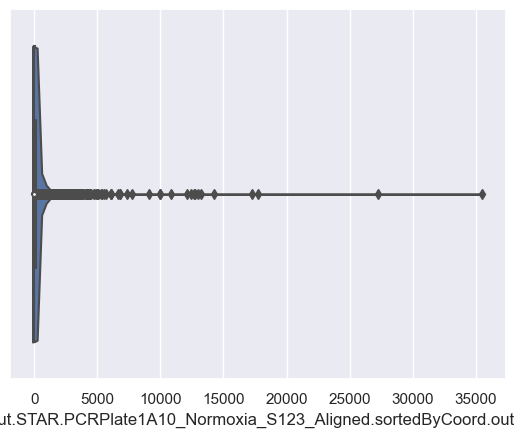

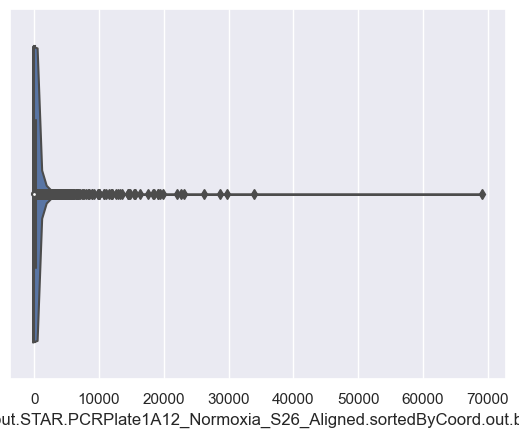

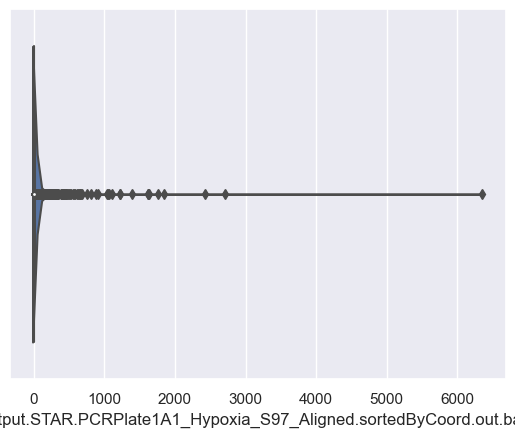

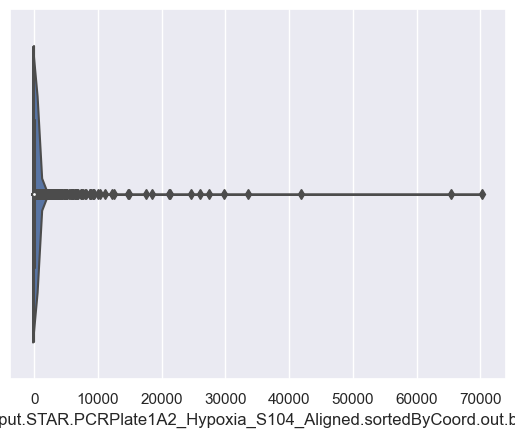

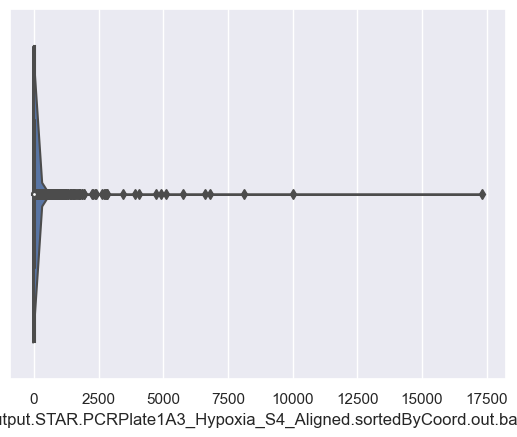

In [22]:
#Function to crate the violin plots
cnames_MCF = list(df_MCF_s_uf.columns)
cnames_HCC = list(df_HCC_s_uf.columns)
def violin(df, n=5):
    cnames = list(df.columns)
    for i in range(n):
        #We show the violin graphs of the first n cells
        sns.boxplot(x=df[cnames[i]])
        sns.violinplot(x=df[cnames[i]])
        plt.show()

#Violin plots for the HCC1806 dataset  
violin(df_HCC_s_uf)

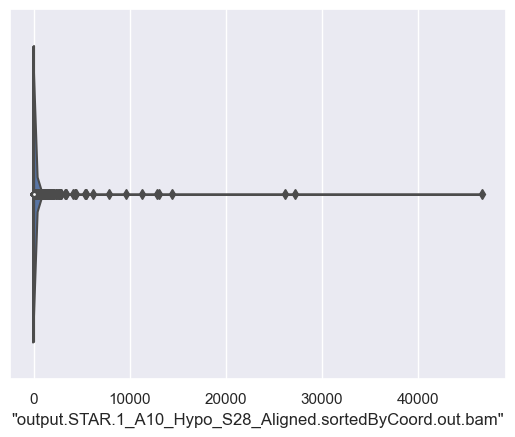

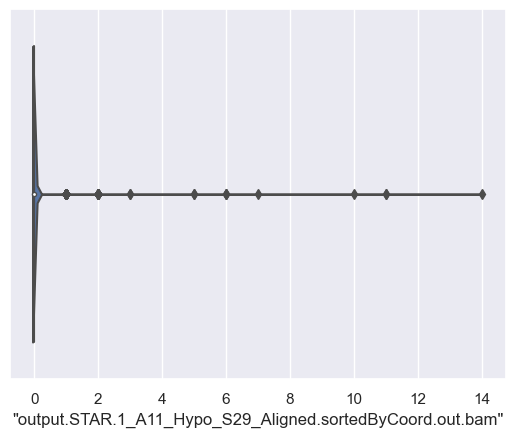

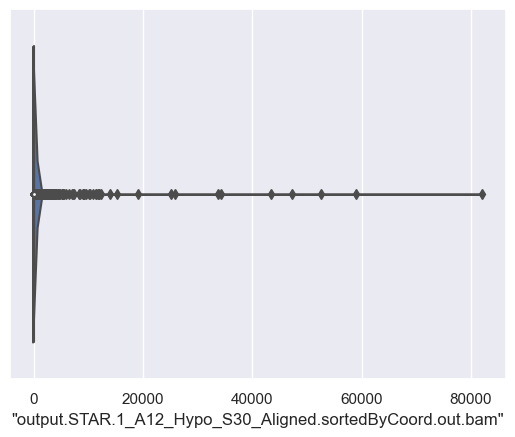

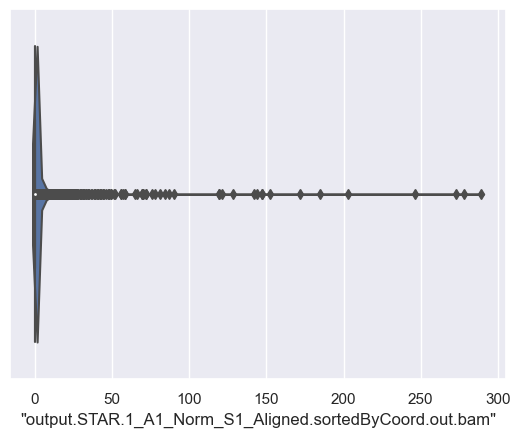

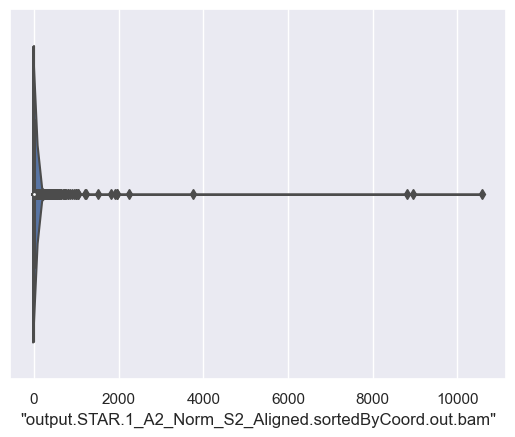

In [23]:
#Violin plots for the MCF7 data set
violin(df_MCF_s_uf)

We can also compare the violin plots for 50 cells directly. For the reasons mentioned above, these plots show us the range of gene occurences for some columns of our dataset. However, as we have seen, the points on the violin graphs have a tendency to be more present around lower values.
We also (temporarily) randomly mix around the columns so that we are not allways graphing the same 50 or so cells.

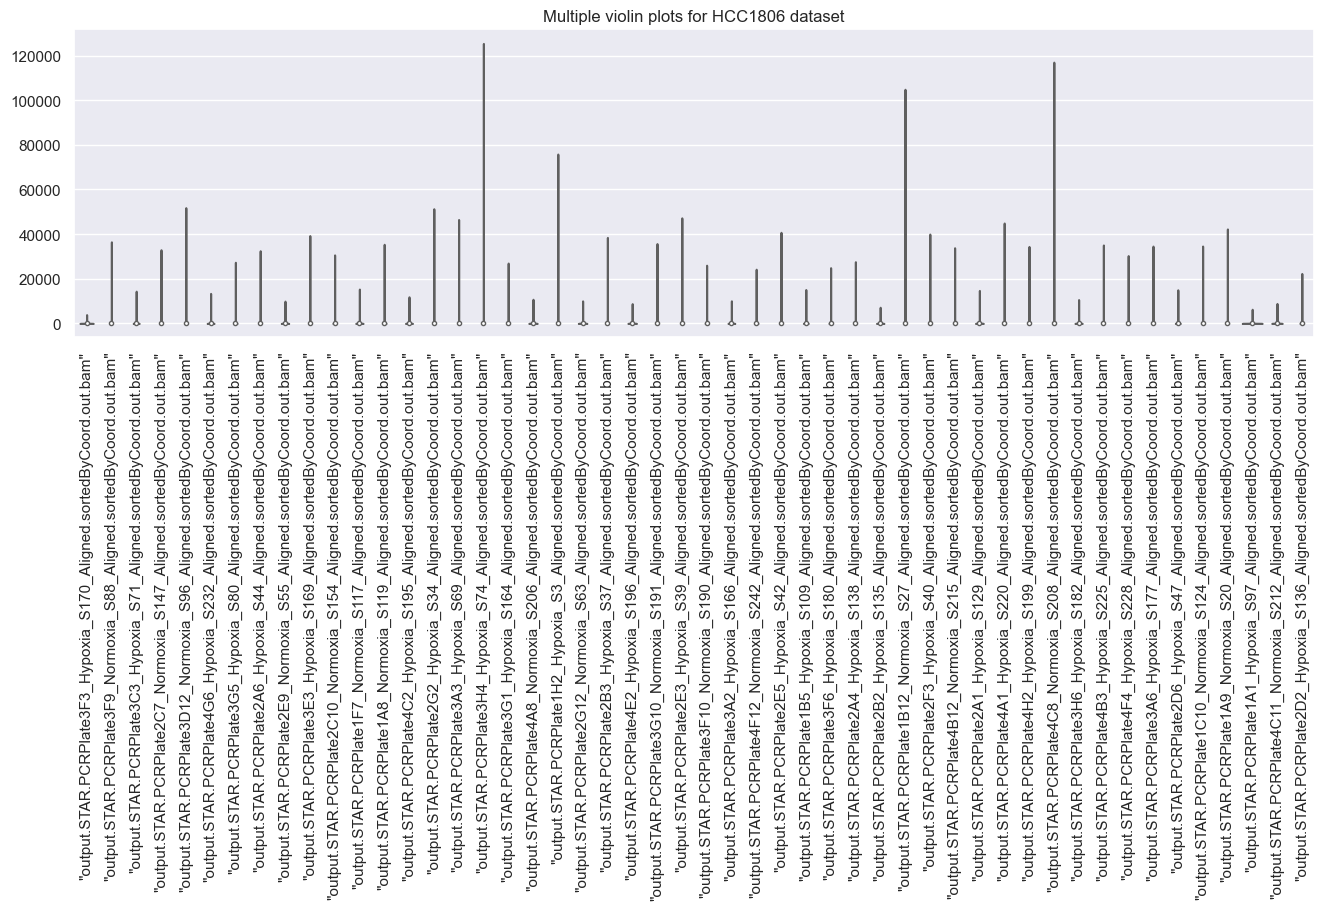

In [24]:
#Comparing violin plots for the HCC1806 dataset
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_HCC_s_uf.sample(frac=1, axis = 'columns').iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title("Multiple violin plots for HCC1806 dataset")
plt.show()

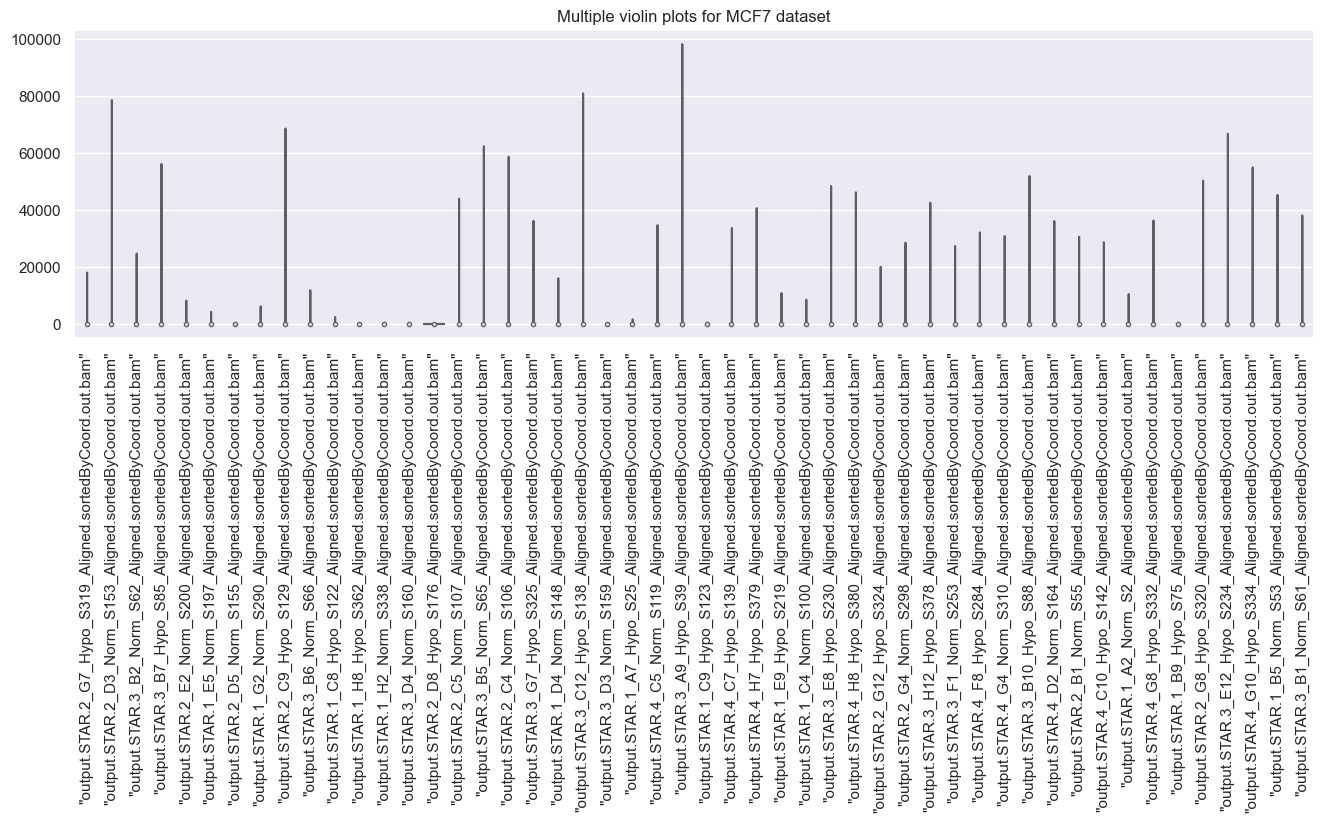

In [25]:
#Comparing violin plots for the MCF7 dataset
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_MCF_s_uf.sample(frac=1, axis = 'columns').iloc[:,:50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title("Multiple violin plots for MCF7 dataset")
plt.show()

We would like to show the distribution of some genes. To avoid choosing genes a large amount of zeros we create a simple function which returns the genes with the highest number of non zero entries.

In [26]:
#Function which returns the n genes with the largest number of non-zero entries 
def best_genes(df, n):
    return ((df != 0).sum(axis=1).nlargest(n)).index.values


We can next plot some graphs which illustrate the distribution of our 20 chosen genes. With these we can see how he chosen genes are distributed. As expected a lot of the genes have a spike close to 0 and then falls as we get further from 0.

Please be warned that the size of the x-axis of the histogram does vary across genes!

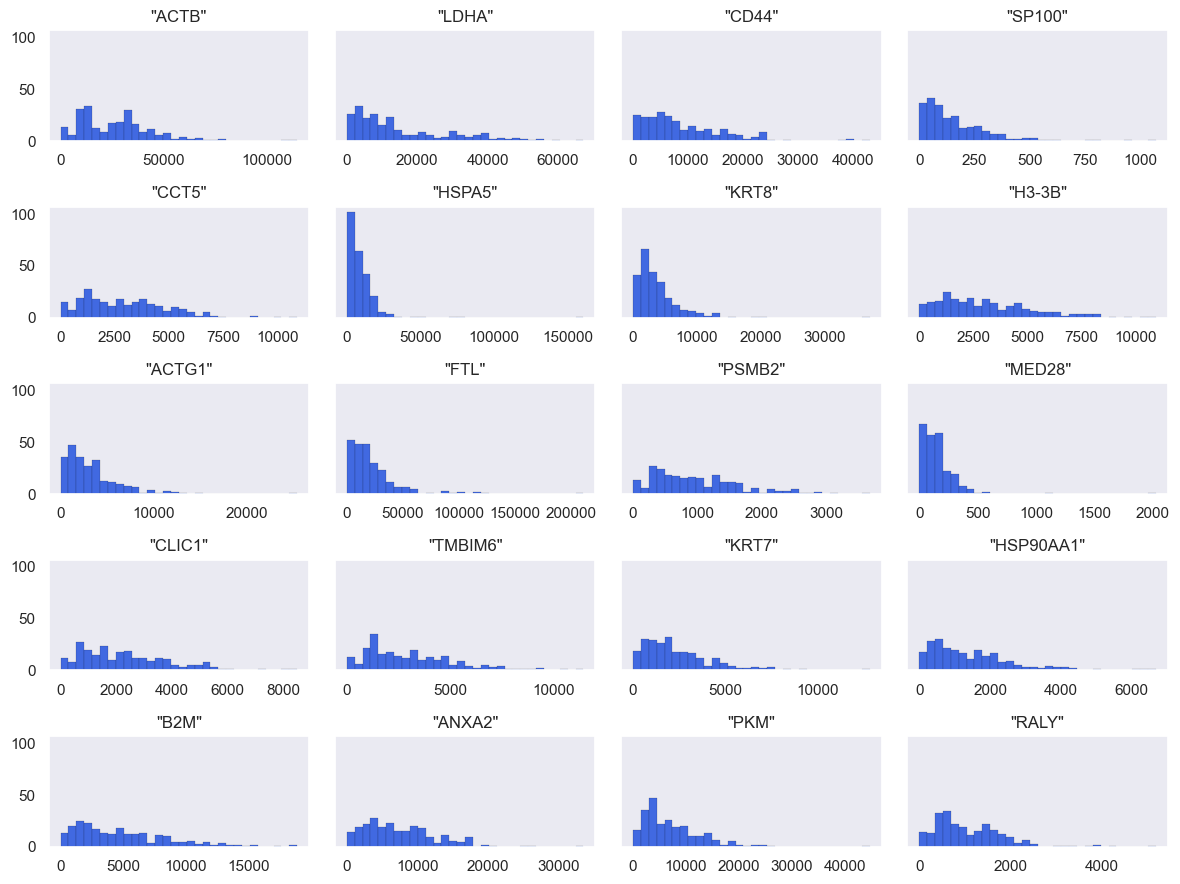

In [27]:
#Histograms for HCC1806
small_MCF = df_HCC_s_uf.loc[best_genes(df_HCC_s_uf, 20)].T
small_MCF.hist(
    bins=30, 
    figsize=(12,9), 
    color="royalblue",
    ec="black", 
    lw=0.1, 
    grid=False,
    sharey = 'col'
)
plt.tight_layout()
plt.show()

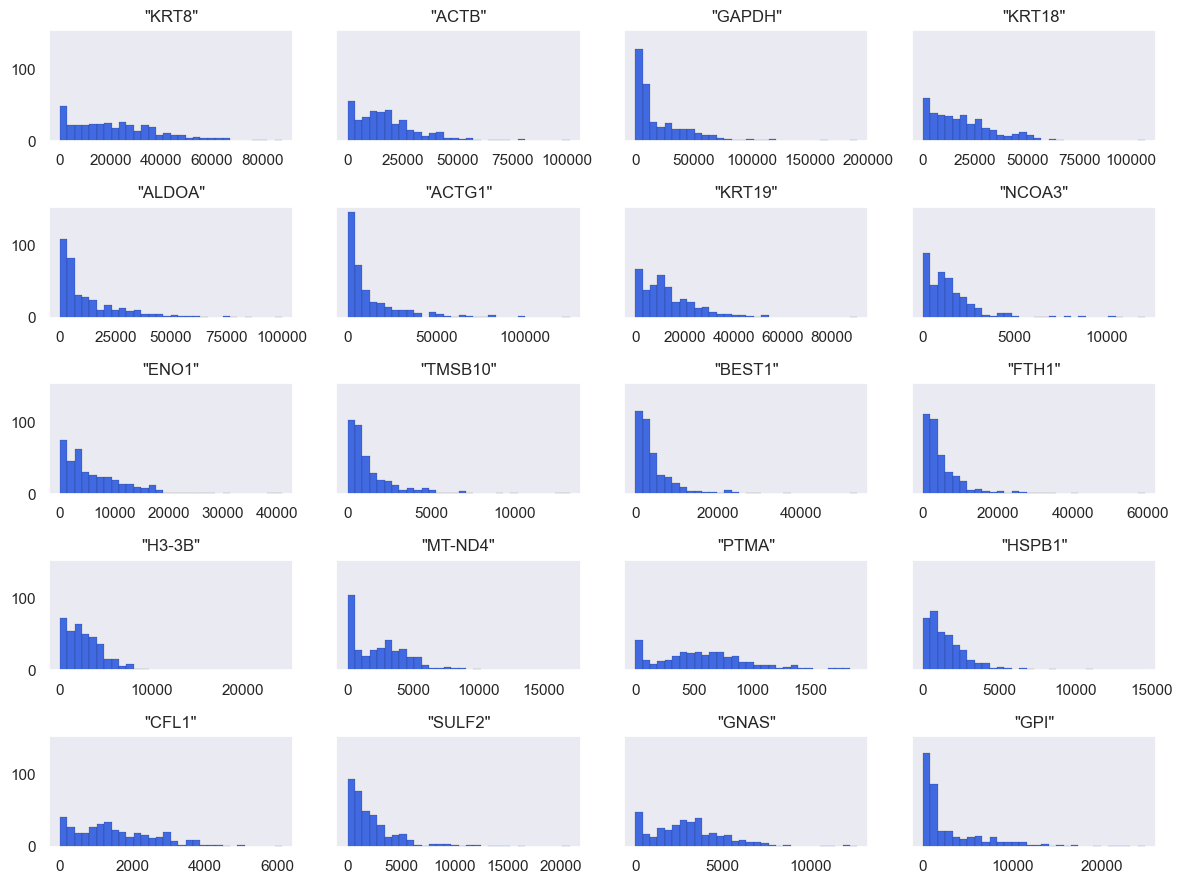

In [106]:
#Histograms for MCF7
small_MCF = df_MCF_s_uf.loc[best_genes(df_MCF_s_uf, 20)].T
small_MCF.hist(
    bins=30, 
    figsize=(12,9), 
    color="royalblue",
    ec="black", 
    lw=0.1, 
    grid=False,
    sharey = 'col'
)
plt.tight_layout()
plt.show()

Another way of illustrating the distribution of the genes is to show some box plots.

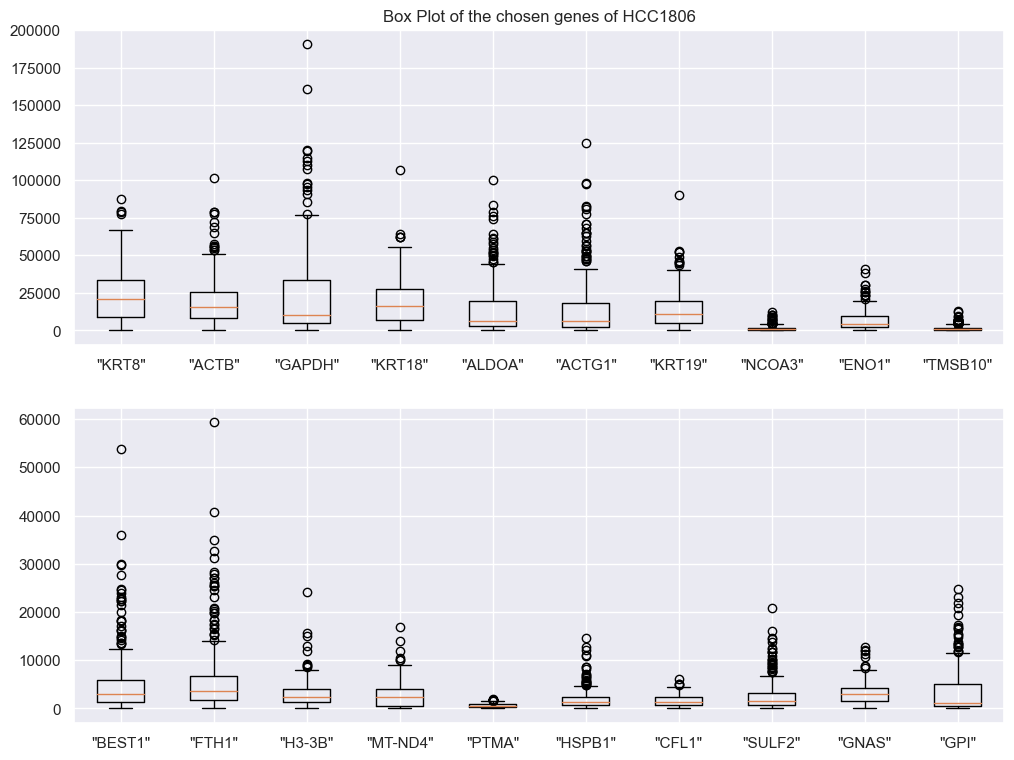

In [29]:
#Box plots for HCC1806
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
ax1.boxplot(small_MCF[small_MCF.columns[:10]], labels=small_MCF.columns[:10])
ax2.boxplot(small_MCF[small_MCF.columns[10:]], labels=small_MCF.columns[10:])
ax1.set_title("Box Plot of the chosen genes of HCC1806")
plt.show()

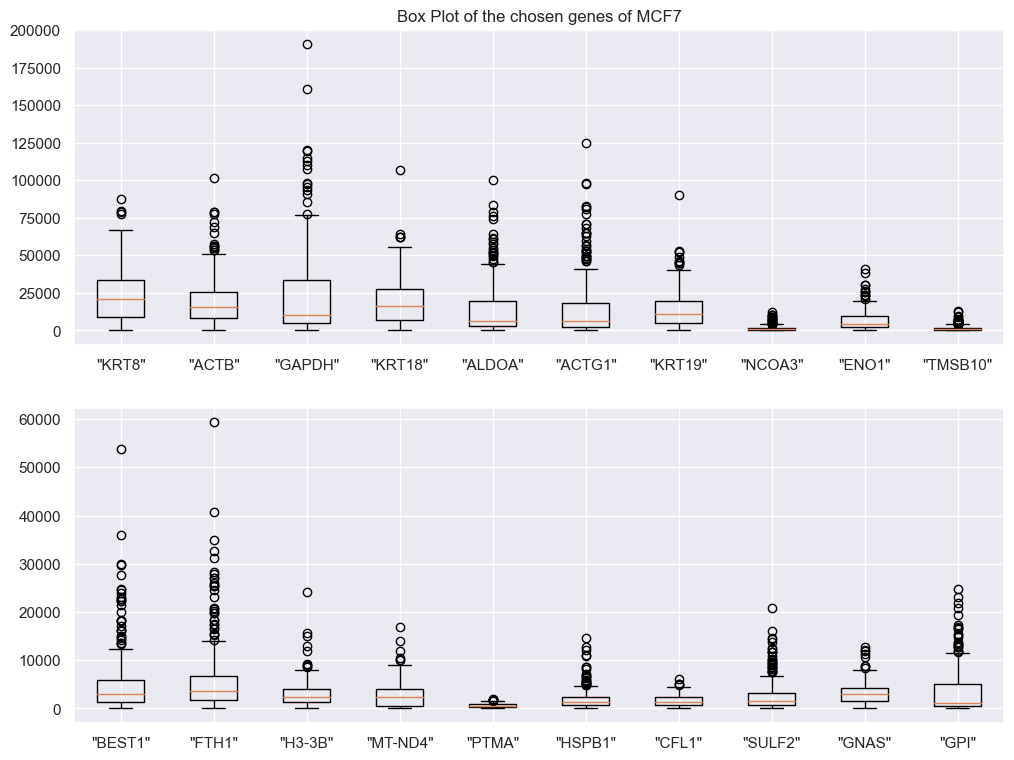

In [30]:
#Box plots for MCF7
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
ax1.boxplot(small_MCF[small_MCF.columns[:10]], labels=small_MCF.columns[:10])
ax2.boxplot(small_MCF[small_MCF.columns[10:]], labels=small_MCF.columns[10:])
ax1.set_title("Box Plot of the chosen genes of MCF7")
plt.show()

Notice that we have a lot of points are very far from the median and in some cases even very far the the wiskers of the boxplots! It might be tempting to call these outliers however in many case these points are instances in which a gene has been found many times and if we were to eliminate these points we will lose a lot of information! This is exactly the delemma we face in the outlier section.

We next decided to plot the 50 genes with the largest number of occurences over all cells. In doing so, we get to see if the dataset contains some genes that appear a lot and some that never appear or if the apperences are more evenly spred.
For both datasets we see that after the initail spike with very common genes the bar graph smooths out. We also calculated how many total gene occurences we are neglecting by plotting only the 50 most common genes, and we realize that the remaining genes still represent a very large amount of gene detections(which we expect because of the large amount of genes in the datasets).

Percentage of occurences not present in the graph: 83.75%


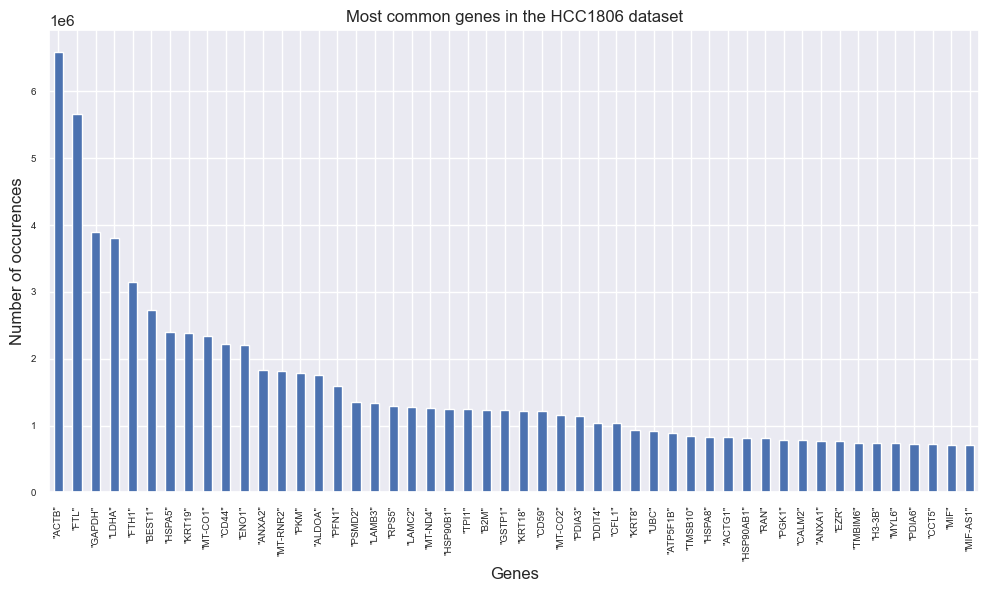

In [31]:
#Representing how often a specific gene is found in a cell (I picked the 50 largest ones)
largest_HCC = df_HCC_s_uf.sum(axis='columns').nlargest(50)

#Calculating the remaining number of occurences
remaining_HCC = df_HCC_s_uf.sum(axis='columns').sum() - df_HCC_s_uf.sum(axis='columns')[largest_HCC.index.values].sum()

#We print the percentage of occurences not represented in the graph
print("Percentage of occurences not present in the graph:", 
      f"{round(remaining_HCC/df_HCC_s_uf.sum(axis='columns').sum() * 100, 2)}%")
plt.figure(figsize=(12,6))
ax = largest_HCC.plot.bar(stacked = True, fontsize = 7)
plt.xlabel('Genes')
plt.ylabel('Number of occurences')
plt.title("Most common genes in the HCC1806 dataset")
plt.show()

Percentage of occurences not present in the graph: 76.14%


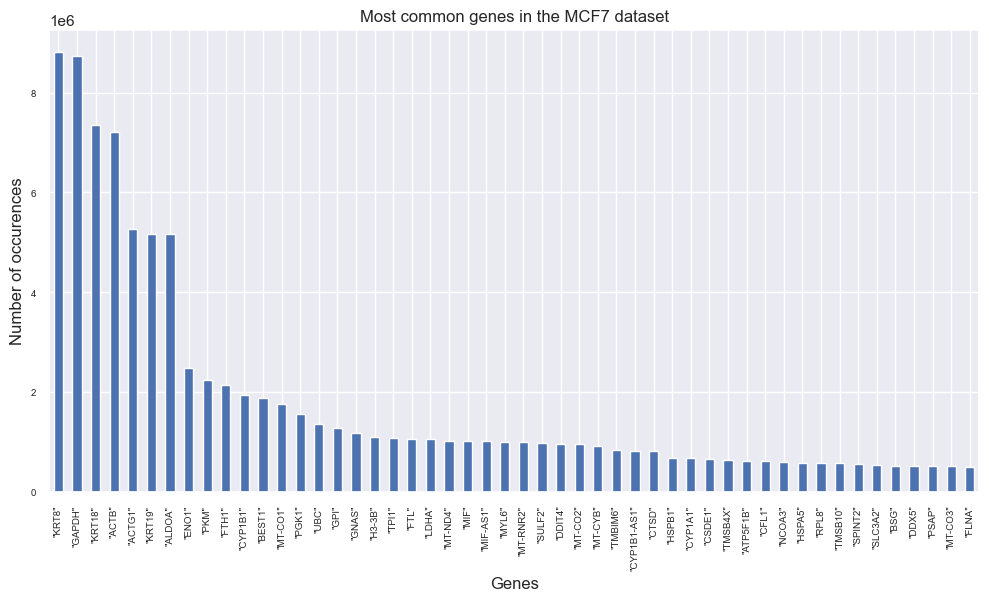

In [32]:
#Representing how often a specific gene is found in a cell (I picked the 50 largest ones)
largest_MCF = df_MCF_s_uf.sum(axis='columns').nlargest(50)

#Calculating the remaining number of occurences
remaining_MCF = df_MCF_s_uf.sum(axis='columns').sum() - df_MCF_s_uf.sum(axis='columns')[largest_MCF.index.values].sum()

#We print the percentage of occurences not represented in the graph
print("Percentage of occurences not present in the graph:", 
      f"{round(remaining_MCF/df_MCF_s_uf.sum(axis='columns').sum() * 100, 2)}%")
plt.figure(figsize=(12,6))
ax = largest_MCF.plot.bar(stacked = True, fontsize = 7)
plt.xlabel('Genes')
plt.ylabel('Number of occurences')
plt.title("Most common genes in the MCF7 dataset")
plt.show()

In both cases the bar graph drops down quite quickly which leads us to believe that many genes occure very rearly and most of the information is given by a small fraction of genes. In fact when we train our model we will only use the information given by the 3000 most informative genes.

For each data set we differenciate between cells from the hypoxia experiment and cells from the normoxia experiment. We then create two sub datasets one of which contains all the columns corresponding to hypoxia cells and the other containing only columns of normoxia cells.

In [33]:
#Function that retruns lists of all cells that were part of the hypoxia and normoxia groups
def hypo_and_norm(df):
    hypo = []
    norm = []
    for cell in df.columns:
        if "Hypo" in cell.split("_") or "Hypoxia" in cell.split("_"):
            hypo.append(cell)
        elif "Norm" in cell.split("_") or "Normoxia" in cell.split("_"):
            norm.append(cell)
        else:
            print("Unkown:", cell)
    return (hypo, norm)

#Data sets that contain only hypoxia cells
df_MCF_hypo = df_MCF_s_uf[hypo_and_norm(df_MCF_s_uf)[0]]
df_HCC_hypo = df_HCC_s_uf[hypo_and_norm(df_HCC_s_uf)[0]]

#Data sets that contain only normoxia cells
df_MCF_norm = df_MCF_s_uf[hypo_and_norm(df_MCF_s_uf)[1]]
df_HCC_norm = df_HCC_s_uf[hypo_and_norm(df_HCC_s_uf)[1]]

#How many hypoxia and how many normoxia are in each dataset
print("Number of cells exposed to hypoxia for HCC1806 data: ", len(hypo_and_norm(df_HCC_s_uf)[0])) 
print("Number of cells exposed to normoxia for HCC1806 data: ", len(hypo_and_norm(df_HCC_s_uf)[1]))

print("Number of cells exposed to hypoxia for MCF7 data: ", len(hypo_and_norm(df_MCF_s_uf)[0])) 
print("Number of cells exposed to normoxia for MCF7 data: ", len(hypo_and_norm(df_MCF_s_uf)[1]))


Number of cells exposed to hypoxia for HCC1806 data:  126
Number of cells exposed to normoxia for HCC1806 data:  117
Number of cells exposed to hypoxia for MCF7 data:  191
Number of cells exposed to normoxia for MCF7 data:  192


Luckily for both datasets the amount of examples from the hypoxia enviorment and the normoxia enviorment are more or less balanced. This helps us as the models will have an even exposure to both types of enviorments reducing the likelihood of any bias towards one of the labels.

In view of our final goal of this report we thought that it could be insightful to represent genes whose total occurences vary the most between the two types of enviorment.
To illustrate this did the following for both datasets:
First we took only the colums with hypoxia cells and summed them so we could see how often each gene was found in the cells that had little oxygen.
We did the same for the Normoxia cells and we took the differences (in abs) between the gene occurences in normoxia cells and hypoxia cells. We presented the 20 genes that had the largest differences.
The idea of this represention is to see if some genes are obviously more present in hypoxia cells. If this was the case, we would be lead to believe that this gene may play a role in the survival of a cell with no oxygen. Similarly if a gene was very present only in normoxia cells then this gene might not be useful in a hypoxia enviorment(or it might even be degenerous).
Please note that we cannot strongly conclude anything from the following graphs, differences might also be due to some sampling bias.

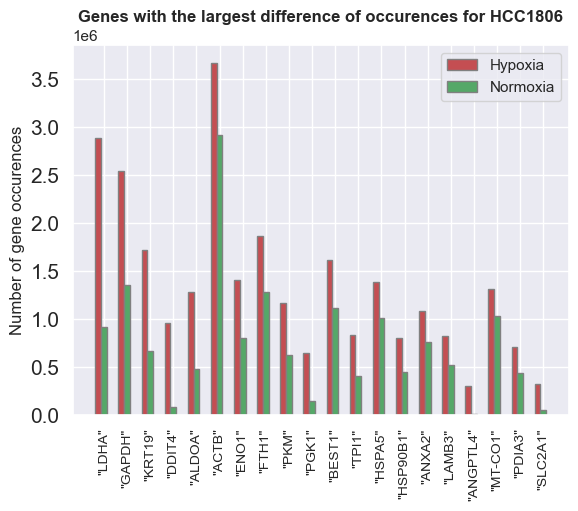

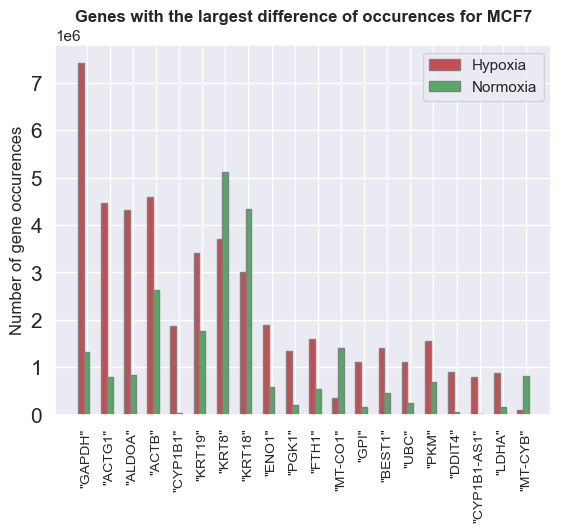

array(['"GAPDH"', '"ACTG1"', '"ALDOA"', '"ACTB"', '"CYP1B1"', '"KRT19"',
       '"KRT8"', '"KRT18"', '"ENO1"', '"PGK1"', '"FTH1"', '"MT-CO1"',
       '"GPI"', '"BEST1"', '"UBC"', '"PKM"', '"DDIT4"', '"CYP1B1-AS1"',
       '"LDHA"', '"MT-CYB"'], dtype=object)

In [34]:
def hypo_vs_norm(df_hypo, df_norm,n=20, width = 0.25, title="Hypoxia vs Normoxia", type = 'l'):
    #Get a list of the total occurences of each gene
    genes_norm = df_norm.sum(axis='columns')
    genes_hypo = df_hypo.sum(axis='columns')

    #Find the genes with the largest (type == 'l') or smallest (type == 's') difference of occurences 
    # between hypo cells and norm cells
    if type == 'l':
        diffs = (genes_hypo.sub(genes_norm)).apply(abs).nlargest(n)
    elif type == 's':
        diffs = (genes_hypo.sub(genes_norm)).apply(abs).nsmallest(n)
    else:
        raise ValueError("Wrong type")
    
    diffs_genes = diffs.index.values

    #Bar graph with gene occurences in hypo vs norm
    plt.bar(np.arange(len(genes_hypo[diffs_genes])), 
            genes_hypo[diffs_genes].tolist(), 
            color ='r', 
            width = width,
            edgecolor ='grey', 
            label ='Hypoxia')

    plt.bar([x + width for x in np.arange(len(genes_hypo[diffs_genes]))],
            genes_norm[diffs_genes].tolist(), 
            color ='g', 
            width = width,
            edgecolor ='grey', 
            label ='Normoxia')

    plt.xticks([r + width for r in range(len(diffs_genes))],
            diffs_genes,
            rotation=90,
            fontsize=10)
    plt.title(title, weight='bold')
    plt.yticks(fontsize = 15)
    plt.ylabel("Number of gene occurences")
    plt.legend()
    plt.show()
    return diffs_genes


hypo_vs_norm(df_HCC_hypo, df_HCC_norm, title = "Genes with the largest difference of occurences for HCC1806")
hypo_vs_norm(df_MCF_hypo, df_MCF_norm, title = "Genes with the largest difference of occurences for MCF7")


A similar reasoning as above is to see which genes have the smallest difference in occurences between normoxia cells and hypoxia cells. This might give us an idea of which are the so called housekeeping genes. These genes are need for the basic function of the cells and so shouldn't really change between normoxia and hypoxia cells.

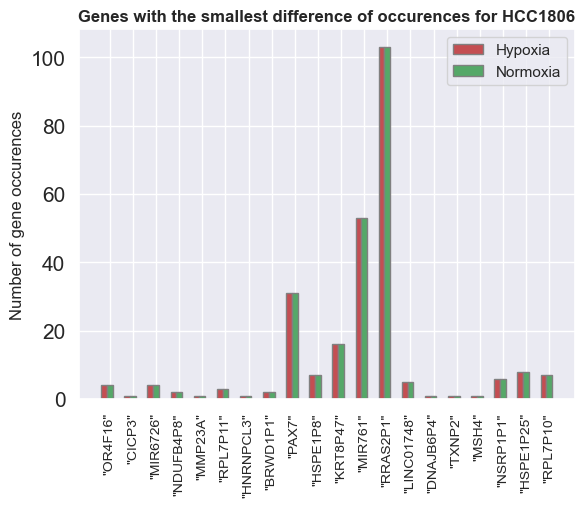

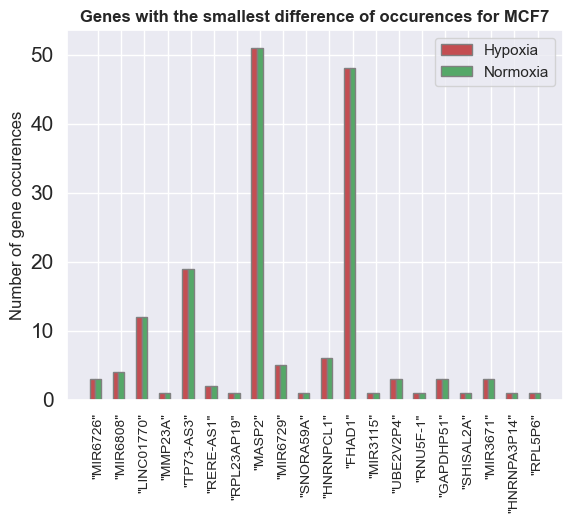

array(['"MIR6726"', '"MIR6808"', '"LINC01770"', '"MMP23A"', '"TP73-AS3"',
       '"RERE-AS1"', '"RPL23AP19"', '"MASP2"', '"MIR6729"', '"SNORA59A"',
       '"HNRNPCL1"', '"FHAD1"', '"MIR3115"', '"UBE2V2P4"', '"RNU5F-1"',
       '"GAPDHP51"', '"SHISAL2A"', '"MIR3671"', '"HNRNPA3P14"',
       '"RPL5P6"'], dtype=object)

In [35]:
hypo_vs_norm(df_HCC_hypo, df_HCC_norm, title = "Genes with the smallest difference of occurences for HCC1806", type = 's')
hypo_vs_norm(df_MCF_hypo, df_MCF_norm, title = "Genes with the smallest difference of occurences for MCF7", type = 's')


---
---
## Data Cleaning

Now that we have a better understanding of the datasets, we can move on to data cleaning. In this process, we can identify and correct any potential issues that hamper the performance of our models.

### Missing values
One of the first things to check is whether there are missing values. In these datasets, there are none: this is due to the fact that if a gene was not found in a specific cell, the value was set to 0, eliminating the possibility of NA. We do notice, however, that many rows contain a large amount of zeros, which is a problem which we will discuss further on.

In [36]:
#Creating a function which returns the number of missing values given a data set
def missing(df):
    miss = False
    if df.isna().stack().sum() != 0:
        miss = True
        return str(df.isnull().stack().sum())
    if not miss:
        return "No missing values"

print("Number of missing values for the HCC1806 data: ", missing(df_HCC_s_uf))
print("Number of missing values for the MCF7 data: ", missing(df_MCF_s_uf))

Number of missing values for the HCC1806 data:  No missing values
Number of missing values for the MCF7 data:  No missing values


As mentioned previously, there are many zero values, hence some genes occur rarely. This means that we are dealing with a sparse dataset, and it has to be taken into account throughout this analysis.

In [37]:
#Function that returns percentage of entries which are zero given a data frame
def frac_zeros(df, n=20):
    return round((((df == 0).stack().sum())/(df.shape[0] * df.shape[1])) * 100, 2)


print("Percentage of entries which are zero in the HCC1806 dataset: ", f"{frac_zeros(df_HCC_s_uf)}%")
print("Percentage of entries which are zero in the MCF7 dataset: ", f"{frac_zeros(df_MCF_s_uf)}%")

Percentage of entries which are zero in the HCC1806 dataset:  55.85%
Percentage of entries which are zero in the MCF7 dataset:  60.22%


---
### Duplicate rows

Duplicate rows need to be removed as they just make the dataset bigger without adding any extra information.

In [38]:
def duplicate_rows(df, all_cells = False, shape = False):
    if shape:
        print("Number of duplicate rows: ", df[df.duplicated(keep=False)].shape[0])
    if all_cells:
        print("Duplicate rows: ", df[df.duplicated(keep=False)].index.values)
    return df[df.duplicated(keep=False)]

duplicate_rows(df_MCF_s_uf).head()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  ...  \
"

Luckily for us there are no duplicate cells in both datasets! 

In [39]:
duplicate_rows(df_HCC_s_uf.T, True, True)
duplicate_rows(df_MCF_s_uf.T, True, True)

Number of duplicate rows:  0
Duplicate rows:  []
Number of duplicate rows:  0
Duplicate rows:  []


Empty DataFrame
Columns: ["WASH7P", "MIR6859-1", "WASH9P", "OR4F29", "MTND1P23", "MTND2P28", "MTCO1P12", "MTCO2P12", "MTATP8P1", "MTATP6P1", "MTCO3P12", "OR4F16", "CICP3", "LINC01409", "FAM87B", "LINC01128", "LINC00115", "LINC02593", "SAMD11", "NOC2L", "KLHL17", "PLEKHN1", "PERM1", "HES4", "ISG15", "AGRN", "RNF223", "C1orf159", "MIR429", "TTLL10", "TNFRSF18", "SDF4", "B3GALT6", "C1QTNF12", "UBE2J2", "LINC01786", "SCNN1D", "ACAP3", "MIR6726", "PUSL1", "INTS11", "MIR6727", "CPTP", "TAS1R3", "DVL1", "MIR6808", "MXRA8", "AURKAIP1", "CCNL2", "MRPL20-AS1", "MRPL20", "RN7SL657P", "MRPL20-DT", "LINC01770", "VWA1", "ATAD3C", "ATAD3B", "ATAD3A", "SSU72", "FNDC10", "MIB2", "CDK11B", "SLC35E2B", "MMP23A", "CDK11A", "SLC35E2A", "NADK", "GNB1", "CALML6", "TMEM52", "CFAP74", "GABRD", "PRKCZ", "PRKCZ-AS1", "FAAP20", "SKI", "MORN1", "RER1", "PEX10", "PLCH2", "PANK4", "TNFRSF14", "PRXL2B", "MMEL1", "PRDM16-DT", "PRDM16", "ARHGEF16", "MEGF6", "TPRG1L", "WRAP73", "TP73", "TP73-AS3", "TP73-AS1", "CCDC27", "SMIM1", "LRRC47", "RN7SL574P", "CEP104", "DFFB", "C1orf174", ...]
Index: []

[0 rows x 22934 columns]

In [40]:
duplicate_rows(df_MCF_s_uf, True, True).head()

Number of duplicate rows:  56
Duplicate rows:  ['"SHISAL2A"' '"IL12RB2"' '"S1PR1"' '"CD84"' '"GNLY"' '"FAR2P3"'
 '"KLF2P3"' '"PABPC1P2"' '"UGT1A8"' '"UGT1A9"' '"SLC22A14"' '"COQ10BP2"'
 '"PANDAR"' '"LAP3P2"' '"RPL22P16"' '"GALNT17"' '"PON1"' '"HTR5A"'
 '"SNORA36A"' '"MIR664B"' '"CSMD1"' '"KCNS2"' '"MIR548AA1"' '"MIR548D1"'
 '"MTCO2P11"' '"CLCN3P1"' '"SUGT1P4-STRA6LP"' '"STRA6LP"' '"MUC6"'
 '"VSTM4"' '"LINC00856"' '"LINC00595"' '"CACYBPP1"' '"LINC00477"'
 '"KNOP1P1"' '"WDR95P"' '"MIR20A"' '"MIR19B1"' '"RPL21P5"' '"RNU6-539P"'
 '"SNRPN"' '"SNURF"' '"RBFOX1"' '"LINC02183"' '"MT1M"' '"ASPA"' '"BCL6B"'
 '"CCL3L3"' '"CCL3L1"' '"OTOP3"' '"RNA5SP450"' '"PSG1"' '"MIR3190"'
 '"MIR3191"' '"SEZ6L"' '"ADAMTS5"']


"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0            
"IL12RB2"                                                   0            
"S1PR1"                                                     0            
"CD84"                                                      0            
"GNLY"                                                      0            

            "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                  0          
"IL12RB2"                                                   0          
"S1PR1"                                                     0          
"CD84"                                                      0          
"GNLY"                                                      0          

            "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  ...  \
"

In [41]:
duplicate_rows(df_HCC_s_uf, True, True).head()

Number of duplicate rows:  89
Duplicate rows:  ['"MMP23A"' '"LINC01647"' '"LINC01361"' '"ITGA10"' '"RORC"' '"GPA33"'
 '"OR2M4"' '"LINC01247"' '"SNORD92"' '"LINC01106"' '"ZBTB45P2"' '"AOX3P"'
 '"CPS1"' '"RPS3AP53"' '"CCR4"' '"RNY1P12"' '"C4orf50"' '"C4orf45"'
 '"PCDHA2"' '"PCDHA8"' '"PCDHGA2"' '"PCDHGA3"' '"PCDHGB3"' '"PCDHGA7"'
 '"PCDHGA9"' '"PCDHGB7"' '"PCDHGA12"' '"PCDHGB9P"' '"PCDHGC4"' '"SMIM23"'
 '"PANDAR"' '"LAP3P2"' '"RBBP4P3"' '"RPL21P66"' '"VNN3"' '"TRPV6"'
 '"CNPY1"' '"ASS1P4"' '"SLC7A3"' '"MIR374B"' '"MIR374C"' '"NAB1P1"'
 '"RPL10AP3"' '"MIR548AA1"' '"MIR548D1"' '"SCARNA8"' '"MIR3074"'
 '"MIR24-1"' '"SUGT1P4-STRA6LP"' '"STRA6LP"' '"KCNA4"' '"FBLIM1P2"'
 '"APLNR"' '"CYCSP26"' '"OPCML"' '"B3GAT1-DT"' '"RPL21P88"' '"LINC02625"'
 '"RPL22P18"' '"PAX2"' '"SOX5"' '"COL2A1"' '"LINC02395"' '"LDHAL6CP"'
 '"CUX2"' '"LINC00621"' '"NUS1P2"' '"UBBP5"' '"OR5AU1"' '"LINC02833"'
 '"RASL12"' '"CILP"' '"MIR6864"' '"MIR4520-1"' '"MIR4520-2"' '"CCL3L3"'
 '"CCL3L1"' '"RNU6-826P"' '"OR4D1"' '"MSX2

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                        
"LINC01647"                                                  0                        
"LINC01361"                                                  0                        
"ITGA10"                                                     0                        
"RORC"                                                       0                        

             "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                       
"LINC01647"                                                  0                       
"LINC01361"                                                  0                       
"ITGA10"                                                     0                       
"RORC"                                                       0                       

             "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                     
"LINC01647"                                                  0                     
"LINC01361"                                                  0                     
"ITGA10"                                                     0                     
"RORC"                                                       0                     

             "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                      
"LINC01647"                                                  0                      
"LINC01361"                                                  0                      
"ITGA10"                                                     0                      
"RORC"                                                       0                      

             "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                    
"LINC01647"                                                  0                    
"LINC01361"                                                  0                    
"ITGA10"                                                     0                    
"RORC"                                                       0                    

             "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                    
"LINC01647"                                                  0                    
"LINC01361"                                                  0                    
"ITGA10"                                                     0                    
"RORC"                                                       0                    

             "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                      
"LINC01647"                                                  0                      
"LINC01361"                                                  0                      
"ITGA10"                                                     0                      
"RORC"                                                       0                      

             "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                     
"LINC01647"                                                  0                     
"LINC01361"                                                  0                     
"ITGA10"                                                     0                     
"RORC"                      

In [42]:
duplicate_rows_df_MCF_t = duplicate_rows(df_MCF_s_uf).T
c_dupl_MCF = duplicate_rows_df_MCF_t.corr()
c_dupl_MCF

"SHISAL2A"  "IL12RB2"   "S1PR1"    "CD84"    "GNLY"  \
"SHISAL2A"           1.000000   0.630630  0.654887  0.312826  0.497375   
"IL12RB2"            0.630630   1.000000  0.829681  0.799056  0.630630   
"S1PR1"              0.654887   0.829681  1.000000  0.412553  0.654887   
"CD84"               0.312826   0.799056  0.412553  1.000000  0.312826   
"GNLY"               0.497375   0.630630  0.654887  0.312826  1.000000   
"FAR2P3"            -0.008333  -0.007903 -0.007656 -0.007903 -0.008333   
"KLF2P3"            -0.008333  -0.007903 -0.007656 -0.007903 -0.008333   
"PABPC1P2"           0.497375   0.948434  0.654887  0.948434  0.497375   
"UGT1A8"            -0.009322  -0.008841 -0.008565 -0.008841 -0.009322   
"UGT1A9"            -0.009322  -0.008841 -0.008565 -0.008841 -0.009322   
"SLC22A14"           0.497375   0.948434  0.654887  0.948434  0.497375   
"COQ10BP2"           1.000000   0.630630  0.654887  0.312826  0.497375   
"PANDAR"            -0.020348  -0.019299 -0.018695 -0.019299 -0.020348   
"LAP3P2"            -0.020348  -0.019299 -0.018695 -0.019299 -0.020348   
"RPL22P16"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"GALNT17"            0.630630   1.000000  0.829681  0.799056  0.630630   
"PON1"               0.630630   1.000000  0.829681  0.799056  0.630630   
"HTR5A"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNORA36A"          -0.004499  -0.004267 -0.004134 -0.004267 -0.004499   
"MIR664B"           -0.004499  -0.004267 -0.004134 -0.004267 -0.004499   
"CSMD1"              0.112487   0.586533  0.149322  0.955646  0.112487   
"KCNS2"              0.497375   0.630630  0.654887  0.312826  1.000000   
"MIR548AA1"         -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MIR548D1"          -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MTCO2P11"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"CLCN3P1"            0.134926   0.612365  0.178813  0.964653  0.134926   
"SUGT1P4-STRA6LP"    0.001061  -0.021672 -0.020994 -0.021672 -0.022850   
"STRA6LP"            0.001061  -0.021672 -0.020994 -0.021672 -0.022850   
"MUC6"               0.654887   0.829681  1.000000  0.412553  0.654887   
"VSTM4"              0.497375   0.630630  0.654887  0.312826  0.497375   
"LINC00856"         -0.007671  -0.007275  0.028008 -0.007275 -0.007671   
"LINC00595"         -0.007671  -0.007275  0.028008 -0.007275 -0.007671   
"CACYBPP1"          -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"LINC00477"         -0.007029  -0.006667 -0.006458 -0.006667 -0.007029   
"KNOP1P1"           -0.007029  -0.006667 -0.006458 -0.006667 -0.007029   
"WDR95P"             0.312826   0.799056  0.412553  1.000000  0.312826   
"MIR20A"            -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"MIR19B1"           -0.004979  -0.004722 -0.004574 -0.004722 -0.004979   
"RPL21P5"            0.497375   0.630630  0.654887  0.312826  0.497375   
"RNU6-539P"         -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNRPN"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"SNURF"             -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"RBFOX1"             0.497375   0.630630  0.654887  0.312826  0.497375   
"LINC02183"          0.630630   0.799056  0.829681  0.397167  0.948434   
"MT1M"               0.630630   0.799056  0.829681  0.397167  0.630630   
"ASPA"               0.630630   0.799056  0.829681  0.397167  0.630630   
"BCL6B"              0.497375   0.630630  0.654887  0.312826  1.000000   
"CCL3L3"            -0.007615  -0.007222 -0.006996 -0.007222  0.021357   
"CCL3L1"            -0.007615  -0.007222 -0.006996 -0.007222  0.021357   
"OTOP3"              0.134926   0.612365  0.178813  0.964653  0.134926   
"RNA5SP450"         -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"PSG1"               0.497375   0.630630  0.654887  0.312826  0.497375   
"MIR3190"           -0.005249  -0.004979 -0.004823 -0.004979 -0.005249   
"MIR3191"           -0.

In [43]:
duplicate_rows_df_HCC_t = duplicate_rows(df_HCC_s_uf).T
c_dupl_HCC = duplicate_rows_df_HCC_t.corr()
c_dupl_HCC

"MMP23A"  "LINC01647"  "LINC01361"  "ITGA10"    "RORC"   "GPA33"  \
"MMP23A"     1.000000    -0.008299    -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647" -0.008299     1.000000     0.495851  0.495851 -0.008299  0.495851   
"LINC01361" -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ITGA10"    -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"RORC"      -0.008299    -0.008299     0.495851  0.495851  1.000000  0.495851   
...               ...          ...          ...       ...       ...       ...   
"ENPP7"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"DTNA"      -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ALPK2"     -0.006540     0.788121     0.081755  0.081755 -0.006540  0.081755   
"OR7G2"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"PLVAP"     -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   

              "OR2M4"  "LINC01247"  "SNORD92"  "LINC01106"  ...  "MSX2P1"  \
"MMP23A"    -0.008299    -0.008299  -0.008299    -0.010083  ... -0.008299   
"LINC01647" -0.008299     0.495851  -0.008299     0.234944  ... -0.008299   
"LINC01361"  0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ITGA10"     0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"RORC"       1.000000    -0.008299  -0.008299    -0.010083  ... -0.008299   
...               ...          ...        ...          ...  ...       ...   
"ENPP7"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"DTNA"       0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ALPK2"     -0.006540     0.081755  -0.006540     0.335362  ... -0.006540   
"OR7G2"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"PLVAP"      0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   

             "MIR548D2"  "MIR548AA2"  "KCNJ16"  "CD300A"   "ENPP7"    "DTNA"  \
"MMP23A"      -0.009421    -0.009421 -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647"   -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"LINC01361"   -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ITGA10"      -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"RORC"        -0.009421    -0.009421 -0.008299  0.495851 -0.008299  0.495851   
...                 ...          ...       ...       ...       ...       ...   
"ENPP7"       -0.009421    -0.009421  0.495851  0.495851  1.000000  0.495851   
"DTNA"        -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ALPK2"       -0.007425    -0.007425  0.081755  0.081755  0.081755  0.081755   
"OR7G2"       -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"PLVAP"       -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   

              "ALPK2"   "OR7G2"   "PLVAP"  
"MMP23A"    -0.006540 -0.008299 -0.008299  
"LINC01647"  0.788121  0.495851  0.495851  
"LINC01361"  0.081755  0.495851  1.000000  
"ITGA10"     0.081755  0.495851  1.000000  
"RORC"      -0.006540 -0.008299  0.495851  
...               ...       ...       ...  
"ENPP7"      0.081755  0.495851  0.495851  
"DTNA"       0.081755  0.495851  1.000000  
"ALPK2"      1.000000  0.081755  0.081755  
"OR7G2"      0.081755  1.000000  0.495851  
"PLVAP"      0.081755  0.495851  1.000000  

[89 rows x 89 columns]

In [44]:
duplicate_rows_df_MCF_t.describe()

"SHISAL2A"   "IL12RB2"     "S1PR1"      "CD84"      "GNLY"    "FAR2P3"  \
count  383.000000  383.000000  383.000000  383.000000  383.000000  383.000000   
mean     0.005222    0.007833    0.018277    0.007833    0.005222    0.013055   
std      0.072168    0.114138    0.274921    0.114138    0.072168    0.113658   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    2.000000    5.000000    2.000000    1.000000    1.000000   

         "KLF2P3"  "PABPC1P2"    "UGT1A8"    "UGT1A9"  ...     "BCL6B"  \
count  383.000000  383.000000  383.000000  383.000000  ...  383.000000   
mean     0.013055    0.005222    0.704961    0.704961  ...    0.005222   
std      0.113658    0.072168    5.486218    5.486218  ...    0.072168   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000   78.000000   78.000000  ...    1.000000   

         "CCL3L3"    "CCL3L1"     "OTOP3"  "RNA5SP450"      "PSG1"  \
count  383.000000  383.000000  383.000000   383.000000  383.000000   
mean     0.394256    0.394256    0.015666     0.005222    0.005222   
std      3.756135    3.756135    0.260417     0.072168    0.072168   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000    0.000000     0.000000    0.000000   
50%      0.000000    0.000000    0.000000     0.000000    0.000000   
75%      0.000000    0.000000    0.000000     0.000000    0.000000   
max     66.000000   66.000000    5.000000     1.000000    1.000000   

        "MIR3190"   "MIR3191"     "SEZ6L"   "ADAMTS5"  
count  383.000000  383.000000  383.000000  383.000000  
mean     0.005222    0.005222    0.018277    0.007833  
std      0.072168    0.072168    0.310683    0.114138  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    6.000000    2.000000  

[8 rows x 56 columns]

In [45]:
duplicate_rows_df_HCC_t.describe()

"MMP23A"  "LINC01647"  "LINC01361"    "ITGA10"      "RORC"  \
count  243.000000   243.000000   243.000000  243.000000  243.000000   
mean     0.008230     0.008230     0.008230    0.008230    0.008230   
std      0.090534     0.090534     0.090534    0.090534    0.090534   
min      0.000000     0.000000     0.000000    0.000000    0.000000   
25%      0.000000     0.000000     0.000000    0.000000    0.000000   
50%      0.000000     0.000000     0.000000    0.000000    0.000000   
75%      0.000000     0.000000     0.000000    0.000000    0.000000   
max      1.000000     1.000000     1.000000    1.000000    1.000000   

          "GPA33"     "OR2M4"  "LINC01247"   "SNORD92"  "LINC01106"  ...  \
count  243.000000  243.000000   243.000000  243.000000   243.000000  ...   
mean     0.008230    0.008230     0.008230    0.008230     0.041152  ...   
std      0.090534    0.090534     0.090534    0.090534     0.372552  ...   
min      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
25%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
50%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
75%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
max      1.000000    1.000000     1.000000    1.000000     5.000000  ...   

         "MSX2P1"  "MIR548D2"  "MIR548AA2"    "KCNJ16"    "CD300A"  \
count  243.000000  243.000000   243.000000  243.000000  243.000000   
mean     0.008230    0.024691     0.024691    0.008230    0.008230   
std      0.090534    0.239247     0.239247    0.090534    0.090534   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      0.000000    0.000000     0.000000    0.000000    0.000000   
75%      0.000000    0.000000     0.000000    0.000000    0.000000   
max      1.000000    3.000000     3.000000    1.000000    1.000000   

          "ENPP7"      "DTNA"     "ALPK2"     "OR7G2"     "PLVAP"  
count  243.000000  243.000000  243.000000  243.000000  243.000000  
mean     0.008230    0.008230    0.037037    0.008230    0.008230  
std      0.090534    0.090534    0.516931    0.090534    0.090534  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    8.000000    1.000000    1.000000  

[8 rows x 89 columns]

#### Dropping duplicate rows


In [46]:
df_MCF_noDup = df_MCF_s_uf.drop_duplicates()
df_HCC_noDup = df_HCC_s_uf.drop_duplicates()

print("Shape of dataset HCC1806 before dropping duplicates: ", df_HCC_s_uf.shape)
print("Shape of dataset HCC1806 after dropping duplcates: ", df_HCC_noDup.shape)
print("Number of genes removed: ", df_HCC_s_uf.shape[0] - df_HCC_noDup.shape[0], '\n')
print("Shape of dataset MCF7 before dropping duplicates: ", df_MCF_s_uf.shape)
print("Shape of dataset MCF7 after dropping duplcates: ", df_MCF_noDup.shape)
print("Number of genes removed: ", df_MCF_s_uf.shape[0] - df_MCF_noDup.shape[0])

#We are happy to remove the duplicates and so we start creating our cleaned data set
df_HCC_s_cl = df_HCC_noDup
df_MCF_s_cl = df_MCF_noDup

Shape of dataset HCC1806 before dropping duplicates:  (23396, 243)
Shape of dataset HCC1806 after dropping duplcates:  (23342, 243)
Number of genes removed:  54 

Shape of dataset MCF7 before dropping duplicates:  (22934, 383)
Shape of dataset MCF7 after dropping duplcates:  (22905, 383)
Number of genes removed:  29


---
### Outliers

The next step is to find any possible outliers and remove them. Outliers will definitely degrade the performace of our models, and so we ought to avoid this. We must tread carefully though, if we remove a point we must be very confident that it is indeed an outlier and it does not contain any useful infomation otherwise it could compromise the data and therefore our results.

The first thing we do is to calculate the sparsity. A sparse dataset can compromise the integrity of the datasets, especially in outlier detection, because when there are many zero values it can wrongly assign outliers. If this is the case, the non-zero cells are the ones that give the most information.

In [47]:
def calculate_sparsity(data):
    total_elements = np.prod(data.shape) 
    num_zeros = np.count_nonzero(data == 0)  
    sparsity = num_zeros / total_elements
    sparsity_percentage = sparsity * 100  
    
    return sparsity_percentage

print(calculate_sparsity(df_HCC_s_uf))
print(calculate_sparsity(df_MCF_s_uf))

55.8456230779135
60.215316468349066


With this function we have given a rough estimate of how sparse the datasets are, and as predicted they have a higher than average zero-value rate. This is something to consider as we continue with outlier detection.

In [48]:
Q1_HCC = df_HCC_s_cl.T.quantile(0.25)
Q3_HCC = df_HCC_s_cl.T.quantile(0.75)
Q1_MCF = df_MCF_s_cl.T.quantile(0.25)
Q3_MCF = df_MCF_s_cl.T.quantile(0.75)
IQR_HCC = Q3_HCC - Q1_HCC
IQR_MCF = Q3_MCF - Q1_MCF
print("HCC:\n", IQR_HCC)
print("MCF:\n", IQR_MCF)

HCC:
 "WASH7P"         0.0
"CICP27"         0.0
"DDX11L17"       0.0
"WASH9P"         0.0
"OR4F29"         0.0
               ...  
"MT-TE"         16.0
"MT-CYB"      1979.5
"MT-TT"         25.5
"MT-TP"         50.5
"MAFIP"          6.0
Length: 23342, dtype: float64
MCF:
 "WASH7P"          0.0
"MIR6859-1"       0.0
"WASH9P"          2.0
"OR4F29"          0.0
"MTND1P23"        0.0
                ...  
"MT-TE"           7.0
"MT-CYB"       3842.5
"MT-TT"           3.0
"MT-TP"           8.0
"MAFIP"           2.0
Length: 22905, dtype: float64


A first and rather crude way of removing outliers is to only look at the quantiles. This is a very easy way of removing outliers however we risk eliminating a lot of useful data points. We see in fact that in both cases we have removed way to many performing this operation. This is beacuase amoung the cells we are checking if one of its coordinates it outside the IQR of the corresponding feature. With the wide range of values the genes can take we see that most cells are labeled outiers. It is impossible, that so mnay of our data points are outliers. We need to look for other methods of detecting outliers.

In [49]:
df_HCC_noOut = df_HCC_s_cl.T[~((df_HCC_s_cl.T < (Q1_HCC - 1.5 * IQR_HCC)) |(df_HCC_s_cl.T > (Q3_HCC + 1.5 * IQR_HCC))).any(axis=1)]
print("Shape with outliers: ", df_HCC_s_cl.T.shape)
print("Shape without outliers: ", df_HCC_noOut.shape)
print("Number of removed data points: ", df_HCC_s_cl.T.shape[0] - df_HCC_noOut.shape[0])
df_HCC_noOut.head()

Shape with outliers:  (243, 23342)
Shape without outliers:  (0, 23342)
Number of removed data points:  243


Empty DataFrame
Columns: ["WASH7P", "CICP27", "DDX11L17", "WASH9P", "OR4F29", "MTND1P23", "MTND2P28", "MTCO1P12", "MTCO2P12", "MTATP8P1", "MTATP6P1", "MTCO3P12", "OR4F16", "CICP3", "LINC01409", "FAM87B", "LINC01128", "LINC00115", "FAM41C", "TUBB8P11", "LINC02593", "SAMD11", "NOC2L", "KLHL17", "PLEKHN1", "PERM1", "HES4", "ISG15", "AGRN", "RNF223", "C1orf159", "TNFRSF18", "TNFRSF4", "SDF4", "B3GALT6", "C1QTNF12", "UBE2J2", "LINC01786", "SCNN1D", "ACAP3", "MIR6726", "PUSL1", "INTS11", "MIR6727", "CPTP", "TAS1R3", "DVL1", "MIR6808", "MXRA8", "AURKAIP1", "NDUFB4P8", "CCNL2", "MRPL20-AS1", "MRPL20", "RN7SL657P", "MRPL20-DT", "ANKRD65", "LINC01770", "VWA1", "ATAD3C", "ATAD3B", "ATAD3A", "SSU72", "FNDC10", "MIB2", "CDK11B", "SLC35E2B", "MMP23A", "CDK11A", "SLC35E2A", "NADK", "GNB1", "TMEM52", "CFAP74", "GABRD", "PRKCZ", "PRKCZ-AS1", "FAAP20", "SKI", "MORN1", "RER1", "PEX10", "PLCH2", "PANK4", "HES5", "TNFRSF14-AS1", "TNFRSF14", "PRXL2B", "MMEL1", "PRDM16", "ARHGEF16", "MEGF6", "TPRG1L", "WRAP73", "TP73", "TP73-AS1", "CCDC27", "SMIM1", "LRRC47", "RN7SL574P", ...]
Index: []

[0 rows x 23342 columns]

In [50]:
df_MCF_noOut = df_MCF_s_cl.T[~((df_MCF_s_cl.T < (Q1_MCF - 1.5 * IQR_MCF)) |(df_MCF_s_cl.T > (Q3_MCF + 1.5 * IQR_MCF))).any(axis=1)]
print("Shape with outliers: ", df_MCF_s_cl.T.shape)
print("Shape without outliers: ", df_MCF_noOut.shape)
print("Number of removed data points: ", df_MCF_s_cl.T.shape[0] - df_MCF_noOut.shape[0])
df_MCF_noOut.head()


Shape with outliers:  (383, 22905)
Shape without outliers:  (4, 22905)
Number of removed data points:  379


"WASH7P"  "MIR6859-1"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...         0            0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...         0            0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...         0            0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...         0            0   

                                                    "WASH9P"  "OR4F29"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...         0         0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...         0         0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...         0         0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...         0         0   

                                                    "MTND1P23"  "MTND2P28"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...           0           0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...           0           0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...           0           0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...           0           0   

                                                    "MTCO1P12"  "MTCO2P12"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...           0           0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...           0           0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...           0           0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...           0           0   

                                                    "MTATP8P1"  "MTATP6P1"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...           0           0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...           0           0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...           0           0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...           0           0   

                                                    ...  "MT-TH"  "MT-TS2"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...  ...        0         0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...  ...        0         0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...  ...        0         0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...  ...        0         0   

                                                    "MT-TL2"  "MT-ND5"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...         0         0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...         0         0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...         0         0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...         0         0   

                                                    "MT-ND6"  "MT-TE"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...         0        0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...         0        0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...         0        0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...         0        0   

                                                    "MT-CYB"  "MT-TT"  \
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...         1        0   
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...         0        0   
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...         0        0   
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...         0        0   

                                                    "MT-TP"  "MAFIP"  
"output.STAR.1_E1_Norm_S193_Aligned.sortedByCoo...        0        0  
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCo...        0        0  
"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoo...        0        0  
"output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoo...        0        0  

[4 rows x 22905 columns]

---
#### Outlier detection with Isolation forests

In [51]:
from sklearn.ensemble import IsolationForest

def out_iso_forest(df):
    #We fit the isolated forest model to our data
    forest_model=IsolationForest(random_state=0)
    forest_model.fit(df)

    #Creating a data set to keep track of the anomlies
    a = pd.DataFrame(index=df.index)

    #Value of scores given by the isolated forest 
    a["score"] = forest_model.decision_function(df)

    #Anomaly columns as predicted from the model (-1 = anomaly, 1 = normal)
    a["anomaly"] = forest_model.predict(df)

    #Populating the anomalies list
    anomalies = []
    for i in range(len(a.index)):
        if a.iloc[i][1] == -1:
            anomalies.append(a.index[i])
    return anomalies

print("Number of outlier cells isolated forest for HCC1806: ", len(out_iso_forest(df_HCC_s_cl.T)))
print("Number of outlier cells isolated forest for MCF7: ", len(out_iso_forest(df_MCF_s_cl.T)))

Number of outlier cells isolated forest for HCC1806:  2
Number of outlier cells isolated forest for MCF7:  0


In [52]:
temp_gene = df_HCC_s_cl.sum(axis=1).nlargest(3000)
temp_cell = df_HCC_s_cl.sum(axis=0).nlargest(20)

out_HCC_iso_gene = out_iso_forest(df_HCC_s_cl)
out_HCC_iso_cell = out_iso_forest(df_HCC_s_cl.T)

HCC_iso_outlier_genesums = [g for g in temp_gene.index if g in out_HCC_iso_gene]
HCC_iso_outlier_cellsums = [g for g in temp_cell.index if g in out_HCC_iso_cell]

print("HCC1806 Gene:")
print(HCC_iso_outlier_genesums)
print(len(HCC_iso_outlier_genesums), "out of", len(out_HCC_iso_gene), "genes")
print(temp_gene.head(),'\n')

print("HCC1806 Cell:")
print(HCC_iso_outlier_cellsums)
print(len(HCC_iso_outlier_cellsums), "out of", len(out_HCC_iso_cell), "cells")
print(temp_cell.head(),'\n')

HCC1806 Gene:
['"ACTB"', '"FTL"', '"GAPDH"', '"LDHA"', '"FTH1"', '"BEST1"', '"HSPA5"', '"KRT19"', '"MT-CO1"', '"CD44"', '"ENO1"', '"ANXA2"', '"MT-RNR2"', '"PKM"', '"ALDOA"', '"PFN1"', '"PSMD2"', '"LAMB3"', '"RPS5"', '"LAMC2"', '"MT-ND4"', '"HSP90B1"', '"TPI1"', '"B2M"', '"GSTP1"', '"KRT18"', '"CD59"', '"MT-CO2"', '"PDIA3"', '"DDIT4"', '"CFL1"', '"KRT8"', '"UBC"', '"ATP5F1B"', '"TMSB10"', '"HSPA8"', '"ACTG1"', '"HSP90AB1"', '"RAN"', '"PGK1"', '"CALM2"', '"ANXA1"', '"EZR"', '"TMBIM6"', '"H3-3B"', '"MYL6"', '"PDIA6"', '"CCT5"', '"MIF"', '"MIF-AS1"', '"TMSB4X"', '"PRDX1"', '"SDHA"', '"RPL8"', '"CAV1"', '"TUBB"', '"EIF4A1"', '"EIF3B"', '"SENP3-EIF4A1"', '"BSG"', '"TUBA1B"', '"KRT7"', '"LMNA"', '"ARPC2"', '"SERF2"', '"RPS2"', '"CLIC1"', '"MT-ND5"', '"UBB"', '"PSMA7"', '"PSMB6"', '"P4HB"', '"MT-CYB"', '"PPIB"', '"S100A2"', '"LDHB"', '"TXN"', '"MT-CO3"', '"HMGA1"', '"PSAP"', '"CTSB"', '"TK1"', '"TMED2"', '"LGALS3BP"', '"S100A11"', '"DDX5"', '"AP2M1"', '"GHITM"', '"VCP"', '"UCHL1"', '"YWHAZ"', 

In [53]:
temp1_gene = df_MCF_s_cl.sum(axis=1).nlargest(3000)
temp1_cell = df_MCF_s_cl.sum(axis=0).nlargest(20)

out_MCF_iso_gene = out_iso_forest(df_MCF_s_cl)
out_MCF_iso_cell = out_iso_forest(df_MCF_s_cl.T)

MCF_iso_outlier_genesums = [g for g in temp1_gene.index if g in out_MCF_iso_gene]
MCF_iso_outlier_cellsums = [g for g in temp1_cell.index if g in out_MCF_iso_cell]

print("MCF7 Gene:")
print(MCF_iso_outlier_genesums)
print(len(MCF_iso_outlier_genesums), "out of", len(out_MCF_iso_gene), "genes")
print(temp1_gene.head())

print("MCF7 Cell:")
print(MCF_iso_outlier_cellsums)
print(len(MCF_iso_outlier_cellsums), "out of", len(out_MCF_iso_cell), "cells")
print(temp1_cell.head(),'\n')

MCF7 Gene:
['"KRT8"', '"GAPDH"', '"KRT18"', '"ACTB"', '"ACTG1"', '"KRT19"', '"ALDOA"', '"ENO1"', '"PKM"', '"FTH1"', '"CYP1B1"', '"BEST1"', '"MT-CO1"', '"PGK1"', '"UBC"', '"GPI"', '"GNAS"', '"H3-3B"', '"TPI1"', '"FTL"', '"LDHA"', '"MT-ND4"', '"MIF"', '"MIF-AS1"', '"MYL6"', '"MT-RNR2"', '"SULF2"', '"DDIT4"', '"MT-CO2"', '"MT-CYB"', '"TMBIM6"', '"CYP1B1-AS1"', '"CTSD"', '"HSPB1"', '"CYP1A1"', '"CSDE1"', '"TMSB4X"', '"ATP5F1B"', '"CFL1"', '"NCOA3"', '"HSPA5"', '"RPL8"', '"TMSB10"', '"SPINT2"', '"SLC3A2"', '"BSG"', '"DDX5"', '"PSAP"', '"MT-CO3"', '"FLNA"', '"P4HB"', '"TFF1"', '"IDH2"', '"PFKFB3"', '"CDH1"', '"SQSTM1"', '"HSP90AB1"', '"CLDN4"', '"DSP"', '"MYL12B"', '"SCD"', '"RPS2"', '"XBP1"', '"GATA3"', '"UBB"', '"COX6C"', '"PSMA7"', '"PSMD6"', '"PFN1"', '"SLC2A1"', '"SERF2"', '"HSPA8"', '"RACK1"', '"CLTC"', '"ATP1A1"', '"SLC9A3R1"', '"FOS"', '"SLC1A5"', '"MT-ND5"', '"KRT80"', '"TUBA1B"', '"RPL13"', '"PPP2R1A"', '"BHLHE40"', '"BNIP3"', '"PSMD2"', '"AARS1"', '"RPS3"', '"ANXA2"', '"SLC39A6"',

This analysis tells us two things. Firstly, out of the 2207 genes which were determined to be outliers in the HCC dataset, 2199 were in the "largest" 3000 genes (row-wise sum). Similarly, out of the 1838 genes which were determined to be outliers in the MCF dataset, 1836 were in the "largest" 3000 genes. Therefore, most outliers identified by the isolation forest algorithm were, in fact, the genes with the most information/appearances. Hence, it would seem counter-intuitive to remove these genes from our dataset.

Secondly, the isolation forest algorithm identified almost no outlier cells (2 for HCC, 0 for MCF). They were tested in a similar way (column-wise sum) but there was nothing conclusive. Therefore, it would seem that the cells identified are indeed outliers and they can be excluded from the dataset.

The most likely explanation for such a bad outlier detection using quantiles is that the data is very sparse, as we have seen before. The quantiles are influenced drastically, which causes these results. This gives the impression that any data point with a lot of gene occurences is an outlier, which is indeed not the case. On the contrary, these are the points where most of our information comes from.

However, a sparse matrix representation would rescale our results in a way where we lose information as well, so it is pointless to apply it to the datasets. Instead, we apply the following methods that already take sparsity into account.

#### Outlier Detection with Local Outlier Factor

In [54]:
from sklearn.neighbors import LocalOutlierFactor

def out_LOF(df):
    #Fit the local outlier factor detector from the dataset.
    LOF_model = LocalOutlierFactor()
    LOF_model.fit(df)
    
    #Dataframe to keep track of the score and label the datapoints as inliers/outliers.
    a = pd.DataFrame(index=df.index)

    #Anomaly columns predicted from the model (outlier = -1, inlier = 1)
    a["inlier"] = LOF_model.fit_predict(df) 

    #anomaly list creation
    anomalies = []
    for i in range(len(a.index)):
        if a.iloc[i][0] == -1:
            anomalies.append(a.index[i])
    return anomalies


print("Number of outlier cells local outlier factor for HCC1806: ", len(out_LOF(df_HCC_s_cl.T)))
print("Number of outlier cells local outlier factor for MCF7: ", len(out_LOF(df_MCF_s_cl.T)))


Number of outlier cells local outlier factor for HCC1806:  33
Number of outlier cells local outlier factor for MCF7:  48


In [55]:
temp_largest_cell = df_HCC_s_cl.sum(axis=0).nlargest(100)
temp_smallest_cell = df_HCC_s_cl.sum(axis=0).nsmallest(100)

out_HCC_LOF_cell = out_LOF(df_HCC_s_cl.T)

HCC_LOF_outlier_cellsums_largest = [g for g in temp_largest_cell.index if g in out_HCC_LOF_cell]
HCC_LOF_outlier_cellsums_smallest = [g for g in temp_smallest_cell.index if g in out_HCC_LOF_cell]


print("HCC1806")
print("Largest Hundred")
print(HCC_LOF_outlier_cellsums_largest)
print(len(HCC_LOF_outlier_cellsums_largest), "out of", len(out_HCC_LOF_cell), "cells")
print(temp_largest_cell.head(),'\n')
print("Smallest Hundred")
print(HCC_LOF_outlier_cellsums_smallest)
print(len(HCC_LOF_outlier_cellsums_smallest), "out of", len(out_HCC_LOF_cell), "cells")
print(temp_smallest_cell.head(),'\n')



HCC1806
Largest Hundred
['"output.STAR.PCRPlate2H2_Hypoxia_S35_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1B12_Normoxia_S27_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate3H4_Hypoxia_S74_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate2C3_Hypoxia_S38_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1C9_Normoxia_S22_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1D5_Hypoxia_S111_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate2F1_Hypoxia_S133_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1F9_Normoxia_S24_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate3C5_Hypoxia_S77_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1H6_Hypoxia_S16_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate1A2_Hypoxia_S104_Al

In [56]:
temp1_largest_cell = df_MCF_s_cl.sum(axis=0).nlargest(100)
temp1_smallest_cell = df_MCF_s_cl.sum(axis=0).nsmallest(100)

out_MCF_LOF_cell = out_LOF(df_MCF_s_cl.T)

MCF_LOF_outlier_cellsums_largest = [g for g in temp1_largest_cell.index if g in out_MCF_LOF_cell]
MCF_LOF_outlier_cellsums_smallest = [g for g in temp1_smallest_cell.index if g in out_MCF_LOF_cell]

print("MCF7:")
print("Largest Hundred")
print(MCF_LOF_outlier_cellsums_largest)
print(len(MCF_LOF_outlier_cellsums_largest), "out of", len(out_MCF_LOF_cell), "cells")
print(temp1_largest_cell.head(),'\n')
print("Smallest Hundred")
print(MCF_LOF_outlier_cellsums_smallest)
print(len(MCF_LOF_outlier_cellsums_smallest), "out of", len(out_MCF_LOF_cell), "cells")
print(temp1_smallest_cell.head(),'\n')


MCF7:
Largest Hundred
['"output.STAR.2_C7_Hypo_S127_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"', '"output.STAR.2_A9_Hypo_S33_Aligned.sortedByCoord.out.bam"', '"output.STAR.3_F2_Norm_S254_Aligned.sortedByCoord.out.bam"', '"output.STAR.4_B5_Norm_S71_Aligned.sortedByCoord.out.bam"', '"output.STAR.3_E12_Hypo_S234_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_H12_Hypo_S366_Aligned.sortedByCoord.out.bam"', '"output.STAR.3_A1_Norm_S13_Aligned.sortedByCoord.out.bam"', '"output.STAR.2_E6_Norm_S204_Aligned.sortedByCoord.out.bam"', '"output.STAR.3_F8_Hypo_S278_Aligned.sortedByCoord.out.bam"', '"output.STAR.2_F9_Hypo_S273_Aligned.sortedByCoord.out.bam"', '"output.STAR.1_C11_Hypo_S125_Aligned.sortedByCoord.out.bam"', '"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"']
13 out of 48 cells
"output.STAR.2_C7_Hypo_S127_Aligned.sortedByCoord.out.bam"     2308057
"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"     2287165
"output.ST

To choose which outliers to delete we can just take the intersection of the outputs of the two methods. As Isolated Forest did not find any outliers for MCF7 we only have to remove the outliers from HCC1806.

The two outliers we end up deleting are the outliers found by the Isolated Forest algorithm.

In [57]:
#HCC1806 outliers
outs = list(set(out_iso_forest(df_HCC_s_cl.T)).intersection(set(out_LOF(df_HCC_s_cl.T))))
print(outs)
print(df_HCC_s_cl.shape)
df_HCC_s_cl.drop(columns = outs, inplace=True)
print(df_HCC_s_cl.shape)

['"output.STAR.PCRPlate1D3_Hypoxia_S6_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate2C3_Hypoxia_S38_Aligned.sortedByCoord.out.bam"']
(23342, 243)
(23342, 241)


---
---
## Data Transformation

### Distribution
In any dataset it is always useful to at least have an idea of what kind of distribiution does your data follow. While we will never know with certainty we can find some models that best approximate the data. Let's start with the Skewness of both our datasets.

In [58]:
#Skewness
from scipy.stats import skew

def skewness(df1, df2, title1 = '', title2 = '', genes_or_cells=''):
  figure, ax = plt.subplots(1, 2, figsize=(12,6))
  cnames1 = list(df1.columns)
  cnames2 = list(df2.columns)
  colN1 = np.shape(df1)[1]
  colN2 = np.shape(df2)[1]
  df_skew1 = []
  df_skew2 = []

  for i in range(colN1) :     
      v_df1 = df1[cnames1[i]]
      df_skew1 += [skew(v_df1)]
   
  for i in range(colN2):
     v_df2 = df2[cnames2[i]]
     df_skew2 += [skew(v_df2)]

  #First graph 
  ax[0].hist(df_skew1,bins=100)
  ax[0].set_title("Skewness of " + genes_or_cells + " for " + title1)

  #Second graph 
  ax[1].hist(df_skew2,bins=100)
  ax[1].set_title("Skewness of " + genes_or_cells + " for " + title2)
  



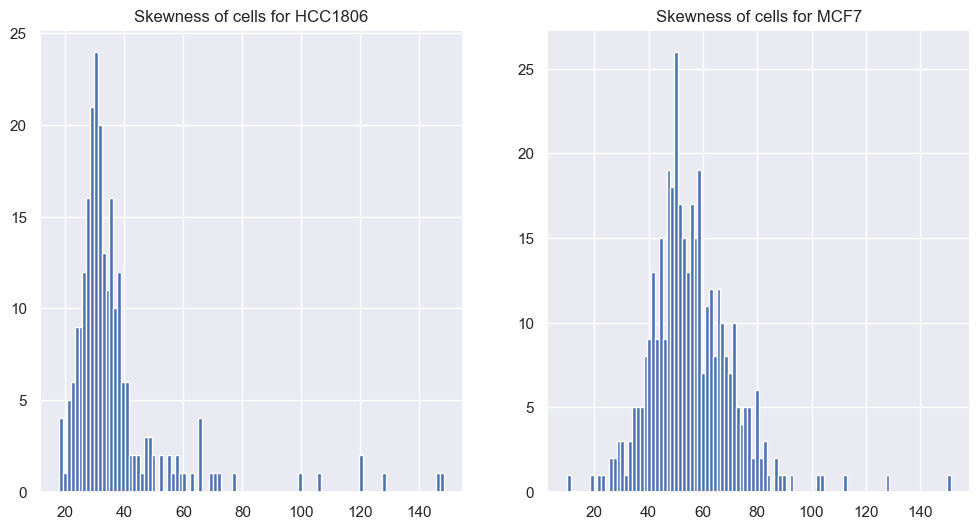

In [59]:
#Skewness of cells
skewness(df_HCC_s_cl, df_MCF_s_cl, title1="HCC1806", title2="MCF7", genes_or_cells="cells")

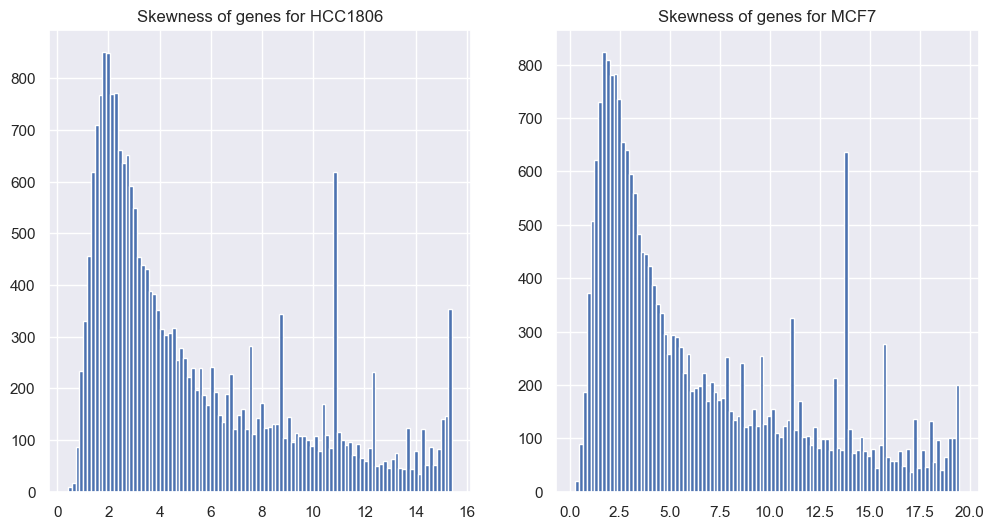

In [60]:
#Skewness of genes
skewness(df_HCC_s_cl.T, df_MCF_s_cl.T, title1="HCC1806", title2="MCF7", genes_or_cells="genes")

From the graphs above we see that the data has very large positive skew. This is exactly what we expect from our dataset, indeed we metioned before that we have a lot of entries which are zero in out datasets, this will lead to the mode (of a single cell) to be probably 0. The mean on the other hand will be very afected by the large values present in our columns (which can reach the order of 1e5) and the median will be somewhere between the two. In fact the Fisher-Pearson Coefficient (cancluated by `scripy.stats.skew`) when mode < median < mean will return a positive number. In our case the skewness is very drastic as our numbers can range in a very large interval.

In [61]:
#Kurtosis
from scipy.stats import kurtosis

def kurt(df1, df2, title1 = '', title2 = '', genes_or_cells = ''):
  figure, ax = plt.subplots(1, 2, figsize=(12,6))
  cnames1 = list(df1.columns)
  cnames2 = list(df2.columns)
  colN1 = np.shape(df1)[1]
  colN2 = np.shape(df2)[1]
  df_kurt1 = []
  df_kurt2 = []

  for i in range(colN1) :     
      v_df1 = df1[cnames1[i]]
      df_kurt1 += [kurtosis(v_df1)]
   
  for i in range(colN2):
     v_df2 = df2[cnames2[i]]
     df_kurt2 += [kurtosis(v_df2)]

  #First graph 
  ax[0].hist(df_kurt1,bins=100)
  ax[0].set_title("Kurtosis of " + genes_or_cells + " for "  + title1)

  #Second graph 
  ax[1].hist(df_kurt2,bins=100)
  ax[1].set_title("Kurtosis of " + genes_or_cells + " for " + title2)


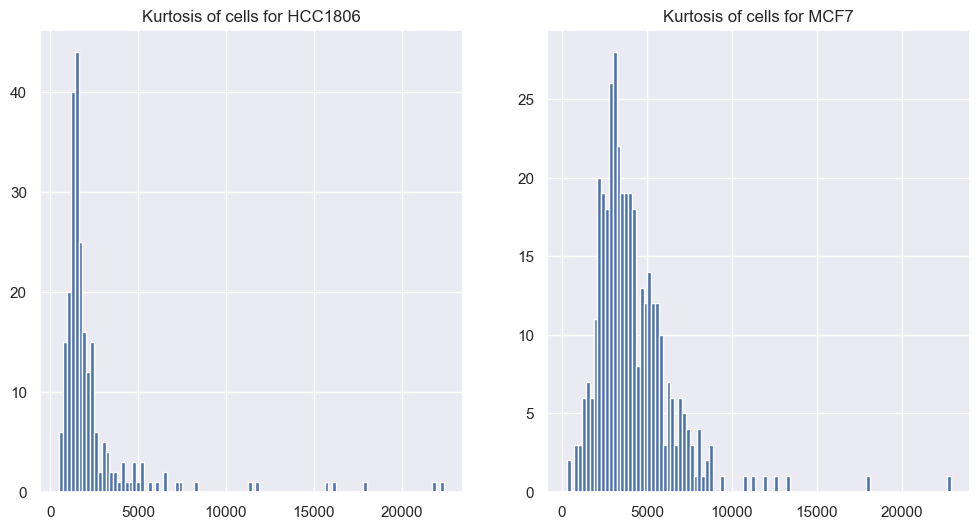

In [62]:
#Kurtosis for cells
kurt(df_HCC_s_cl, df_MCF_s_cl, title1="HCC1806", title2="MCF7", genes_or_cells="cells")

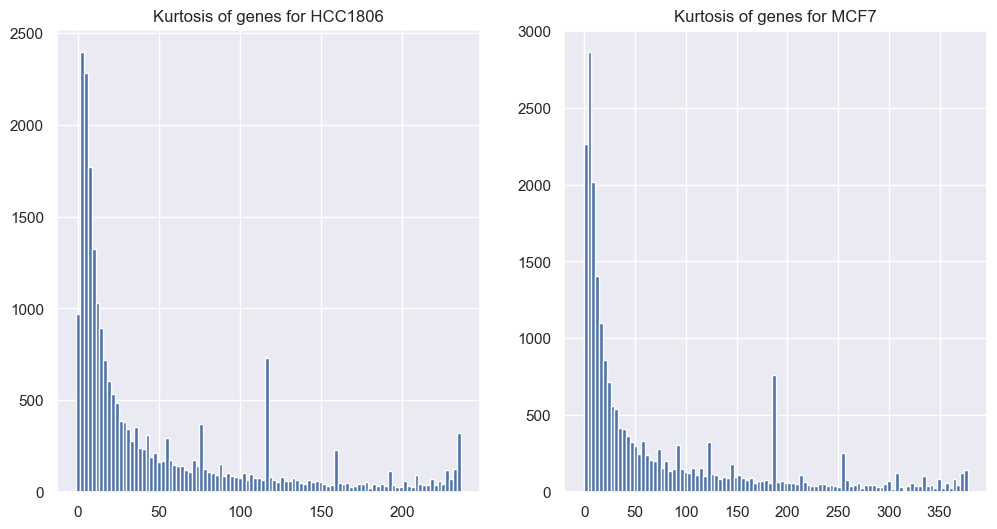

In [63]:
#Kurtosis for genes
kurt(df_HCC_s_cl.T, df_MCF_s_cl.T, title1="HCC1806", title2="MCF7", genes_or_cells="genes")

This is what we expect
for single cell:
spike at zero and it falls off very quickly beacuse of the large values which means the kertosis will be very large compared to normal dist. There will be very high values due to the sparceness for the data.


Unfortunately the graphs are highly non-normal and are skewed toward 0. This may lead to biases and problems went running the models. To fix this as much as possible we will normalize the data. Some models also need normalized data to work well, this may have been a problem but in most cases, our models still performed very well as we will see later on.

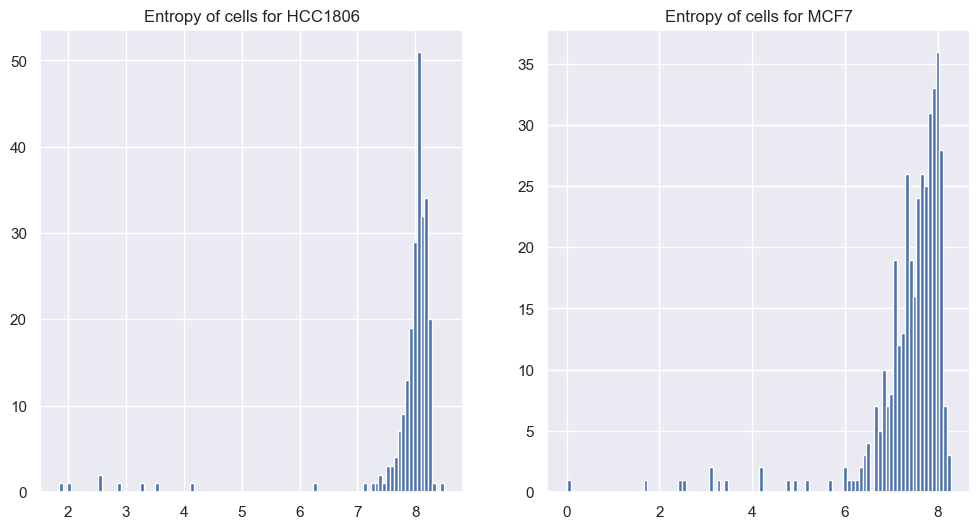

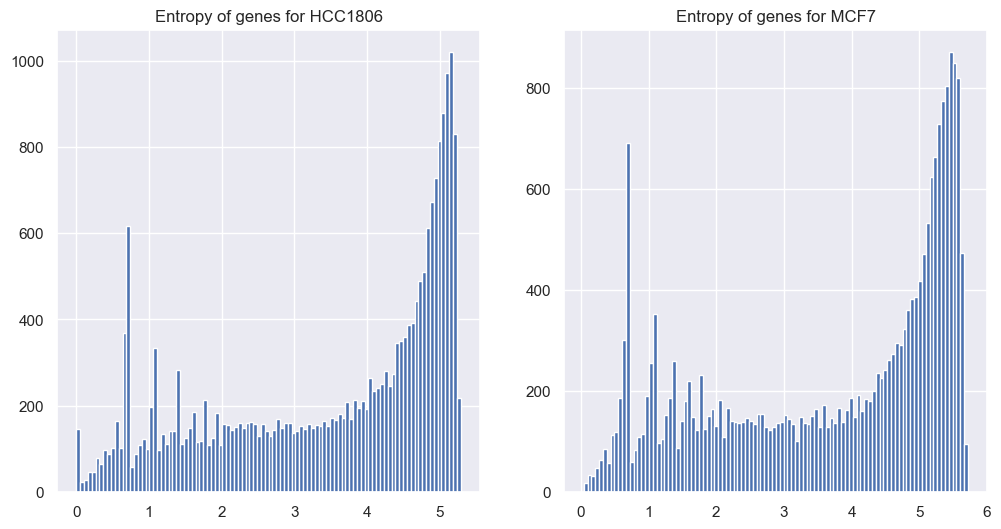

In [64]:
#Entropy
from scipy.stats import entropy

def entro(df1, df2, title1 = '', title2 = '', genes_or_cells=''):
  figure, ax = plt.subplots(1, 2, figsize=(12,6))
  cnames1 = list(df1.columns)
  cnames2 = list(df2.columns)
  colN1 = np.shape(df1)[1]
  colN2 = np.shape(df2)[1]
  df_kurt_cells1 = []
  df_kurt_cells2 = []

  for i in range(colN1) :     
      v_df1 = df1[cnames1[i]]
      df_kurt_cells1 += [entropy(v_df1)]
   
  for i in range(colN2):
     v_df2 = df2[cnames2[i]]
     df_kurt_cells2 += [entropy(v_df2)]

  #First graph 
  ax[0].hist(df_kurt_cells1,bins=100)
  ax[0].set_title("Entropy of " + genes_or_cells + " for "  + title1)

  #Second graph 
  ax[1].hist(df_kurt_cells2,bins=100)
  ax[1].set_title("Entropy of " + genes_or_cells + " for "  + title2)
  
entro(df_HCC_s_cl, df_MCF_s_cl, title1="HCC1806", title2="MCF7", genes_or_cells="cells")
entro(df_HCC_s_cl.T, df_MCF_s_cl.T, title1="HCC1806", title2="MCF7", genes_or_cells="genes")

In [65]:
#Calculating the maximum entropy value to compare with the graphs
print("Max entropy of the HCC cells: ", round(np.log2(df_HCC_s_cl.shape[0]), 2))
print("Max entropy of the MCF cells: ", round(np.log2(df_MCF_s_cl.shape[0]), 2), "\n")

print("Max entropy of the HCC genes: ", round(np.log2(df_HCC_s_cl.shape[1]), 2))
print("Max entropy of the MCF genes: ", round(np.log2(df_MCF_s_cl.shape[1]), 2))


Max entropy of the HCC cells:  14.51
Max entropy of the MCF cells:  14.48 

Max entropy of the HCC genes:  7.91
Max entropy of the MCF genes:  8.58


We see that overall a lot of the cells are about half of the maximum value of entropy. This means that the cells don't seem to be completely random and the presence of a lot of zeros in the columns probably contributes to lowering the value of the cell’s entropy.

Most genes on the other hand are much closer to the theoretical limit for entropy, this means that the genes seem more random and are harder to predict.


---
### Plot analysis

The blots below confirm our previous analitical analysis of the sparse dataset centered around zero. By implementing a boxplot and violin plot, we notice that even though the ranges differ, both datasets follow the same shape.

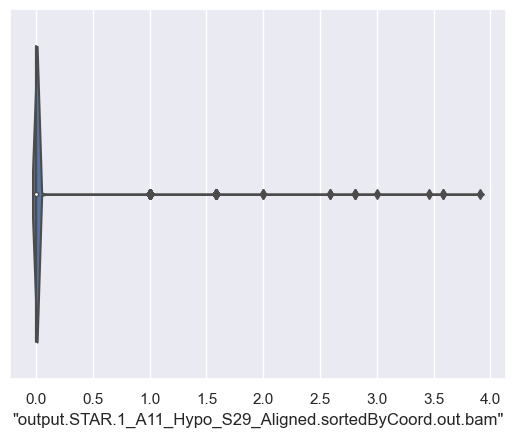

In [66]:
#Log transformation
def transform_log2(df):
    cnames = list(df.columns)
    df_log2 = np.log2(df[cnames[1]]+1)
    return df_log2


sns.boxplot(x=transform_log2(df_MCF_s_uf))
sns.violinplot(x=transform_log2(df_MCF_s_uf))
plt.show()

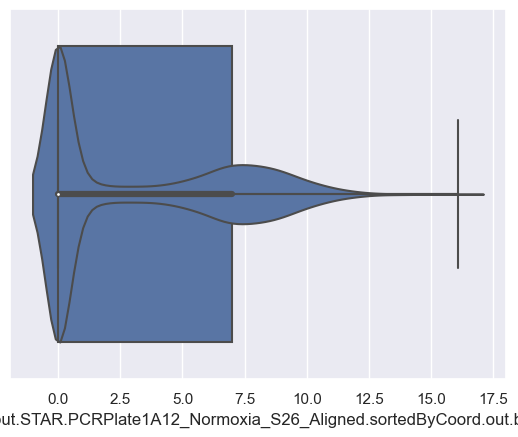

In [67]:
sns.boxplot(x=transform_log2(df_HCC_s_uf))
sns.violinplot(x=transform_log2(df_HCC_s_uf))
plt.show()

[None, None]

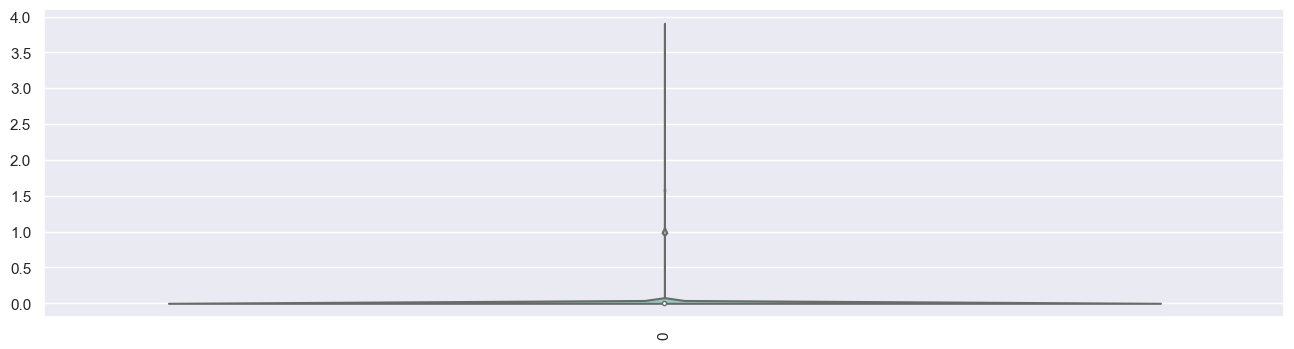

In [68]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=transform_log2(df_MCF_s_uf),palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None]

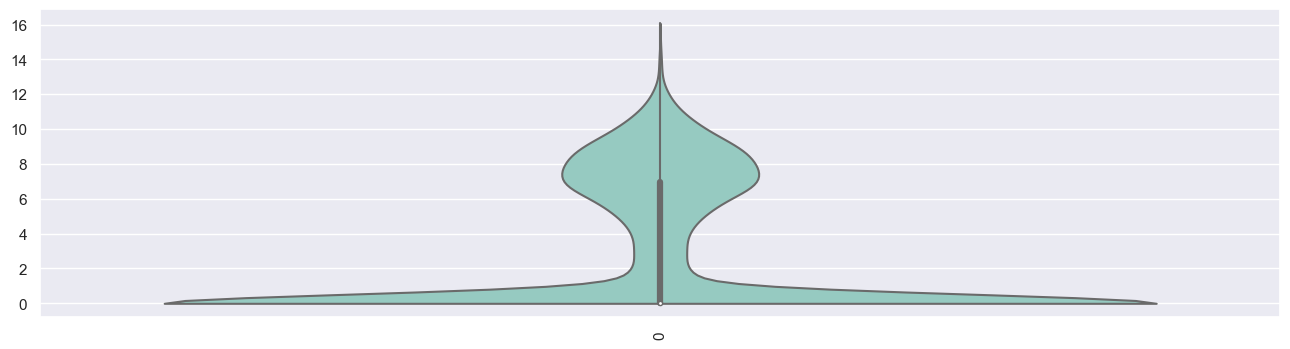

In [69]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=transform_log2(df_HCC_s_uf),palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

---
### Normalizing

In order to transform the data into a standardized range, we apply the min-max and z-score normalization. For both we have scaled the data in the range (-5, 10). After plotting the graphs, which helps us visualize the normalized dataset, we note that z-score gives a more visual effect of the normalized curve, but both follow that distribution.

In [70]:
def normed_data_graph(df):
    df_small = df.sample(frac=1, axis = 'columns').iloc[:, 10:30]  #just selecting part of the samples so run time not too long
    sns.displot(data=df_small,palette="Set3", kind="kde", bw_adjust=2)
    plt.xlim([-5,10])
    plt.show()


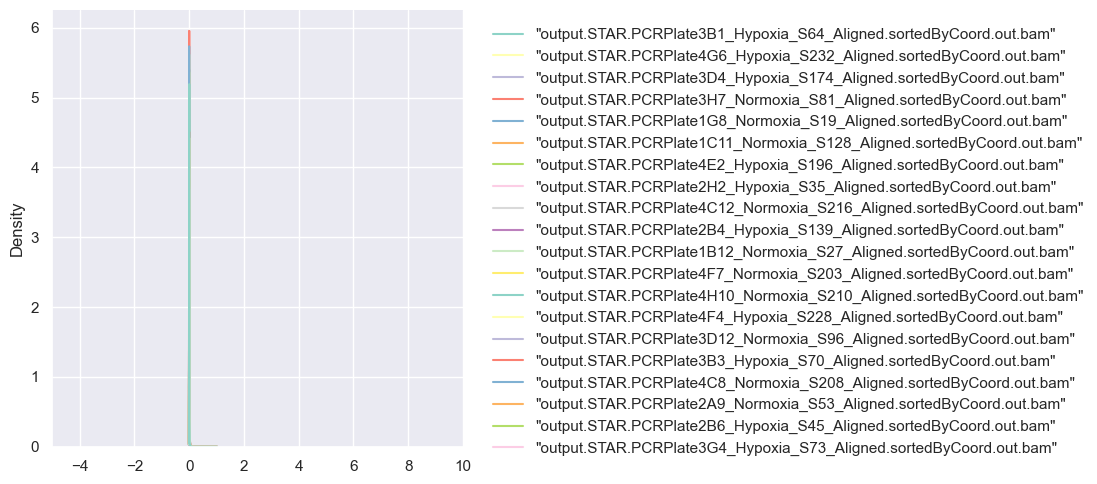

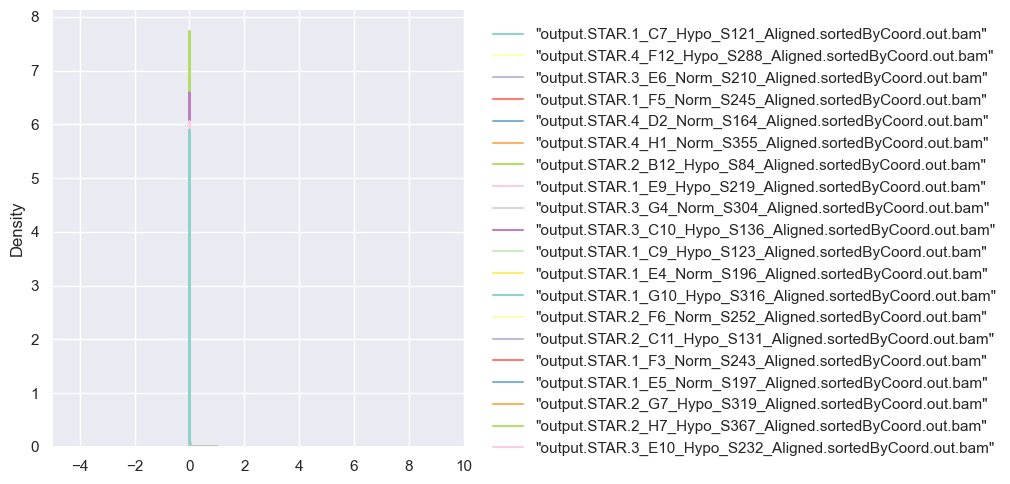

In [71]:
def min_max(df):
    df_norm = (df-df.min())/(df.max()-df.min())
    return df_norm

df_HCC_s_tr = min_max(df_HCC_s_cl)
df_MCF_s_tr = min_max(df_MCF_s_cl)
normed_data_graph(df_HCC_s_tr)
normed_data_graph(df_MCF_s_tr)

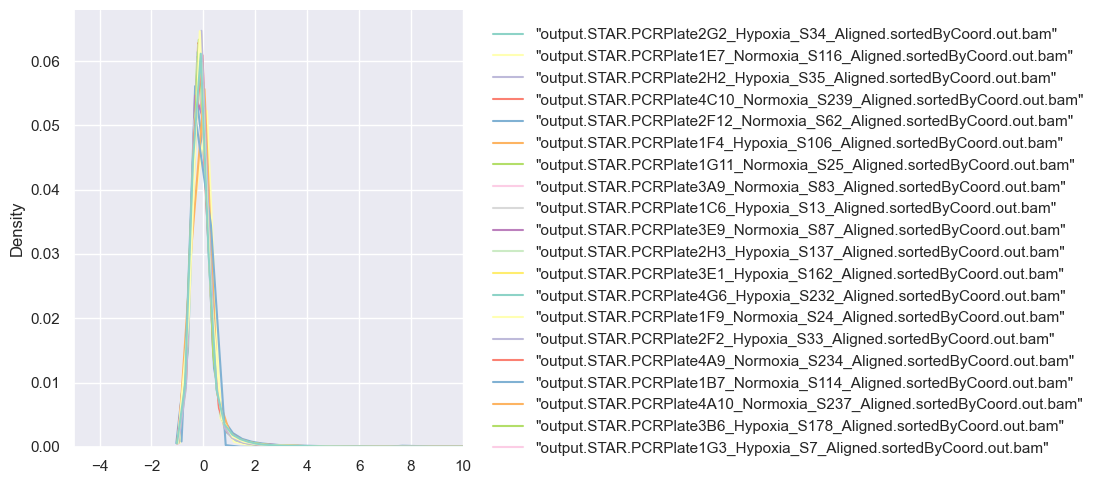

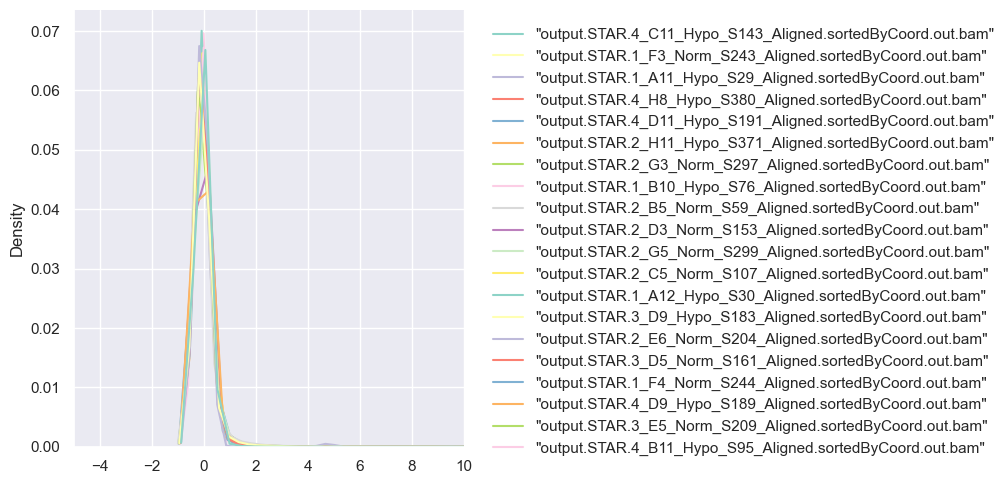

In [86]:
def z_score_scale(df):
    df_normed = normalized_df=(df-df.mean())/df.std()
    return df_normed

#We save the new data sets like df_XXX_s_tc (transfomred and cleared)
df_HCC_s_tc = z_score_scale(df_HCC_s_cl)
df_MCF_s_tc = z_score_scale(df_MCF_s_cl)
normed_data_graph(df_HCC_s_tc)
normed_data_graph(df_MCF_s_tc)

---
### Data Structure

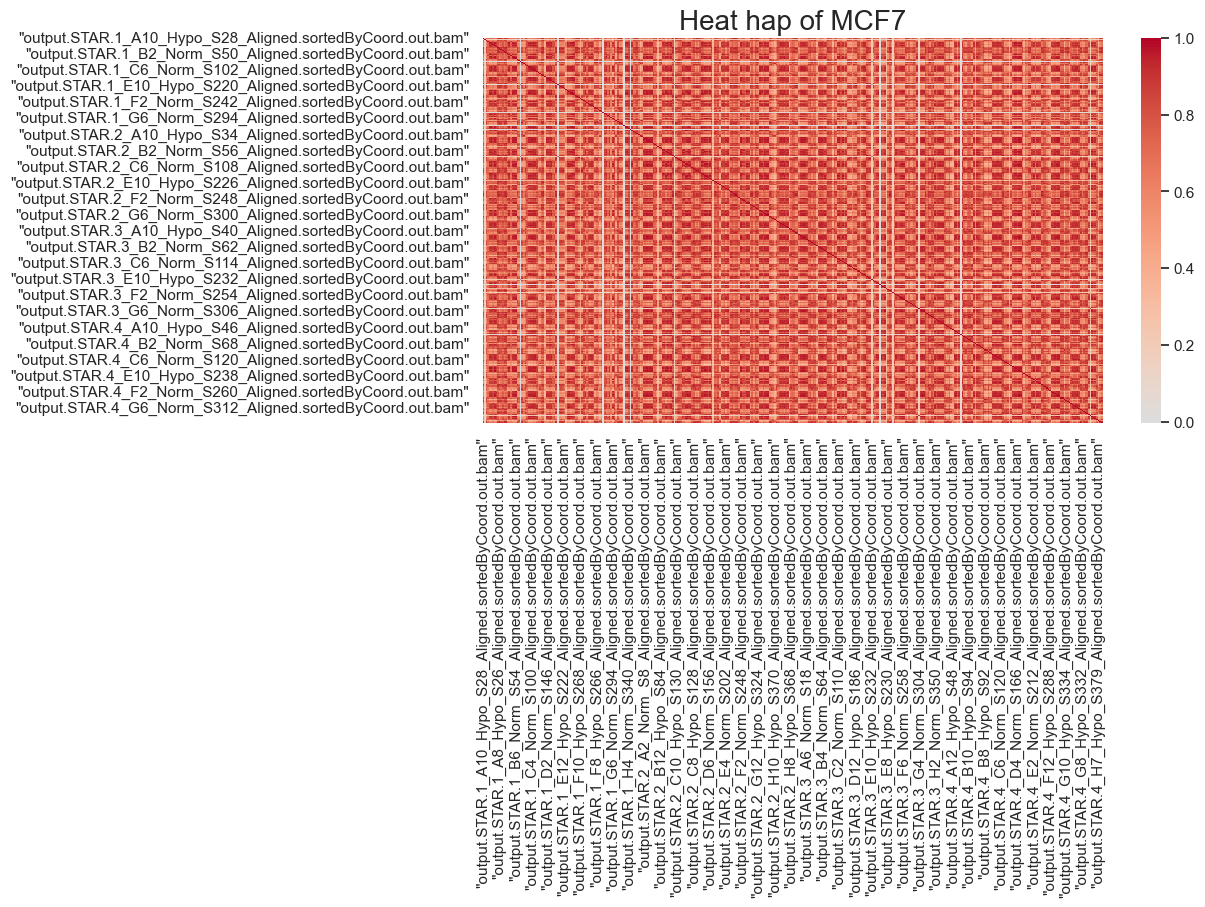

Number of cells included:  (383, 383)
Average correlation of expression profiles between cells:  0.49898217617448165
Min. correlation of expression profiles between cells:  -0.0020356476510366233


In [135]:
def heat_cor(df, title = ''):
    plt.figure(figsize=(10,5))
    c = df.corr()
    midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
    # sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
    # plt.show()
    sns.heatmap(c,cmap='coolwarm', center=0)
    plt.title("Heat hap of " + title, fontsize=20)
    plt.show()
    print("Number of cells included: ", np.shape(c))
    print("Average correlation of expression profiles between cells: ", midpoint)
    print("Min. correlation of expression profiles between cells: ", c.values.min())

heat_cor(df_MCF_s_tc, "MCF7")

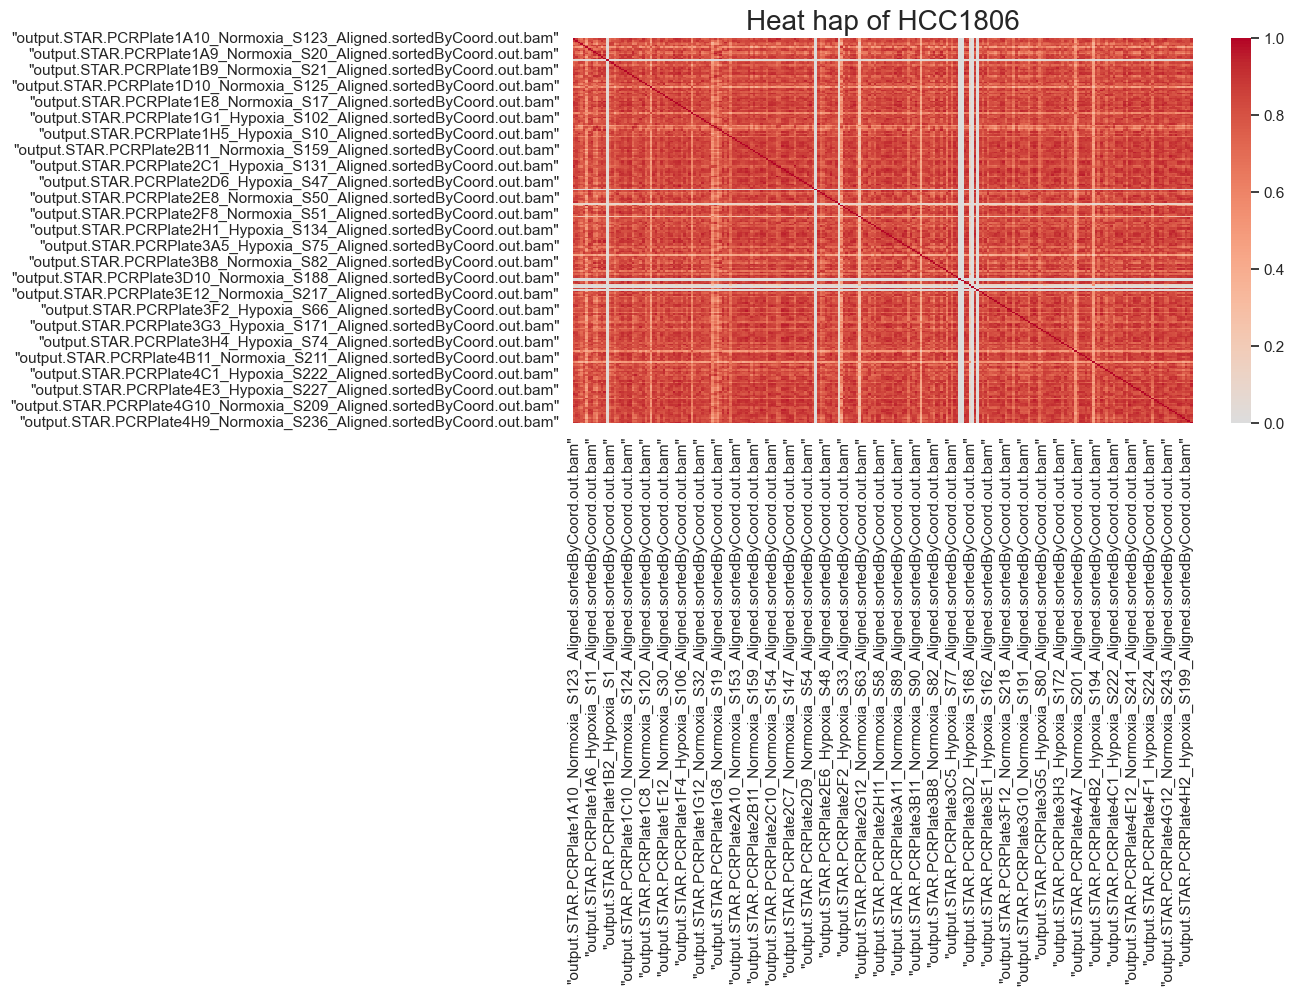

Number of cells included:  (241, 241)
Average correlation of expression profiles between cells:  0.4999332228622899
Min. correlation of expression profiles between cells:  -0.00013355427542028706


In [136]:
heat_cor(df_HCC_s_tc, title="HCC1806")

We could look at the distribution of the correlation between gene expression profiles using a histogram

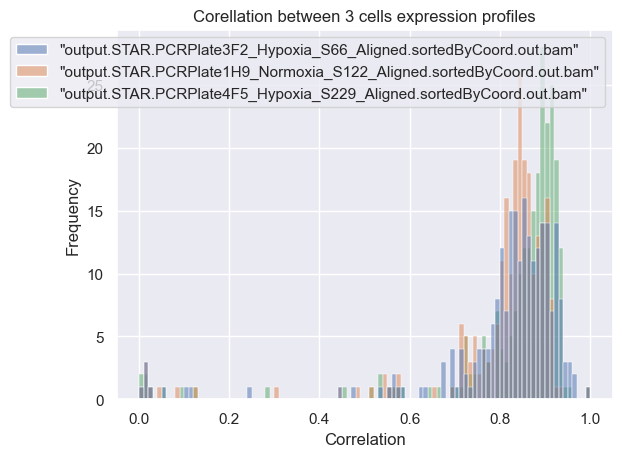

In [137]:
def hist_cor(df, title="", k = 3, rand=True, cells=None):
    #We take a small sample of the cells
    if cells is None: 
        c_small = df.corr().sample(n=k,axis='columns')
    else:
        c_small = df.corr().loc[:,cells[:3]]
    sns.histplot(c_small,bins=100)
    plt.title(f"Corellation between {k} cells expression profiles")
    plt.ylabel('Frequency')
    plt.xlabel('Correlation')
hist_cor(df_HCC_s_tc)

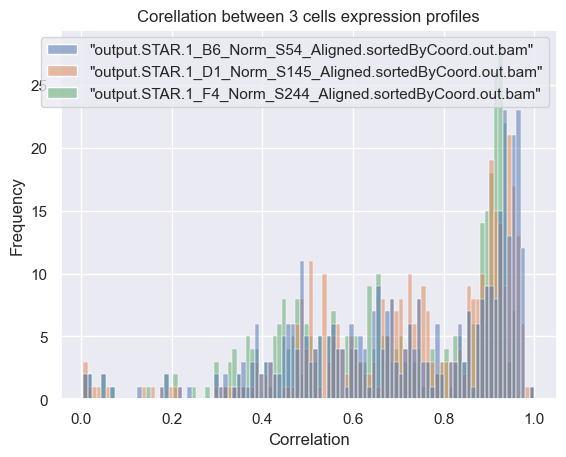

In [138]:
hist_cor(df_MCF_s_tc)

We expect that some genes are more frequent in hypoxia cells or in normoxia cells(in fact these are the cells that our classifiers will want to find!). Furthermore we expect that a large part of the genes have very high expression correlation amoung the other genes as these are what is called housekeeping genes and they do the basic functions for the cell to stay alive. By taking various samples we noticed that overall most of the correllations in the bar graph above are on the right side of 0.5. Let's now investigate the cells that do not follow this pattern.

We know that some genes will be characteristic of some cells. For example in our case we expect some genes to be expressed at high levels only in cells cultured in conditions of low oxygen (hypoxia), or viceversa. However, most of the low and/or high expressed genes will tend to be generally similar. Several genes will have a high expression across cells as they are house keeping genes needed for the basic functioning of the cell. Some genes will have low expression across cells as they are less or not essential for the normal functioning, so they will have low or no expression across cells and will only be expressed in specific circumstances.

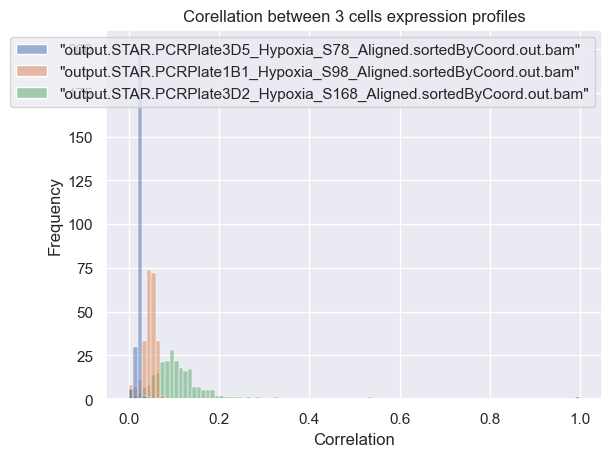

In [139]:
#Function that returns cells that have the lowest average correlation
def smallest_correlation(df, n=10):
    return list(df.corr().mean().nsmallest(n).index.values)

#Now lets plot the above histogram for three of these cells (for illustrative perposes we she the 4th, 5th and 6th smallest)
hist_cor(df_HCC_s_tc, cells=smallest_correlation(df_HCC_s_tc)[4:7])

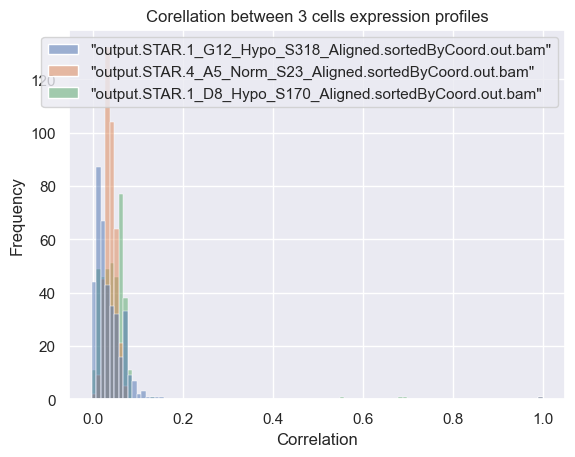

In [140]:
#Now lets plot the above histogram for three of these cells (for illustrative perposes we she the 4th, 5th and 6th smallest)
hist_cor(df_MCF_s_tc, cells=smallest_correlation(df_MCF_s_tc)[4:7])

Noticing that these cells are so uncorrelated from the rest, lets see how many zeros their columns have:

In [141]:
#Percentage of zeros in the very uncorrelated cells(we look at the original dataset as we already normalized this one)
print(f"Fraction of zeros in uncorellated cells: {round(frac_zeros(df_HCC_s_uf[smallest_correlation(df_HCC_s_tc)]),2)}%")

Fraction of zeros in uncorellated cells: 95.11%


In [142]:
#Percentage of zeros in the very uncorrelated cells(we look at the original dataset as we already normalized this one)
print(f"Fraction of zeros in uncorellated cells: {round(frac_zeros(df_MCF_s_uf[smallest_correlation(df_MCF_s_tc)]),2)}%")

Fraction of zeros in uncorellated cells: 96.51%


A lot of zeros when uncorrelated!!

---
---
## Data transformation comparison and conclusion 

As we reach the end of our data cleaning and transformation, we can compare it to the existing filtered dataset and review the results.

---
### Compare correlation matrices

We want to calculate correlation matrices for both the our Transformed Data and the given Filtered Data.

In [ ]:
# Calculate correlation coefficients
transformed_corr = df_HCC_s_tc.corr()
filtered_corr = df_HCC_s_f.corr()

The next step is to visualize the correlation matrice to get a better idea of how correlated the datapoints are.

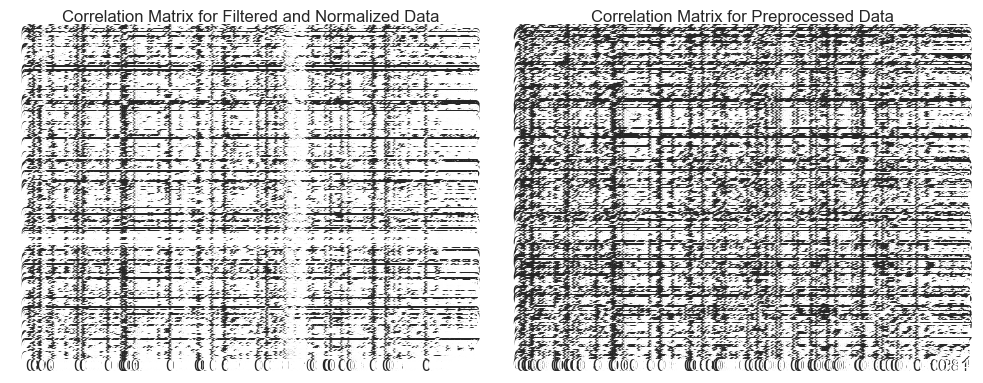

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(transformed_corr, ax=axes[0], cmap='coolwarm', annot=True, cbar=False, xticklabels=False, yticklabels=False)
sns.heatmap(filtered_corr, ax=axes[1], cmap='coolwarm', annot=True, cbar=False, xticklabels=False, yticklabels=False)
axes[0].set_title('Correlation Matrix for Filtered and Normalized Data')
axes[1].set_title('Correlation Matrix for Preprocessed Data')
plt.tight_layout()
plt.show()


From the visualization, we can conclude that the datasets are both similarly correlated.

---
### Compare on Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Create four dataframes containing only one column: the label hypoxia-normoxia is encoded as 0-1.

In [74]:
def labels(df):
    target = []
    for c in df.columns:
        if "Hypoxia" in c.replace('\"', '').split("_") or "Hypo" in c.split("_"):
            target.append(0)
        elif "Normoxia" in c.replace('\"', '').split("_") or "Norm" in c.split("_"):
            target.append(1)
        else:
            raise ValueError("Cell cannot be categorized")
    return target

After adding the necessary imports and label function for this section, we can move on to compare each of the datasets performance on the Random Forest Model.

 We perform a simple train-test split for both transformed and filtered, and repeat it for HCC and MCF. 

The next step is to train the models on each of the dataset.

In [87]:
# Splitting the HCC transformed dataset
X_HCC_transformed_train, X_HCC_transformed_test, y_HCC_transformed_train, y_HCC_transformed_test = train_test_split(df_HCC_s_tc.T, labels(df_HCC_s_tc), test_size=0.2, random_state=42)

# Splitting the MCF transformed dataset
X_MCF_transformed_train, X_MCF_transformed_test, y_MCF_transformed_train, y_MCF_transformed_test = train_test_split(df_MCF_s_tc.T, labels(df_MCF_s_tc), test_size=0.2, random_state=42)

# Splitting the HCC filtered dataset
X_HCC_filtered_train, X_HCC_filtered_test, y_HCC_filtered_train, y_HCC_filtered_test = train_test_split(df_HCC_s_f.T, labels(df_HCC_s_f), test_size=0.2, random_state=42)

# Splitting the MCF filtered dataset
X_MCF_filtered_train, X_MCF_filtered_test, y_MCF_filtered_train, y_MCF_filtered_test = train_test_split(df_MCF_s_f.T, labels(df_MCF_s_f), test_size=0.2, random_state=42)


In [ ]:
#For HCC
# Train Random Forest models on each dataset
rf_model_transformed = RandomForestClassifier(random_state=42)
rf_model_transformed.fit(X_HCC_transformed_train, y_HCC_transformed_train)

rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_HCC_filtered_train, y_HCC_filtered_train)

# Evaluate the models
y_transformed_pred = rf_model_transformed.predict(X_HCC_transformed_test)
y_filtered_pred = rf_model_filtered.predict(X_HCC_filtered_test)


#For MCF
# Train Random Forest models on each dataset
rf_model_transformed = RandomForestClassifier(random_state=42)
rf_model_transformed.fit(X_MCF_transformed_train, y_MCF_transformed_train)

rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_MCF_filtered_train, y_MCF_filtered_train)

# Evaluate the models
y_transformed_pred = rf_model_transformed.predict(X_MCF_transformed_test)
y_filtered_pred = rf_model_filtered.predict(X_MCF_filtered_test)



In [ ]:
#For HCC
# Train Random Forest models on each dataset
rf_model_HCC_transformed = RandomForestClassifier(random_state=42)
rf_model_HCC_transformed.fit(X_HCC_transformed_train, y_HCC_transformed_train)

rf_model_HCC_filtered = RandomForestClassifier(random_state=42)
rf_model_HCC_filtered.fit(X_HCC_filtered_train, y_HCC_filtered_train)

# Evaluate the models
y_HCC_transformed_pred = rf_model_HCC_transformed.predict(X_HCC_transformed_test)
y_HCC_filtered_pred = rf_model_HCC_filtered.predict(X_HCC_filtered_test)

#For MCF
# Train Random Forest models on each dataset
rf_model_MCF_transformed = RandomForestClassifier(random_state=42)
rf_model_MCF_transformed.fit(X_MCF_transformed_train, y_MCF_transformed_train)

rf_model_MCF_filtered = RandomForestClassifier(random_state=42)
rf_model_MCF_filtered.fit(X_MCF_filtered_train, y_MCF_filtered_train)

# Evaluate the models
y_MCF_transformed_pred = rf_model_MCF_transformed.predict(X_MCF_transformed_test)
y_MCF_filtered_pred = rf_model_MCF_filtered.predict(X_MCF_filtered_test)


As evaluation parameters, we use accuracy, precision, recall and f-1 score, before moving on to a general evaluation.

In [ ]:
#For HCC
# Evaluate the models
y_HCC_transformed_pred = rf_model_HCC_transformed.predict(X_HCC_transformed_test)
y_HCC_filtered_pred = rf_model_HCC_filtered.predict(X_HCC_filtered_test)

accuracy_HCC_transformed = metrics.accuracy_score(y_HCC_transformed_test, y_HCC_transformed_pred)
accuracy_HCC_filtered = metrics.accuracy_score(y_HCC_filtered_test, y_HCC_filtered_pred)

precision_HCC_transformed = metrics.precision_score(y_HCC_transformed_test, y_HCC_transformed_pred)
precision_HCC_filtered = metrics.precision_score(y_HCC_filtered_test, y_HCC_filtered_pred)

recall_HCC_transformed = metrics.recall_score(y_HCC_transformed_test, y_HCC_transformed_pred)
recall_HCC_filtered = metrics.recall_score(y_HCC_filtered_test, y_HCC_filtered_pred)

f1_score_HCC_transformed = metrics.f1_score(y_HCC_transformed_test, y_HCC_transformed_pred)
f1_score_HCC_filtered = metrics.f1_score(y_HCC_filtered_test, y_HCC_filtered_pred)



#For MCF
# Evaluate the models
y_MCF_transformed_pred = rf_model_MCF_transformed.predict(X_MCF_transformed_test)
y_MCF_filtered_pred = rf_model_MCF_filtered.predict(X_MCF_filtered_test)

accuracy_MCF_transformed = metrics.accuracy_score(y_MCF_transformed_test, y_MCF_transformed_pred)
accuracy_MCF_filtered = metrics.accuracy_score(y_MCF_filtered_test, y_MCF_filtered_pred)

precision_MCF_transformed = metrics.precision_score(y_MCF_transformed_test, y_MCF_transformed_pred)
precision_MCF_filtered = metrics.precision_score(y_MCF_filtered_test, y_MCF_filtered_pred)

recall_MCF_transformed = metrics.recall_score(y_MCF_transformed_test, y_MCF_transformed_pred)
recall_MCF_filtered = metrics.recall_score(y_MCF_filtered_test, y_MCF_filtered_pred)

f1_score_MCF_transformed = metrics.f1_score(y_MCF_transformed_test, y_MCF_transformed_pred)
f1_score_MCF_filtered = metrics.f1_score(y_MCF_filtered_test, y_MCF_filtered_pred)

In [ ]:
#For HCC
# Print the evaluation metrics
print("HCC Transformed Data:")
print("Accuracy:", accuracy_HCC_transformed)
print("Precision:", precision_HCC_transformed)
print("Recall:", recall_HCC_transformed)
print("F1-Score:", f1_score_HCC_transformed)

print("\nHCC Filtered Data:")
print("Accuracy:", accuracy_HCC_filtered)
print("Precision:", precision_HCC_filtered)
print("Recall:", recall_HCC_filtered)
print("F1-Score:", f1_score_HCC_filtered)


HCC Transformed Data:
Accuracy: 0.8163265306122449
Precision: 0.7894736842105263
Recall: 0.75
F1-Score: 0.7692307692307692

HCC Filtered Data:
Accuracy: 0.9347826086956522
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1-Score: 0.9433962264150944


In [ ]:
#For MCF
# Print the evaluation metrics
print("MCF Transformed Data:")
print("Accuracy:", accuracy_MCF_transformed)
print("Precision:", precision_MCF_transformed)
print("Recall:", recall_MCF_transformed)
print("F1-Score:", f1_score_MCF_transformed)

print("\nMCF Filtered Data:")
print("Accuracy:", accuracy_MCF_filtered)
print("Precision:", precision_MCF_filtered)
print("Recall:", recall_MCF_filtered)
print("F1-Score:", f1_score_MCF_filtered)

MCF Transformed Data:
Accuracy: 0.987012987012987
Precision: 0.9772727272727273
Recall: 1.0
F1-Score: 0.9885057471264368

MCF Filtered Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
#For HCC
# Perform cross-validation and compute the scores
scores_HCC_transformed = cross_val_score(rf_model_HCC_transformed, df_HCC_s_tc.T, labels(df_HCC_s_tc), cv=5, scoring='accuracy')
scores_HCC_filtered = cross_val_score(rf_model_HCC_filtered, df_HCC_s_tc.T, labels(df_HCC_s_tc), cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score_HCC_transformed = scores_HCC_transformed.mean()
mean_score_HCC_filtered = scores_HCC_filtered.mean()

# Print the results
print("Cross-Validation Accuracy Scores:", scores_HCC_transformed)
print("Mean Accuracy Score:", mean_score_HCC_transformed)

print("Cross-Validation Accuracy Scores:", scores_HCC_filtered)
print("Mean Accuracy Score:", mean_score_HCC_filtered)

Cross-Validation Accuracy Scores: [0.93877551 0.85714286 0.95918367 0.91666667 0.95833333]
Mean Accuracy Score: 0.9260204081632653
Cross-Validation Accuracy Scores: [0.93877551 0.85714286 0.95918367 0.91666667 0.95833333]
Mean Accuracy Score: 0.9260204081632653


In [ ]:
#For MCF
# Perform cross-validation and compute the scores
scores_MCF_transformed = cross_val_score(rf_model_MCF_transformed, df_MCF_s_tc.T, labels(df_MCF_s_tc), cv=5, scoring='accuracy')
scores_MCF_filtered = cross_val_score(rf_model_MCF_filtered, df_MCF_s_tc.T, labels(df_MCF_s_tc), cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score_MCF_transformed = scores_MCF_transformed.mean()
mean_score_MCF_filtered = scores_MCF_filtered.mean()

# Print the results
print("Cross-Validation Accuracy Scores:", scores_MCF_transformed)
print("Mean Accuracy Score:", mean_score_MCF_transformed)

print("Cross-Validation Accuracy Scores:", scores_MCF_filtered)
print("Mean Accuracy Score:", mean_score_MCF_filtered)

Cross-Validation Accuracy Scores: [0.94805195 0.96103896 1.         0.96052632 0.98684211]
Mean Accuracy Score: 0.971291866028708
Cross-Validation Accuracy Scores: [0.94805195 0.96103896 1.         0.96052632 0.98684211]
Mean Accuracy Score: 0.971291866028708


Overall, the filtered data performed slightly better than the transformed one. However, both produced good results.

---

# Models

In [75]:
#Train test split for both datasets
from sklearn.model_selection import train_test_split

#Train test split for SmartSeq
df_HCC_SS_tr, df_HCC_SS_ts, y_HCC_SS_tr, y_HCC_SS_ts = train_test_split(df_HCC_s_f_n_train.T, labels(df_HCC_s_f_n_train), test_size=0.2, random_state=42)
df_MCF_SS_tr, df_MCF_SS_ts, y_MCF_SS_tr, y_MCF_SS_ts = train_test_split(df_MCF_s_f_n_train.T, labels(df_MCF_s_f_n_train), test_size=0.2, random_state=42)

#Train test split for DropSeq
df_HCC_DS_tr, df_HCC_DS_ts, y_HCC_DS_tr, y_HCC_DS_ts = train_test_split(df_HCC_d_f_n_train.T, labels(df_HCC_d_f_n_train), test_size=0.2, random_state=42)
df_MCF_DS_tr, df_MCF_DS_ts, y_MCF_DS_tr, y_MCF_DS_ts = train_test_split(df_MCF_d_f_n_train.T, labels(df_MCF_d_f_n_train), test_size=0.2, random_state=42)


In [10]:
#Extra imports
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

from sklearn.metrics import adjusted_mutual_info_score
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

import warnings
warnings.filterwarnings('ignore')

---
---

## Dimensionality Reduction

### Blackbox Functions

We wrote a set of functions whose purpose is not only to apply said dimensionality reduction, but also to give us the "best choice" of dimension of the target space, in order to preserve as much information as possible.   
Moreover, the code also plots the explained variance per number of dimensions, a plot useful for a better understanding of the various models.
In general, these functions take mainly 3 variables as input:
- X, that is our `Observations Dataset`, which in our case will be the dataframe containing the gene expression of each cell.
- Y, that is the `Labels List`, which we use to assign colors to the points in our visualization scatterplot.
- model, that is the type of `Dimensionality Reduction` we chose to apply to our set X in the visualization process.

In [13]:
#Gives the 2-D Plot based on the model's Dimensionality Reduction
def Plot(X, Y, model):
    model.set_params(n_components=2)
    m = model.fit_transform(X)
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    visual = pd.DataFrame(m, columns=["PC1","PC2"])
    plt.scatter(visual["PC1"], visual["PC2"], c=condc, s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Conditions")
    plt.show()

In [14]:
def Var_Predicted(X, model,n):
    pred_var_expl = []
    model.set_params(n_components=n)
    matrix = model.fit_transform(X)
    for i in range(1,n+1):
        matrix_current = pd.DataFrame(matrix[:,:i])
        pls = PLSRegression(n_components=i)
        pls.fit(matrix_current, X)                                              
        y = pls.predict(matrix_current)
        pred_var_expl.append(r2_score(X,y,multioutput="variance_weighted"))     
    return pred_var_expl

In [15]:
#Function for 95% explained variance definition
def numb_comp(X, model, eps = 0.95, n=100):
    vars = Var_Predicted(X,model,n)
    for i in range(len(vars)):
        if vars[i]>=0.95:
            return vars, i
    return vars, n

In [16]:
#Plots the Explained Variance based on the Number of Components
def Var_Plot(X, model, eps=0.95, n=100):
    variances, C = numb_comp(X, model, eps)
    print("The Opitmal Number of Dimensions for PCA is", C)
    plt.plot(range(1,n+1), variances, '-', linewidth=2)
    plt.plot([C, C], [0, eps], "k:")
    plt.plot([0, C], [eps, eps], "k:")
    plt.xlabel('Dimensions')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()


In [17]:
def Blackbox(X,Y, model):
    Var_Plot(X, model)
    Plot(X,Y,model)

### PCA

The first instance of Dimensionality Reduction that we decided to apply is `PCA`. PCA, or Principal Component Analysis, is a type of linear dimensionality reduction that aims to transform the original data into a smaller set of coordinates, called Principal Components.   
Given a Standardized Dataset, PCA computes the eigenvalues and eigenvectors of the covariance matrix, and chooses the top k eigenvectors (where k is the dimension of the target space) based on the corresponding eigenvalues, and projects the data in the new space spanned by these vectors.

The Opitmal Number of Dimensions for PCA is 31


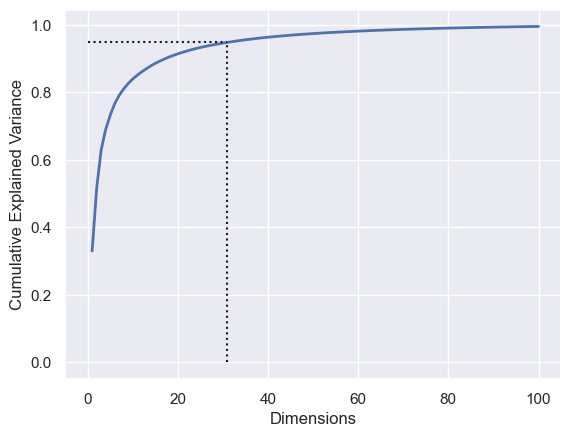

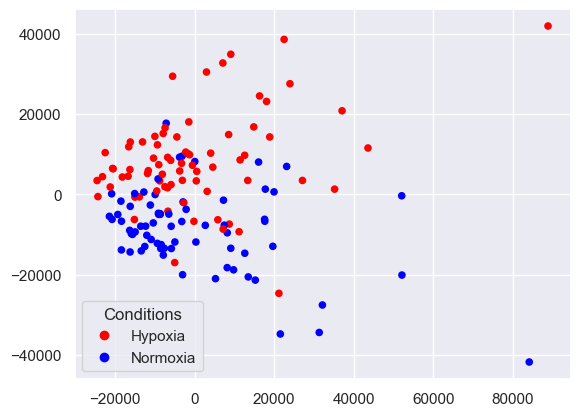

In [19]:
Blackbox(df_HCC_SS_tr,y_HCC_SS_tr, PCA())

PCA on HCC Dataset

The Explained Variance - Dimensions Plot gives us that 24 dimensions are sufficient to explain 95% of the variance in our data, a much greater result compared to the 3000 dimensions we were starting with.   
On the other hand, the plot in 2 Dimensions gives us points that are extremely mixed up: it doesn't seem to have a clear correlation with the labels.

The Opitmal Number of Dimensions for PCA is 18


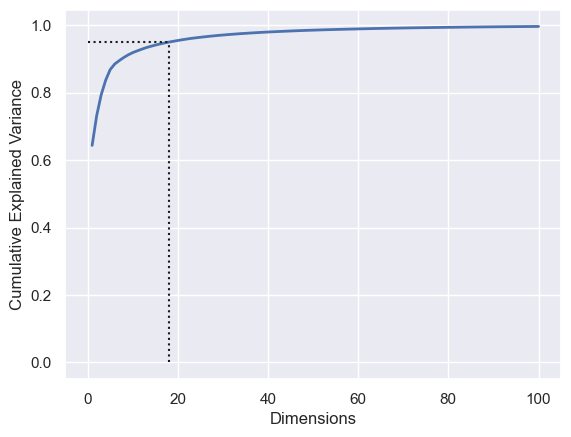

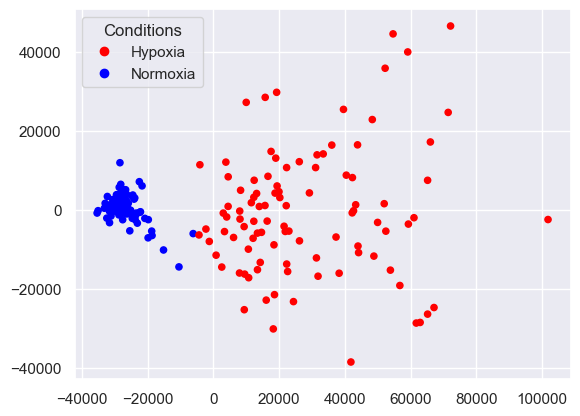

In [20]:
Blackbox(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

PCA on MCF Dataset

The Explained Variance - Dimensions Plot gives us an even better result: only 18 dimensions are necessary to explain 95% of the variance in our data!!!   
Moreover, compared to the previous dataset, the plot in 2 Dimensions gives us a great result: you can distinguish two main clusters of data, which would make clustering algorithm obtain good results on this result.

### t-SNE

`t-SNE`, which stands for t-Distributed Stochastic Neighbor Embedding,  is another method of Dimensionality Reduction, which is a nonlinear method based on the computation of a probability distribution which aims to keep similar points in the dataset close when getting in a lower dimensional space.   
It is mainly used for visualization of high dimensional data and cluster recognition.

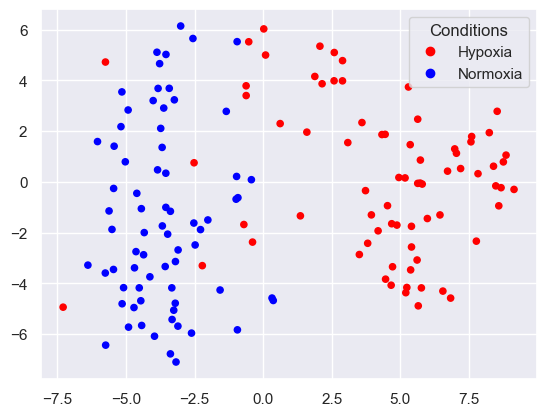

In [21]:
Plot(df_HCC_SS_tr,y_HCC_SS_tr,TSNE(random_state=69))

Due to the properties of the Dimensionality reduction method, it is impossible to plot a Variance-Dimensions plot, as the dimensionality reduction function TSNE( ) doesn't work after 4 dimensions.   
However, the visualization plot in 2 Dimensions already gives us a much better result compared to PCA on the HCC dataset: we can recognize in the plot two main pairs of clusters, but this is not necessarily good enough for a clustering algorithm to work well.

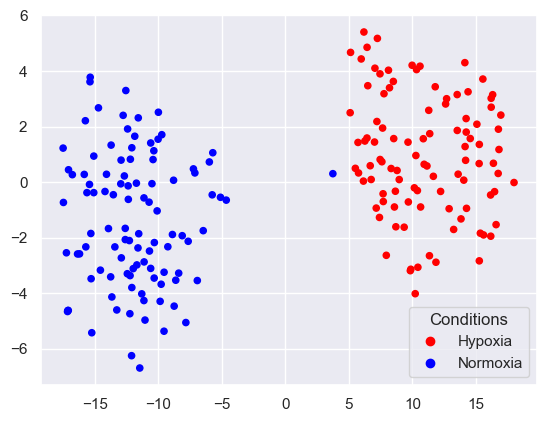

In [174]:
Plot(df_MCF_SS_tr,y_MCF_SS_tr,TSNE(random_state=69))

In the case of the MCF dataset, the result is much better! It clearly shows two main clusters, a blue one on the left of Normoxia cells and a red one on the right for Hypoxia cells. It looks like a clustering algorithm would work better on such a plot.

### UMAP

The last method of Dimensionality Reduction that we decided to apply is `UMAP`, or Uniform Manifold Approximation and Projection, which is based on the mathematical construct of manifolds: it finds first manifolds in the complex data and then represents them in the low-dimensional space.

The Opitmal Number of Dimensions for PCA is 100


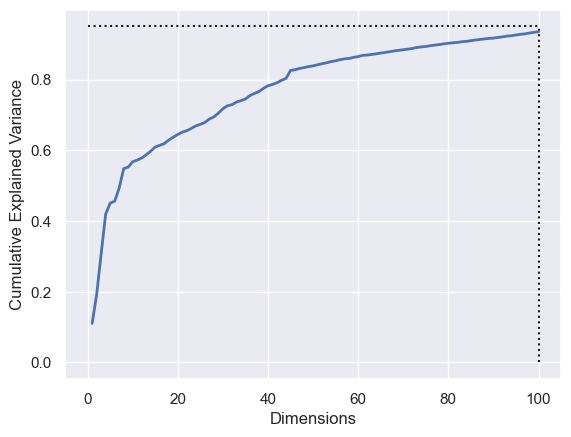

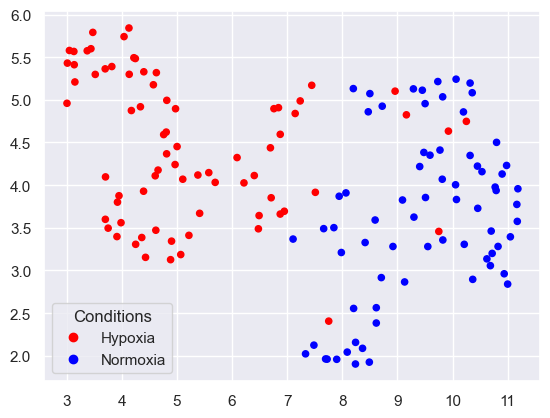

In [22]:
Blackbox(df_HCC_SS_tr, y_HCC_SS_tr, UMAP(random_state=69))

The Variance-Dimensions Plot for HCC gives us a much lower growth compared to the PCA case. This is to be expected, as the principle behind PCA is entirely that of maximizing the explained variance, while for UMAP we don't have a clear correlation between the two variables.   
On the other hand, the two dimensional scatterplot is very similar to that of TSNE, showing two main pairs of clusters.

The Opitmal Number of Dimensions for PCA is 100


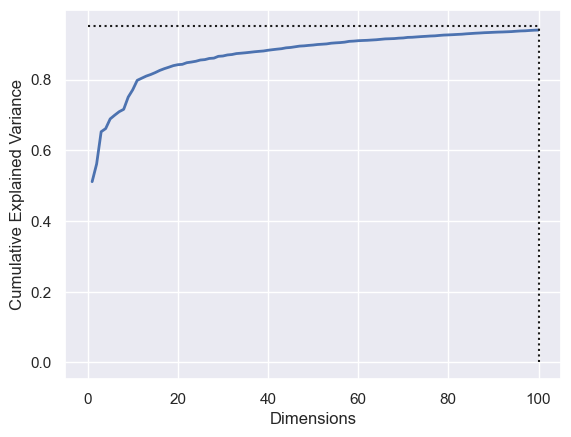

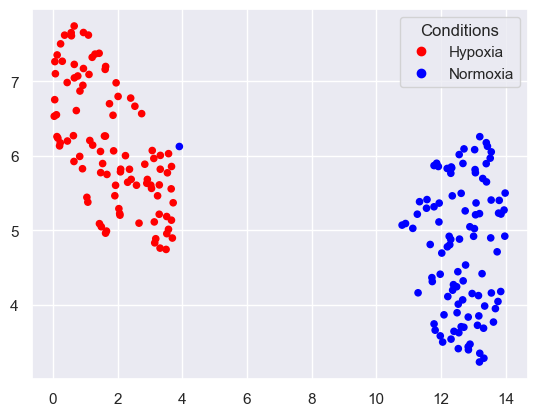

In [23]:
Blackbox(df_MCF_SS_tr,y_MCF_SS_tr,UMAP(random_state=69))

The result for the MCF dataset is similar to that of HCC, as the number of dimensions explaining 95% of the variance is still more than 100.   
What is extremely interesting about UMAP on MCF is the Two Dimensional Scatterplot: it shows two extremely clear clusters of Normoxia and Hypoxia cells.

Based on the previous results, the two methods that we consider to be the most relevant are PCA, which is the best in terms of explained variance per number of components, and UMAP, which is the one which looks like to be the most suited for clustering.

---
---

## Clustering

Clutering is a Machine Learning Technique that aims to identify patterns and relationships in dataframe, by grouping together "clusters" of data.

### Two Components Dimensionsionality Reduction

This brief code allows us to apply a generic Dimensionality Reduction Technique, contained in the variable `model`, to a generic dataframe, contained in `X`.

In [12]:
def Two_Comp_DR(X,model):
    model.set_params(n_components=2)
    m = model.fit(X)
    mnew = m.fit_transform(X)
    x_fit = pd.DataFrame(mnew, columns=["PC1","PC2"])
    return x_fit, m

---

### HCC

First of all we decided to run clustering on the HCC dataframe, in order to check whether the algorithm gives us a good classification model for recognizing Normoxia vs Hypoxia Cells.

#### 2 Clusters HCC

Our first try was to apply a simple clustering to our dataframes in order to check whether the two clusters given by the clustering algorithm, in this case `KMeans`, would give us a result that resembles our Hypoxia/Normoxia classification.

In [18]:
def KM_Plot(X,model):
    X_Reduced, m = Two_Comp_DR(X, model)
    km = KMeans(n_clusters=2, random_state=69)
    km.fit(X_Reduced)
    labels = km.fit_predict(X_Reduced)
    Plot(X, labels, model)

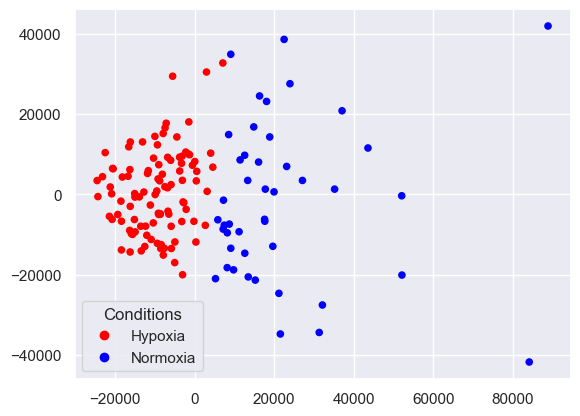

In [178]:
KM_Plot(df_HCC_SS_tr, PCA())

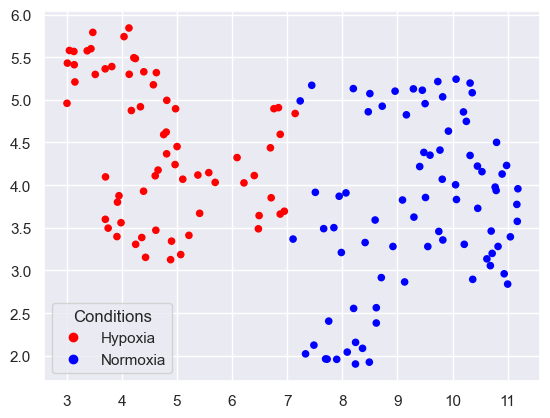

In [179]:
KM_Plot(df_HCC_SS_tr, UMAP(random_state=69))

Clearly in none of the three cases of Dimensionality Reduction, the results are satisfactory. As we could have expected, the clustering algorithm fails to recognize the nonlinear distinction in clusters in the original dataset, therefore we need to try with a different approach.

#### KMeans on Full Dimensions

Our second idea was to apply the clustering algorithm to differentiate our dataset in a number of clusters larger than 2, and then post-process the labels of each cluster in order to assign to each cluster the label that is most frequent between the points of the cluster.

Once again the clustering algorithm that we decided to apply is `KMeans`, an algorithm which works as follows: it picks at random k centroids in the space of the data to which you apply the algorithm, and then assigns a label to each datapoint based on the closest centroid. It then shifts the centroid to the center of mass of the cluster, to then repeat the classification until convergence.

In [28]:
def OptimalN(X, Y):
    df = pd.DataFrame(columns=['Clusters', 'AMI'])
    for n in range(11,21):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        ami = adjusted_mutual_info_score(Y, labels)
        row = {'Clusters': n, 'AMI':ami}
        df = df.append(row, ignore_index=True)
    max_row = df.loc[df['AMI'].idxmax()]
    return int(max_row[0])

In [29]:
def Labels_Post_Process(n, Labels,Y):
    d={}
    for x in range(n):
        indices = [i for i in range(len(Labels)) if Labels[i] == x]
        corresp_y = [Y[i] for i in indices]
        expected = np.argmax(np.bincount(corresp_y))
        d[x] = expected

    for i in range(len(Labels)):
        Labels[i] = d[Labels[i]]
    return d, Labels

In [30]:
def KM_Clustering(X, Y, n):
        method=KMeans(n_clusters=n, random_state=1)
        method.fit(X)
        labels = method.fit_predict(X)
        d, l = Labels_Post_Process(n, labels, Y)
        return d, l

In [31]:
def Ultra_KMeans(X,Y,model):
    Number = OptimalN(X,Y)
    print(Number)
    d, Labels = KM_Clustering(X, Y, Number)
    Plot(X,Labels,model)
    model1 = model.fit(X)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X)
    return model1, model2, d

14


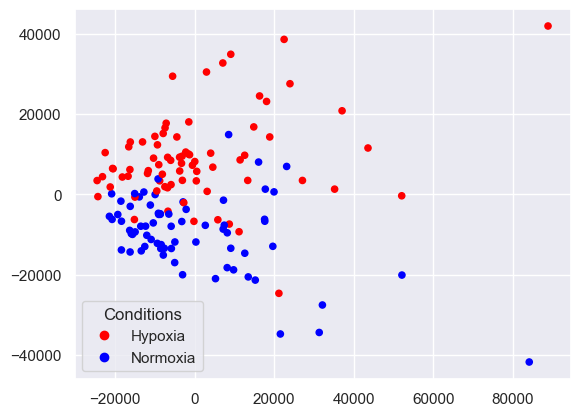

In [184]:
kmpca_hcc = Ultra_KMeans(df_HCC_SS_tr,y_HCC_SS_tr, PCA())

14


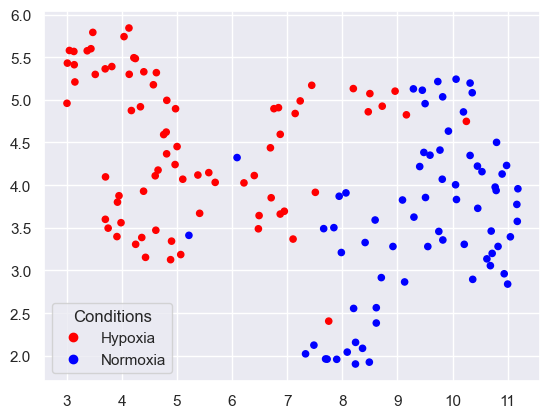

In [185]:
kmumap_hcc = Ultra_KMeans(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

The results obtained in this method are already much better compared to the previous attempt, but our concern was that applying the clustering to the full dimensions dataset wouldn't fully use the advantages of our dimensionality reduction technique, as the dimensionality reduction in this case is only used to visualize the result.

---
##### Testing

In [35]:
def Test_1(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    labels = km.predict(X_test)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [187]:
Test_1(kmpca_hcc,df_HCC_SS_ts,y_HCC_SS_ts)

0.13513513513513514


We decided to test the correctness of our classification to a test dataset, and our classifier got the correct result in 75% of the given inputs.

#### KMeans on Reduced Dimensions

Another method we decided to implement was to apply the same clustering as above, but on the Reduced Dimensions Dataset.

In [19]:
def Plot_2(X,Y):
    colors = ["red","blue"]
    condc = [colors[i] for i in Y]
    cluster_names = ["Hypoxia", "Normoxia"]
    plt.scatter(X["PC1"], X["PC2"], c=[colors[i] for i in Y], s=20)
    handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=cluster_names[i]) for i, color in enumerate(colors)]
    legend = plt.legend(handles=handles, loc="best", title="Assigned Labels")
    plt.show()

In [20]:
def KMR_Clustering(X,Y,model):
    X_R, model1 = Two_Comp_DR(X,model)
    Number = OptimalN(X_R,Y)
    print(Number)
    d, Labels = KM_Clustering(X_R, Y, Number)
    Plot_2(X_R, Labels)
    km = KMeans(n_clusters=Number, random_state=1)
    model2 = km.fit(X_R)
    return model1, model2, d

19


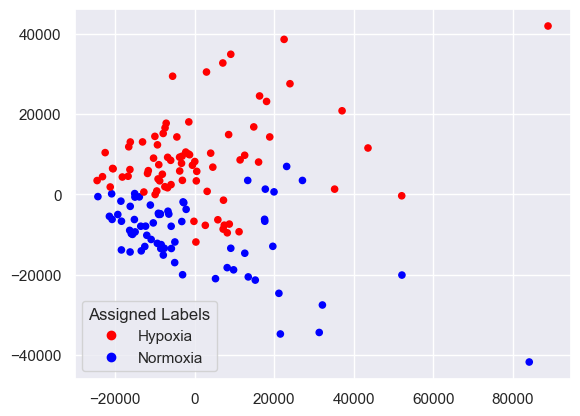

In [190]:
kmrpca = KMR_Clustering(df_HCC_SS_tr,y_HCC_SS_tr,PCA())

11


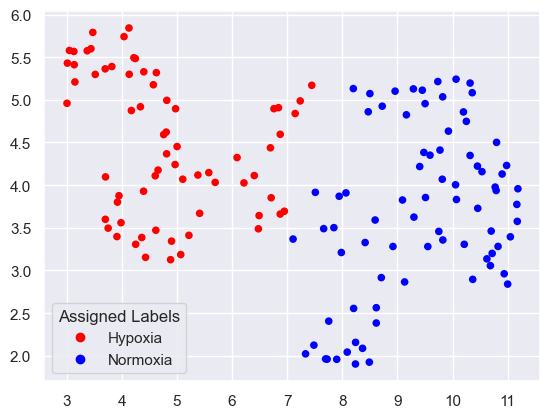

In [191]:
kmrumap = KMR_Clustering(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

The results on PCA are not so good, but the results on UMAP look very accurate, and the performance of this method are better than the previous as our clustering algorithm is applied to a 2-dimensional dataset instead of a 3000-dimensional one.

---
##### Test

In [24]:
def Test_2(models, X_test, Y_test):
    dr = models[0]
    km = models[1]
    lpp = models[2]
    try:
        X_ts = models[0].transform(X_test)
    except AttributeError:
        X_ts = models[0].fit_transform(X_test)
    labels = km.predict(X_ts)

    for i in range(len(labels)):
        labels[i] = lpp[labels[i]]
    ys = [int(i) for i in Y_test]
    count=0
    for i in range(len(ys)):
        if ys[i] != labels[i]:
            count += 1
    print(count/len(ys))

In [193]:
Test_2(kmrpca, df_HCC_SS_ts, y_HCC_SS_ts)
#8      =>      0.36
#12     =>      0.4
#24     =>      0.53
#31     =>      0.47

0.35135135135135137


In [194]:
Test_2(kmrumap, df_HCC_SS_ts, y_HCC_SS_ts)
#9      =>      0.2
#11     =>      0.18
#24     =>      0.24
#31     =>      0.22

0.05405405405405406


As before, we performed a couple of tests on the test dataset on different ranges of number of clusters, and it seems that the best result is obtained by applying KMeans on a dataset obtained with dimensionality reduction through UMAP with 11 post-processed clusters, which gives us the correct classifcation in 82% of instances of entries of the test set.

#### DBSCAN

Another method of clustering we decided to apply is `DBSCAN`, short for Density Based Spatial Clustering of Applications with Noise. It works by grouping together points by defining a neighborhood of each point of radius epsilon and defining a cluster if the number of datapoints is at least min_samples.

In [21]:
def Optimal_Ms(X, Y):
    df = pd.DataFrame(columns=['MS', 'AMI'])
    for n in range(5,10):
        method=DBSCAN(min_samples=n, eps=30000)
        method.fit(X)
        labels = method.fit_predict(X)
        ami = adjusted_mutual_info_score(Y, labels)
        row = {'MS': n, 'AMI':ami}
        df = df.append(row, ignore_index=True)
    max_row = df.loc[df['AMI'].idxmax()]
    return int(max_row[0])

In [22]:
def DBS_Clustering(X, Y, n):
        method=DBSCAN(min_samples=n, eps=30000)
        method.fit(X)
        labels = method.fit_predict(X)
        return labels

In [23]:
def Ultra_DBSCAN(X,Y,model):
    Number = Optimal_Ms(X,Y)
    Labels = DBS_Clustering(X, Y, Number)
    Plot(X,Labels,model)

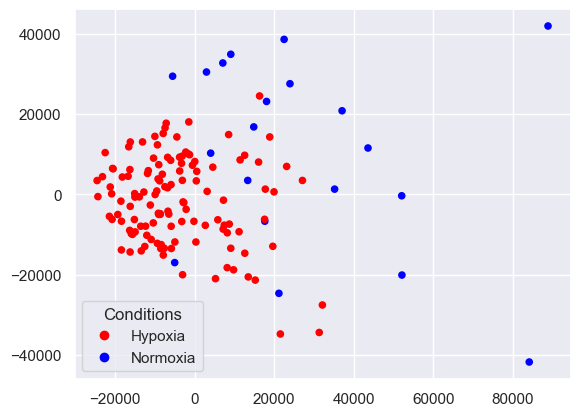

In [198]:
Ultra_DBSCAN(df_HCC_SS_tr,y_HCC_SS_tr,PCA())

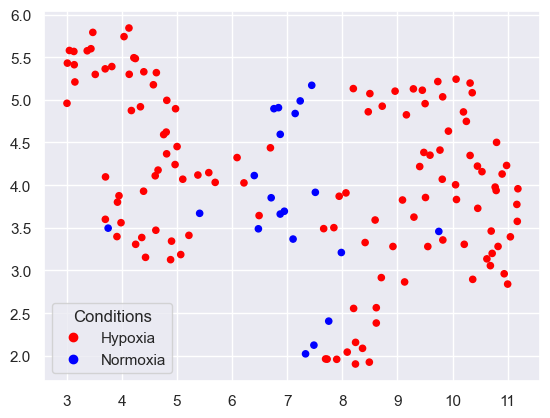

In [199]:
Ultra_DBSCAN(df_HCC_SS_tr,y_HCC_SS_tr,UMAP(random_state=69))

Unfortunately, the results obtained with DBSCAN is worse than those obtained with KMeans, and due to the way the algorithm works we have no hope of applying a post-processing procedure similar to that used with KMeans.

---

### MCF

#### KMeans on Full Dimensions

11


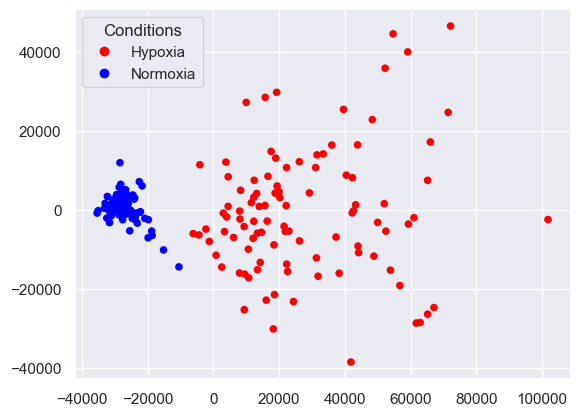

In [200]:
kmpca_mcf = Ultra_KMeans(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

11


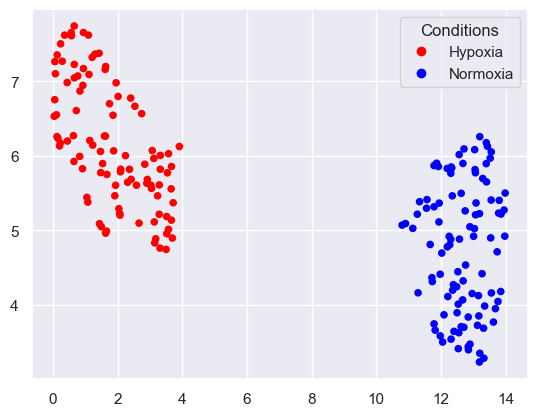

In [201]:
kmumap_mcf = Ultra_KMeans(df_MCF_SS_tr, y_MCF_SS_tr, UMAP(random_state=69))

As we expected from the way the plots with correct labels looked, clustering obtains really good results in terms of similarity between empirical labels and the correct ones.

In [202]:
Test_1(kmpca_mcf, df_MCF_SS_ts, y_MCF_SS_ts)

0.02


Testing the classifier on the test set gives us correct predictions in 98.4% of the instances, an extremely good result.

#### KMeans on Reduced Dimensions

11


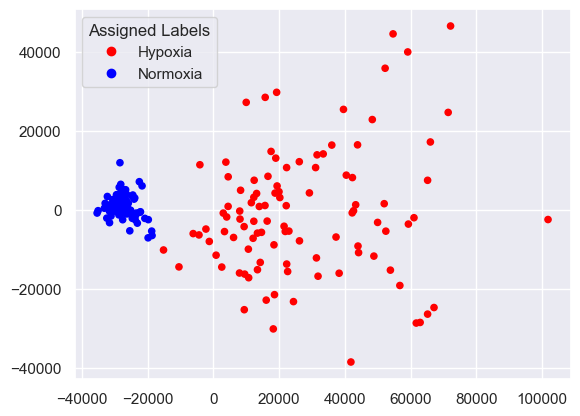

In [203]:
kmrpca_mcf = KMR_Clustering(df_MCF_SS_tr,y_MCF_SS_tr,PCA())

11


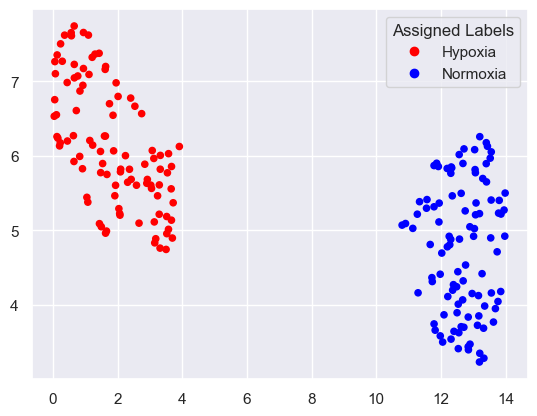

In [204]:
kmrumap_mcf = KMR_Clustering(df_MCF_SS_tr,y_MCF_SS_tr,UMAP(random_state=69))

In [205]:
Test_2(kmrpca_mcf,df_MCF_SS_ts,y_MCF_SS_ts)

0.02


In [206]:
Test_2(kmrumap_mcf, df_MCF_SS_ts, y_MCF_SS_ts)

0.02


Again, KMeans obtains extremely good results also on the reduced datasets, with classifiers with precision of 100% in the case of the PCA-Reduced Dataset and the same 98.4% on the UMAP-Reduced Dataset.

#### DBSCAN

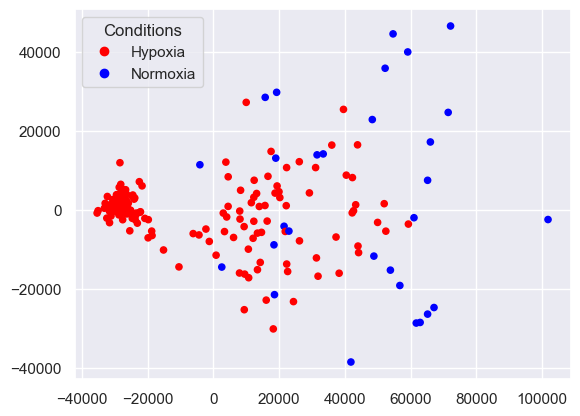

In [207]:
Ultra_DBSCAN(df_MCF_SS_tr, y_MCF_SS_tr, PCA())

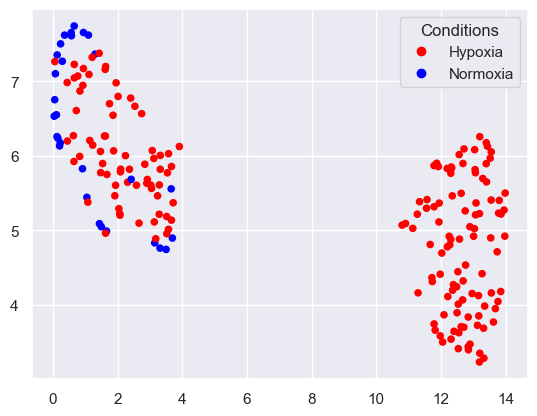

In [208]:
Ultra_DBSCAN(df_MCF_SS_tr, y_MCF_SS_tr, UMAP(random_state=69))

Applying DBSCAN on the MCF dataset gives us much worse results than what we expected, as even clusters which are clearly distinguished in the 2-Dimensional Plot get mixed up by the algorithm.

---
---

## Dimensionality Reduciton DropSeq

#### PCA

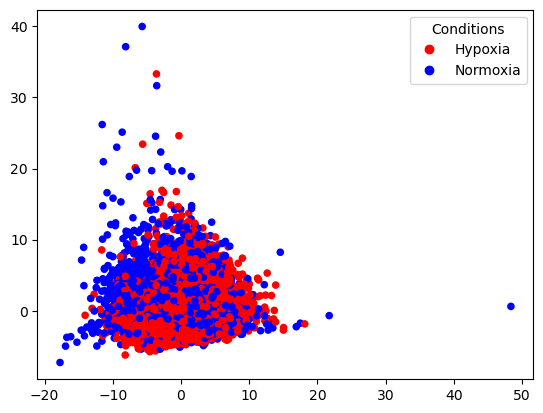

In [ ]:
Plot(df_HCC_DS_tr,y_HCC_DS_tr, PCA())

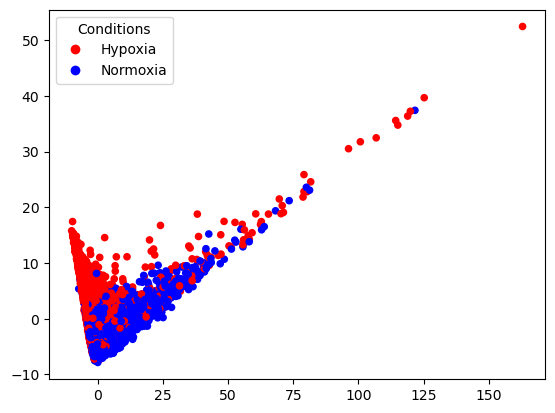

In [ ]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

#### t-SNE

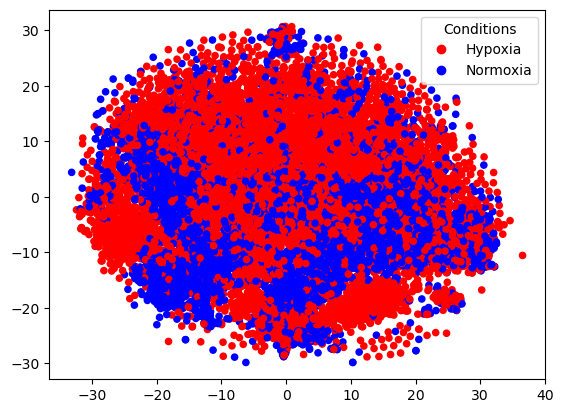

In [ ]:
Plot(df_HCC_DS_tr,y_HCC_DS_tr,TSNE(random_state=69))

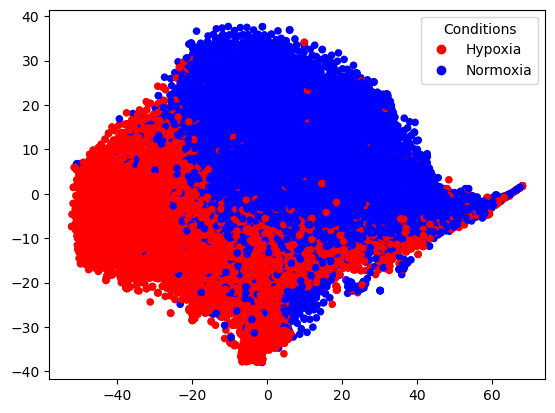

In [ ]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,TSNE(random_state=69))

#### UMAP

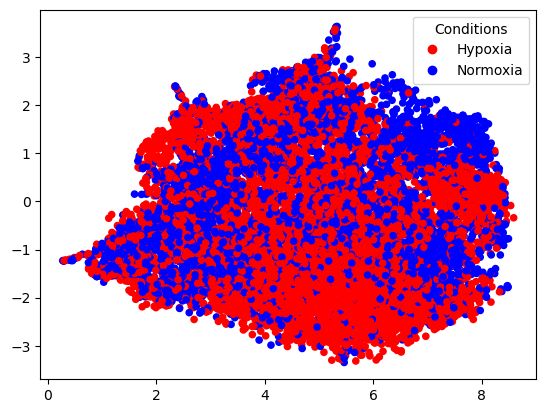

In [ ]:
Plot(df_HCC_DS_tr, y_HCC_DS_tr, UMAP(random_state=69))

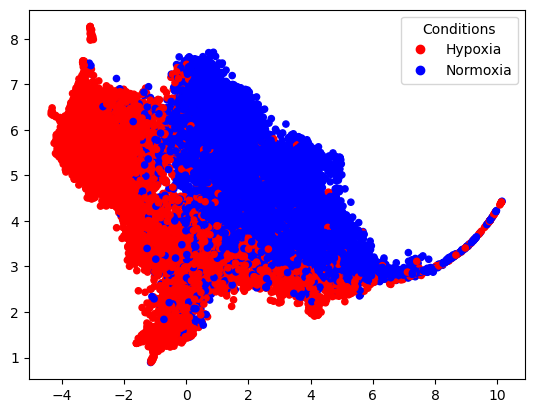

In [ ]:
Plot(df_MCF_DS_tr,y_MCF_DS_tr,UMAP(random_state=69))

Compared to the SmartS datasets, the Dropsec ones give much more confused clusters, with only a good division in the case of MCF for t-SNE and UMAP.

---
---

## Clustering DropSeq

### HCC

#### KMeans on Full Dimensions

12


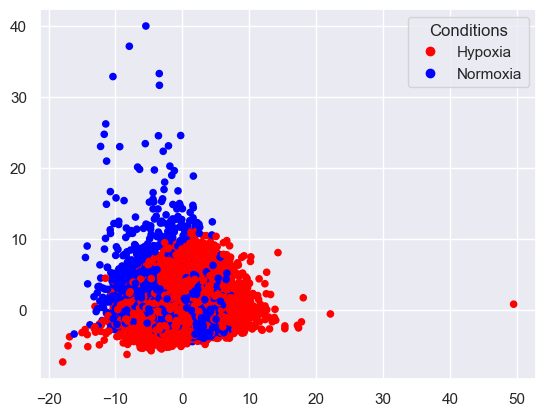

In [32]:
kmpca_hcc = Ultra_KMeans(df_HCC_DS_tr,y_HCC_DS_tr, PCA())

12


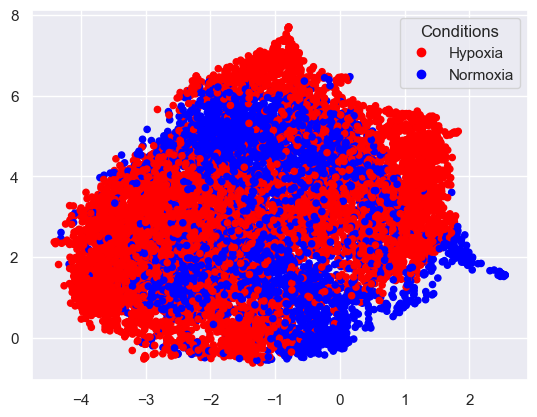

In [33]:
kmumap_hcc = Ultra_KMeans(df_HCC_DS_tr,y_HCC_DS_tr,UMAP(random_state=69))

Similarly to the previous dataset, we tried applying the clustering to the full dataset, and the results obtained in this method are already much better compared to the previous attempt.

---
##### Testing

In [36]:
Test_1(kmpca_hcc,df_HCC_DS_ts,y_HCC_DS_ts)

0.24446714334354783


We decided to test the correctness of our classification to a test dataset, and our classifier got the correct result in around 75% of the given inputs.

#### KMeans on Reduced Dimensions

13


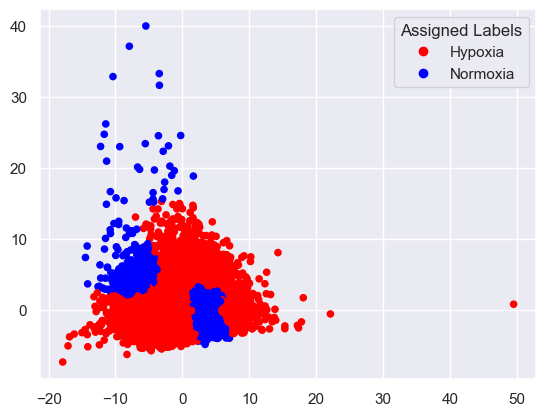

In [37]:
kmrpca = KMR_Clustering(df_HCC_DS_tr,y_HCC_DS_tr,PCA())

17


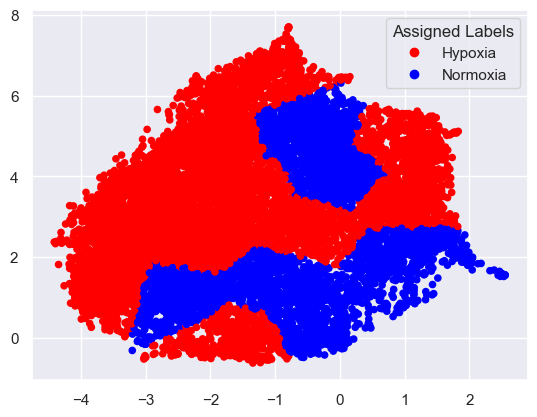

In [38]:
kmrumap = KMR_Clustering(df_HCC_DS_tr,y_HCC_DS_tr,UMAP(random_state=69))

---
##### Test

In [39]:
Test_2(kmrpca, df_HCC_DS_ts, y_HCC_DS_ts)
#13 => 0.63

0.37453183520599254


In [40]:
Test_2(kmrumap, df_HCC_DS_ts, y_HCC_DS_ts)
#15 => 0.65

0.3251617296561117


The results seem much worse compared to the full dimensions clustering, which was confirmed by the tests, which gave accuracies of around 63-65%.

---

### MCF

#### KMeans on Full Dimensions

15


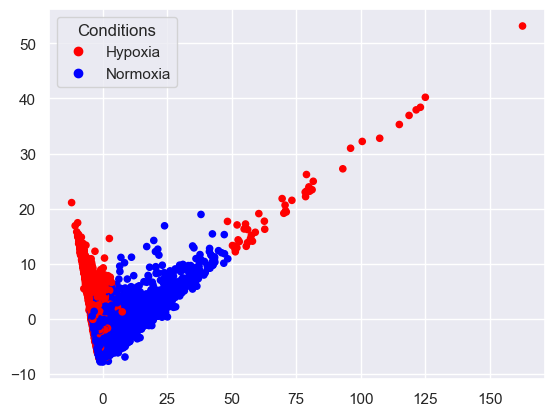

In [41]:
kmpca_mcf = Ultra_KMeans(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

15


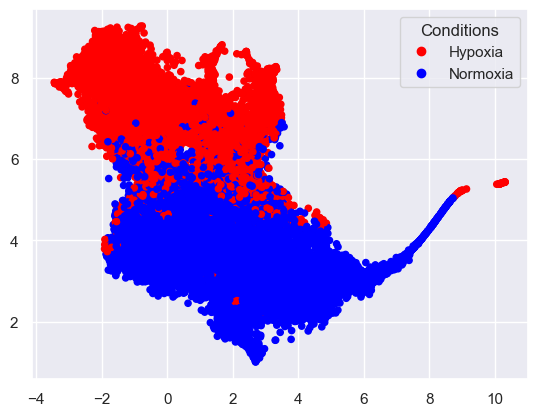

In [46]:
kmumap_mcf = Ultra_KMeans(df_MCF_DS_tr, y_MCF_DS_tr, UMAP(random_state=69))

In [ ]:
Test_1(kmpca_mcf, df_MCF_DS_ts, y_MCF_DS_ts)

0.0850670365233472


As in the case of SmartSec, testing the classifier on the test set gives us correct predictions in 98.2% of the instances, an extremely good result.

#### KMeans on Reduced Dimensions

11


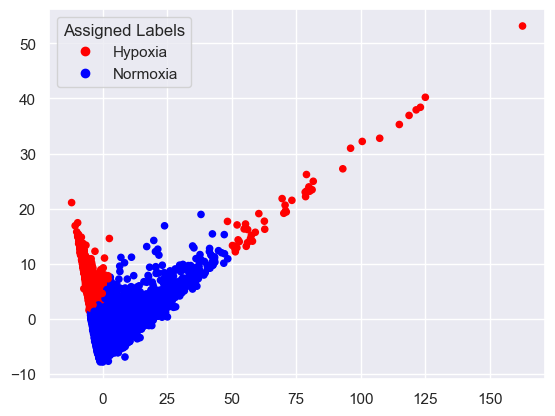

In [42]:
kmrpca_mcf = KMR_Clustering(df_MCF_DS_tr,y_MCF_DS_tr,PCA())

11


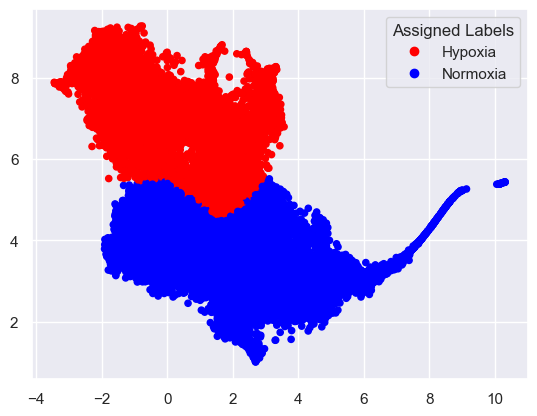

In [43]:
kmrumap_mcf = KMR_Clustering(df_MCF_DS_tr,y_MCF_DS_tr,UMAP(random_state=69))

In [44]:
Test_2(kmrpca_mcf,df_MCF_DS_ts,y_MCF_DS_ts)

0.19325011558021266


In [45]:
Test_2(kmrumap_mcf, df_MCF_DS_ts, y_MCF_DS_ts)

0.12552011095700416


Again, KMeans obtains extremely good results also on the reduced datasets, with classifiers with precision of 80-88% in the two cases of dimensionality reduction applied.

To conclude, clustering gives us some interesting information on the datasets, but it might be more useful to use another model for predictions.

---
---
## Dimensionality Reduction and SVM

### Libraries

In [214]:
#from importnb import imports
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import PowerTransformer, StandardScaler, MaxAbsScaler, QuantileTransformer

import time
import csv

# from ipywidgets import AppLayout, TwoByTwoLayout, IntSlider, FloatSlider
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from IPython.display import clear_output
from sklearn.pipeline import Pipeline
# import ipywidgets as widgets
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

Random State and n_jobs:

In [ ]:
seed = 235
from joblib import parallel_backend
parallel_backend("threading", n_jobs=-1)

---
### Functions

#### `process_raw()`

Creates both a test and a train dataset in `SmartS_data` or `DropSeq_data` respectively, with of shape: (*n_features*, *n_samples*)

In [ ]:
def process_raw(section="SmartS", test_size=0.20, seed=42):

    ignore=""
    name = "_SmartS"
    if section == "DropSeq":
        ignore = "_ignore"
        name = ""

    HCC = pd.read_csv(f"{section}_raw{ignore}/HCC1806{name}_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
    MCF = pd.read_csv(f"{section}_raw{ignore}/MCF7{name}_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)

    HCC_train, HCC_test = train_test_split(HCC.T, test_size=test_size, random_state=seed)
    MCF_train, MCF_test = train_test_split(MCF.T, test_size=test_size, random_state=seed)

    HCC_train.T.to_csv(f"{section}_data/HCC1806_{section}_Filtered_Normalised_3000_Data_train.txt", sep=" ", quoting=csv.QUOTE_NONE)
    HCC_test.T.to_csv(f"{section}_data/HCC1806_{section}_Filtered_Normalised_3000_Data_test.txt", sep=" ", quoting=csv.QUOTE_NONE)
    MCF_train.T.to_csv(f"{section}_data/MCF7_{section}_Filtered_Normalised_3000_Data_train.txt", sep=" ", quoting=csv.QUOTE_NONE)
    MCF_test.T.to_csv(f"{section}_data/MCF7_{section}_Filtered_Normalised_3000_Data_test.txt", sep=" ", quoting=csv.QUOTE_NONE)

#### `data_split()`

Returns Train and Test `pandas.DataFrame` along with `max_dim` and their true labels

In [ ]:
def data_split(file='MCF7',section="SmartS"):
#>> Import, Rename, Cleaning Data (Missing XCells train data)
    def renamer(name, section=section):
        class_position = {"SmartS":-3, "DropSeq":-1}
        classification = name.split("_")[class_position[section]] #change -1 into -3
        cell = name.split("_")[-2]
        if len(classification) > 4:
            classification = classification[:4]
        return classification+"_"+cell

    # Train
    filepath_Train = f"{section}_data/{file}_{section}_Filtered_Normalised_3000_Data_train.txt" # remove "(DropSeq)"
    pd_Train = pd.read_csv(filepath_Train,delimiter=" ",index_col=0).astype('float32')
    pd_Train.rename(mapper=renamer, axis='columns', inplace=True)
    pd_Train.dropna(axis='rows', inplace = True)
    # print(df_Train.shape)
    pd_y_Train = [int(i.split("_")[0]=='Norm') for i in pd_Train.columns]

    # Test
    filepath_Test = f"{section}_data/{file}_{section}_Filtered_Normalised_3000_Data_test.txt" # remove "(DropSeq)"
    pd_Test = pd.read_csv(filepath_Test,delimiter=" ",index_col=0).astype('float32')
    pd_Test.rename(mapper=renamer, axis='columns', inplace=True)
    pd_Test.dropna(axis='rows', inplace = True)
    # print(df_Test.shape)
    pd_y_Test = [int(i.split("_")[0]=='Norm') for i in pd_Test.columns]

    max_dim = min(pd_Train.shape)

    data = {"train":pd_Train, "test":pd_Test, "max dim":max_dim, "y train":pd_y_Train, "y test":pd_y_Test}

    return data

#### ```make_pipe()```

Creates a 3 step Pipeline given a list containing:
-   `scaler`: Method for Preprocessing data or `None`
-   `dim_reduction`: Dimensionality Reduction Method or `None`
-   `clf`: Classifier
Returns the pipeline

In [ ]:
def make_pipe(steps, verbose=0):
    
    name = ["scaler", "dim_reduction", "clf"]
    if steps[-1]==None:
        raise ValueError("A model for SVC is needed")
    if len(steps)!=3:
        raise ValueError("number of steps must be 3")
    
    return Pipeline(steps=[(name[i], steps[i]) for i in range(3)], verbose=max(0,verbose-1))

#### ```clf()```

Runs a pipeline, on `data`, containing the 3 elements in the argument `steps`.\
Returns the fitted pipeline and prints the score on Test if `verbose`&ge;1.

In [ ]:
@ignore_warnings(category=RuntimeWarning)
def clf(data, steps=None, verbose=True, seed=42):
#>> Extracting data
    X_train = data["train"]
    X_test = data["test"]
    y_train = data["y train"]
    y_test = data["y test"]

#>> Pipeline
    pipeline = Pipeline(steps=[
                ("scaler", StandardScaler()), 
                ("dim_reduction", PCA(n_components=30, random_state=seed)),
                ("svc", LinearSVC(random_state=seed)),
                 ],
                 verbose=verbose)
    
    if steps != None:
        pipeline = make_pipe(steps, verbose=verbose)

    pipeline.fit(X_train.T, y_train)

    if verbose:
        print(f"{pipeline.score(X_test.T,y_test):.4f}")

    return pipeline

#### ```CVsearch()```

Performs Gridsearch and Cross validation to find the best parameters.\
Returns a DataFrame with informations of each iteration

In [ ]:
@ignore_warnings(category=(RuntimeWarning, ConvergenceWarning))
def CVsearch(data, steps, cv_inner, param_grid=None, verbose=1):
#>> Extracting data
    X_train = data["train"]
    X_test = data["test"]
    y_train = data["y train"]
    y_test = data["y test"]
    max_dim = data["max dim"]

#>> Pipeline
    pipe = make_pipe(steps)

#>> Search and CV
    dim=(max_dim//cv_inner)*(cv_inner-1)

    if param_grid==None:
        param_grid ={
                    "dim_reduction__n_components": [dim for dim in range(100, dim, 100)],
                    "clf__C": [0.001, 0.01, 0.1, 1],
                } 
    
    clf = GridSearchCV(pipe, param_grid, cv=cv_inner, verbose=verbose-2, refit=True)
    clf.fit(X_train.T, y_train)

#>> Output
    table = pd.DataFrame(clf.cv_results_)
    i = clf.best_index_
    best = table[i:i+1]
    cv_results = pd.concat((best.set_index('rank_test_score'),table.drop(index=i).set_index('rank_test_score').sort_index()))

    if verbose:
        print(f"best parameters: {clf.best_params_}")
        print(f"best score: {clf.best_score_:.3f}")
        print(f"prediction score: {clf.score(X_test.T, y_test):.3f}")
        print(f"F1 score: {f1_score(y_test, clf.predict(X_test.T)):.3f}")
        if verbose-1:
            display(cv_results.head(4))

    return clf, cv_results


In [ ]:
# with imports("ipynb"):
#     import data
#     import classifier

---
### Data Processing

Splitting Raw data into Labelled Test and Train dataset using `process_raw()`

In [ ]:
# data.process_raw(section="SmartS", seed=seed)
# data.process_raw(section="DropSeq", seed=seed)

Select which `file=["MCF7","HCC1806"]` and `section=["SmartS","DropSeq"]` we want to consider

In [ ]:
file = "MCF7"
section = "SmartS"

Saves the datasets into `pandas.DataFrame` along with their true labels

In [ ]:
dataset = data_split(file=file, section=section)
X_train = dataset["train"]
X_test = dataset["test"]
y_train = dataset["y train"]
y_test = dataset["y test"]
max_dim = dataset["max dim"]

---
### Classifier

We use `clf()` to performs a first Pipeline containing `scaler`, `reduction` and `svc` 
( accepts `scaler`=`None`, `reduction`=`None` )

In [ ]:
steps = [None, PCA(n_components=30, random_state=seed), LinearSVC(random_state=seed)]

clf(dataset, steps=steps, seed=seed)

1.0000


Pipeline(steps=[('scaler', None),
                ('dim_reduction', PCA(n_components=30, random_state=235)),
                ('clf', LinearSVC(random_state=235))],
         verbose=0)

---
### Tuning

We tune the Hyperparameters in `param_grid` by running a Gridsearch with Cross Validation using `CVsearch()`.

#### SmartS

For MCF in SmartS it is easy to obtain perfect scores by simply taking a linear kernel, even if sigmoid works just as well.\
We keep C=1 since decreasing it too much would negatively affect the performance.

In [ ]:
dataset = data_split(file="MCF7", section="SmartS")
max_dim = dataset["max dim"]

steps=[StandardScaler(),PCA(random_state=seed),SVC(random_state=seed)]
fold = 10
dim=(max_dim//fold)*(fold-1)
param_grid ={
            "dim_reduction__n_components": [i for i in range(2,11)],
            "clf__C": [1,2,3],
            "clf__kernel": ["linear"]
        }
print("> MCF | SmartS:")
clf_A, table_A = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> MCF | SmartS:
best parameters: {'clf__C': 1, 'clf__kernel': 'linear', 'dim_reduction__n_components': 3}
best score: 1.000
prediction score: 1.000
F1 score: 1.000


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     1.120606      0.212078         0.240439        0.109362   
1                     1.386165      0.074486         0.178743        0.033641   
1                     1.354344      0.129831         0.249717        0.035366   
1                     1.432917      0.093413         0.184086        0.069025   

                param_clf__C param_clf__kernel  \
rank_test_score                                  
1                          1            linear   
1                          2            linear   
1                          3            linear   
1                          3            linear   

                param_dim_reduction__n_components  \
rank_test_score                                     
1                                               3   
1                                               6   
1                                               6   
1                                               4   

                                                            params  \
rank_test_score                                                      
1                {'clf__C': 1, 'clf__kernel': 'linear', 'dim_re...   
1                {'clf__C': 2, 'clf__kernel': 'linear', 'dim_re...   
1                {'clf__C': 3, 'clf__kernel': 'linear', 'dim_re...   
1                {'clf__C': 3, 'clf__kernel': 'linear', 'dim_re...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   

                 split3_test_score  split4_test_score  split5_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   

                 split6_test_score  split7_test_score  split8_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   

                 split9_test_score  mean_test_score  std_test_score  
rank_test_score                                                      
1                              1.0              1.0             0.0  
1                              1.0              1.0             0.0  
1                              1.0              1.0             0.0  
1                              1.0              1.0             0.0

For HCC, a more throughout search is needed:

In [ ]:
dataset = data_split(file="HCC1806", section="SmartS")
max_dim = dataset["max dim"]

steps=[MaxAbsScaler(),KernelPCA(random_state=seed),SVC(random_state=seed)]
fold = 10
dim=(max_dim//fold)*(fold-1)
param_grid ={
            "dim_reduction__n_components": [i for i in range(73,80)],
            "dim_reduction__kernel": ["sigmoid", "cosine", "rbf", "linear", "poly"],
            "dim_reduction__coef0": [1],
            "clf__coef0": [0.17, 0.18],
            "clf__C": [0.1,1,2,3],
            "clf__kernel": ["sigmoid", "rbf", "linear", "poly"]
        }
print("> HCC | SmartS:")
clf_B, table_B = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> HCC | SmartS:
best parameters: {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel': 'sigmoid', 'dim_reduction__coef0': 1, 'dim_reduction__kernel': 'cosine', 'dim_reduction__n_components': 79}
best score: 0.986
prediction score: 0.973
F1 score: 0.971


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     2.404250      0.417612         1.141176        0.306751   
2                     2.314444      0.375531         1.206220        0.283099   
2                     2.315923      0.382806         1.136377        0.317503   
2                     2.375897      0.304973         1.209875        0.239515   

                param_clf__C param_clf__coef0 param_clf__kernel  \
rank_test_score                                                   
1                          1             0.18           sigmoid   
2                          1             0.18           sigmoid   
2                          2             0.18            linear   
2                          2             0.18            linear   

                param_dim_reduction__coef0 param_dim_reduction__kernel  \
rank_test_score                                                          
1                                        1                      cosine   
2                                        1                      cosine   
2                                        1                      linear   
2                                        1                      linear   

                param_dim_reduction__n_components  ... split2_test_score  \
rank_test_score                                    ...                     
1                                              79  ...               1.0   
2                                              76  ...               1.0   
2                                              76  ...               1.0   
2                                              75  ...               1.0   

                 split3_test_score  split4_test_score  split5_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
2                              1.0                1.0                1.0   
2                              1.0                1.0                1.0   
2                              1.0                1.0                1.0   

                 split6_test_score  split7_test_score  split8_test_score  \
rank_test_score                                                            
1                         0.928571                1.0                1.0   
2                         0.928571                1.0                1.0   
2                         0.928571                1.0                1.0   
2                         0.928571                1.0                1.0   

                 split9_test_score  mean_test_score  std_test_score  
rank_test_score                                                      
1                              1.0         0.986190        0.027640  
2                              1.0         0.979524        0.031302  
2                              1.0         0.979524        0.031302  
2                              1.0         0.979524        0.031302  

[4 rows x 23 columns]

In [ ]:
display(table_B.head(10))

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     2.404250      0.417612         1.141176        0.306751   
2                     2.314444      0.375531         1.206220        0.283099   
2                     2.315923      0.382806         1.136377        0.317503   
2                     2.375897      0.304973         1.209875        0.239515   
2                     2.485885      0.285953         1.084605        0.289934   
2                     2.470130      0.409435         1.068174        0.321673   
2                     2.247811      0.271345         1.132223        0.266879   
2                     2.498100      0.498300         1.168026        0.232881   
2                     2.257990      0.305141         1.001870        0.233771   
2                     2.401966      0.329213         1.194990        0.197488   

                param_clf__C param_clf__coef0 param_clf__kernel  \
rank_test_score                                                   
1                          1             0.18           sigmoid   
2                          1             0.18           sigmoid   
2                          2             0.18            linear   
2                          2             0.18            linear   
2                          2             0.18            linear   
2                          2             0.18            linear   
2                          2             0.18            linear   
2                          2             0.17            linear   
2                          2             0.18            linear   
2                          2             0.17            linear   

                param_dim_reduction__coef0 param_dim_reduction__kernel  \
rank_test_score                                                          
1                                        1                      cosine   
2                                        1                      cosine   
2                                        1                      linear   
2                                        1                      linear   
2                                        1                      linear   
2                                        1                      cosine   
2                                        1                      cosine   
2                                        1                      linear   
2                                        1                      cosine   
2                                        1                      linear   

                param_dim_reduction__n_components  ... split2_test_score  \
rank_test_score                                    ...                     
1                                              79  ...               1.0   
2                                              76  ...               1.0   
2                                              76  ...               1.0   
2                                              75  ...               1.0   
2                                              74  ...               1.0   
2                                              79  ...               1.0   
2                                              78  ...               1.0   
2                                              76  ...               1.0   
2                                              77  ...               1.0   
2                                              75  ...               1.0   

                 split3_test_score  split4_test_score  split5_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
2                              1.0                1.0                1.0   
2                              1.0                1.0                1.0   
2                              1.0                1.0    

In [ ]:
param_grid ={
            "dim_reduction__n_components": [i for i in range(5,dim, 10)],
            "dim_reduction__kernel": ["cosine"],
            # "dim_reduction__coef0": [0.5,1,2],
            "clf__coef0": [0.18,0.5,1],
            "clf__C": [0.1,1,2],
            "clf__kernel": ["sigmoid"]
        }
print("> HCC | SmartS:")
clf_X, table_X = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> HCC | SmartS:
best parameters: {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel': 'sigmoid', 'dim_reduction__coef0': 0.5, 'dim_reduction__kernel': 'cosine', 'dim_reduction__n_components': 125}
best score: 0.986
prediction score: 1.000
F1 score: 1.000


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     0.963536      0.119878         0.586501        0.194160   
1                     1.006933      0.120066         0.605266        0.098909   
1                     0.960026      0.132393         0.581392        0.129409   
4                     1.015137      0.133481         0.512658        0.096383   

                param_clf__C param_clf__coef0 param_clf__kernel  \
rank_test_score                                                   
1                          1             0.18           sigmoid   
1                          1             0.18           sigmoid   
1                          1             0.18           sigmoid   
4                          2              0.5           sigmoid   

                param_dim_reduction__coef0 param_dim_reduction__kernel  \
rank_test_score                                                          
1                                      0.5                      cosine   
1                                        2                      cosine   
1                                        1                      cosine   
4                                        2                      cosine   

                param_dim_reduction__n_components  ... split2_test_score  \
rank_test_score                                    ...                     
1                                             125  ...               1.0   
1                                             125  ...               1.0   
1                                             125  ...               1.0   
4                                              75  ...               1.0   

                 split3_test_score  split4_test_score  split5_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
4                              1.0                1.0                1.0   

                 split6_test_score  split7_test_score  split8_test_score  \
rank_test_score                                                            
1                         0.928571                1.0                1.0   
1                         0.928571                1.0                1.0   
1                         0.928571                1.0                1.0   
4                         0.928571                1.0                1.0   

                 split9_test_score  mean_test_score  std_test_score  
rank_test_score                                                      
1                              1.0         0.986190        0.027640  
1                              1.0         0.986190        0.027640  
1                              1.0         0.986190        0.027640  
4                              1.0         0.979524        0.031302  

[4 rows x 23 columns]

In [ ]:
param_grid ={
            "dim_reduction__n_components": [i for i in range(120, dim+1)],
            "dim_reduction__kernel": ["cosine"],
            "dim_reduction__coef0": [1],
            "clf__coef0": [0.18],
            "clf__C": [0.5,1,2],
            "clf__kernel": ["sigmoid"]
        }
print("> HCC | SmartS:")
clf_X, table_X = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> HCC | SmartS:
best parameters: {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel': 'sigmoid', 'dim_reduction__coef0': 1, 'dim_reduction__kernel': 'cosine', 'dim_reduction__n_components': 125}
best score: 0.986
prediction score: 1.000
F1 score: 1.000


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     1.250011      0.099463         0.601241        0.179735   
1                     1.200794      0.166884         0.690499        0.158181   
3                     1.456683      0.219284         0.688588        0.129679   
3                     1.304959      0.232150         0.539916        0.169218   

                param_clf__C param_clf__coef0 param_clf__kernel  \
rank_test_score                                                   
1                          1             0.18           sigmoid   
1                          1             0.18           sigmoid   
3                          1             0.18           sigmoid   
3                          1             0.18           sigmoid   

                param_dim_reduction__coef0 param_dim_reduction__kernel  \
rank_test_score                                                          
1                                        1                      cosine   
1                                        1                      cosine   
3                                        1                      cosine   
3                                        1                      cosine   

                param_dim_reduction__n_components  ... split2_test_score  \
rank_test_score                                    ...                     
1                                             125  ...               1.0   
1                                             126  ...               1.0   
3                                             122  ...               1.0   
3                                             120  ...               1.0   

                 split3_test_score  split4_test_score  split5_test_score  \
rank_test_score                                                            
1                              1.0                1.0                1.0   
1                              1.0                1.0                1.0   
3                              1.0                1.0                1.0   
3                              1.0                1.0                1.0   

                 split6_test_score  split7_test_score  split8_test_score  \
rank_test_score                                                            
1                         0.928571                1.0                1.0   
1                         0.928571                1.0                1.0   
3                         0.928571                1.0                1.0   
3                         0.928571                1.0                1.0   

                 split9_test_score  mean_test_score  std_test_score  
rank_test_score                                                      
1                         1.000000         0.986190        0.027640  
1                         1.000000         0.986190        0.027640  
3                         0.928571         0.979048        0.032029  
3                         0.928571         0.979048        0.032029  

[4 rows x 23 columns]

Despite we cannot reach a score of 1 with the validation, the classifier generalise perfectly on unseen data.

#### DropSeq

Due to the size and time required to run the following Tuning, we don't show the full ranges of parameters that have been searched.\
However combinations of the following have been tested over mutliple days and with different trials:
-   "scaler" : [None, StandardScaler(), MaxAbsScaler()]
-   "dimensionality reduciton" : [PCA(), KernelPCA(), UMAP()]
-   "svc" : [SVC(), LinearSVC()]
-   "dim_reduction__n_components" : [100, 200, ..., 700, 800]
-   "dim_reduction__kernel" : ["cosine", "sigmoid", "linear", "rbf", "poly"]
-   "dim_reduction__degree" : [2, 3, 4]
-   "clf__C ": [0.1, 1, 2, 5]
-   "clf__kernel" : ["rbf", "sigmoid", "linear", "rbf", "poly"]
-   "clf__degree" : [2, 3, 4]

MCF just like in SmartS performs better and with many more combinations of hyperparameters.

In [ ]:
dataset = data_split(file="MCF7", section="DropSeq")
max_dim = dataset["max dim"]

steps=[MaxAbsScaler(),KernelPCA(random_state=seed),SVC(random_state=seed)]
fold = 10
dim=(max_dim//fold)*(fold-1)
param_grid ={
            "dim_reduction__n_components": [700],
            "dim_reduction__kernel": ["cosine"],
            "clf__C": [2],
            "clf__kernel": ["rbf"]
        }
print("> MCF | DropSeq:")
clf_C, table_C = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> MCF | DropSeq:
best parameters: {'clf__C': 2, 'clf__kernel': 'rbf', 'dim_reduction__kernel': 'cosine', 'dim_reduction__n_components': 700}
best score: 0.979
prediction score: 0.983
F1 score: 0.986


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                  2194.926734      8.222752        20.195446        3.984447   

                param_clf__C param_clf__kernel param_dim_reduction__kernel  \
rank_test_score                                                              
1                          2               rbf                      cosine   

                param_dim_reduction__n_components  \
rank_test_score                                     
1                                             700   

                                                            params  \
rank_test_score                                                      
1                {'clf__C': 2, 'clf__kernel': 'rbf', 'dim_reduc...   

                 split0_test_score  ...  split2_test_score  split3_test_score  \
rank_test_score                     ...                                         
1                         0.972254  ...           0.982081           0.978035   

                 split4_test_score  split5_test_score  split6_test_score  \
rank_test_score                                                            
1                         0.982081           0.976879           0.983237   

                 split7_test_score  split8_test_score  split9_test_score  \
rank_test_score                                                            
1                         0.984393           0.974566           0.976301   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       0.979191        0.003912  

[1 rows x 21 columns]

HCC on the other hand required a longer search as there is a restricted number of combination of hyperparameters giving high scores

In [ ]:
dataset = data_split(file="HCC1806", section="DropSeq")
max_dim = dataset["max dim"]

steps=[MaxAbsScaler(),KernelPCA(random_state=seed),SVC(random_state=seed)]
fold = 10
dim=(max_dim//fold)*(fold-1)
param_grid ={
            "dim_reduction__n_components": [510],
            "dim_reduction__kernel": ["sigmoid"],
            "clf__C": [2],
            "clf__kernel": ["rbf"]
        }
print("> HCC | DropSeq:")
clf_D, table_D = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

> HCC | DropSeq:
best parameters: {'clf__C': 2, 'clf__kernel': 'rbf', 'dim_reduction__kernel': 'sigmoid', 'dim_reduction__n_components': 510}
best score: 0.959
prediction score: 0.966
F1 score: 0.956


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                   609.191376      2.760273        13.729789        5.683921   

                param_clf__C param_clf__kernel param_dim_reduction__kernel  \
rank_test_score                                                              
1                          2               rbf                     sigmoid   

                param_dim_reduction__n_components  \
rank_test_score                                     
1                                             510   

                                                            params  \
rank_test_score                                                      
1                {'clf__C': 2, 'clf__kernel': 'rbf', 'dim_reduc...   

                 split0_test_score  ...  split2_test_score  split3_test_score  \
rank_test_score                     ...                                         
1                         0.954043  ...           0.954894               0.96   

                 split4_test_score  split5_test_score  split6_test_score  \
rank_test_score                                                            
1                          0.95234           0.965928           0.963373   

                 split7_test_score  split8_test_score  split9_test_score  \
rank_test_score                                                            
1                         0.967632           0.949744           0.954855   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       0.958707        0.005984  

[1 rows x 21 columns]

The case above clearly performs better than the one below, hence we would chose the former as classifier.

In [ ]:
dataset = data_split(file="HCC1806", section="DropSeq")
max_dim = dataset["max dim"]

steps=[MaxAbsScaler(),KernelPCA(random_state=seed),SVC(random_state=seed)]
fold = 4
dim=(max_dim//fold)*(fold-1)
print(dim)
param_grid ={
            "dim_reduction__n_components": [100, dim, 100],
            "dim_reduction__kernel": ["cosine"],
            "clf__coef0": [0.18],
            "clf__C": [1],
            "clf__kernel": ["sigmoid"]
        }
print("> HCC | DropSeq:")
clf_C, table_C = CVsearch(dataset, steps, cv_inner=fold, param_grid=param_grid, verbose=2)

2250
> HCC | DropSeq:
best parameters: {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel': 'sigmoid', 'dim_reduction__kernel': 'cosine', 'dim_reduction__n_components': 2250}
best score: 0.949
prediction score: 0.951
F1 score: 0.937


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                   555.058040     45.048807       169.563334       78.304528   
2                   423.513968    108.693180       264.244712       12.449766   
2                   485.105706      0.794678       207.858453       76.558243   

                param_clf__C param_clf__coef0 param_clf__kernel  \
rank_test_score                                                   
1                          1             0.18           sigmoid   
2                          1             0.18           sigmoid   
2                          1             0.18           sigmoid   

                param_dim_reduction__kernel param_dim_reduction__n_components  \
rank_test_score                                                                 
1                                    cosine                              2250   
2                                    cosine                               100   
2                                    cosine                               100   

                                                            params  \
rank_test_score                                                      
1                {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel...   
2                {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel...   
2                {'clf__C': 1, 'clf__coef0': 0.18, 'clf__kernel...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                         0.947225           0.948229           0.955381   
2                         0.873681           0.883174           0.892371   
2                         0.873681           0.883174           0.892371   

                 split3_test_score  mean_test_score  std_test_score  
rank_test_score                                                      
1                         0.945845         0.949170        0.003685  
2                         0.882834         0.883015        0.006609  
2                         0.882834         0.883015        0.006609

---
---
## Neural Networks

In [290]:
#More imports
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

pd.set_option("display.max_columns", None)

### Neural Network Hyperparameter tuning

In this section, we will implement neural networks and we try to find the optimal hyperparameters for our datasets. We will use the keras library to implement our neural networks and the bayesian optimisation library to optimise the hyperparameters and layers.

### DropSeq

#### HCC

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

##### Tuning the Hyperparameters

The first hyperparameter to optimize is the number of neurons in each hidden layer. In this case, the number of neurons in each layer is set equal. The number of neurons should be adjusted according to the complexity of the solution. Tasks involving more complex prediction layers will require more neurons. 

The activation function is a parameter for each layer. Input data is fed to the input layer, then to the hidden layers, and finally to the output layer. The output layer contains the output values. An input value that changes from one level to another always changes according to the activation function. The activation function determines how the level's input values ​​are transformed into output values. Output values ​​of one level are passed as input values ​​to the next level. Then the values ​​are recomputed at the next level to produce another level of output values. Here, we have nine activation functions. Each activation function has its formula (and graph) for calculating input values. 

Neural network layers are compiled and assigned to the optimizer. The optimizer is responsible for changing the learning rate and weights of neurons in the neural network to achieve minimal loss performance. Optimizers are very important to achieve the highest possible accuracy or lowest possible loss. You can choose from seven optimizers. Everyone has different concepts. 

One of the optimizer hyperparameters is the learning rate. The learning rate controls the step size required before the model works with minimal loss. The higher the learning rate, the faster the model learns, but it may miss the minimum loss function and reach only its neighbors. The lower the learning rate, the more likely it is to find a function with minimal loss. On the other hand, a lower learning rate requires higher epochs or more resources of time and memory capacity. 

Batch size is the number of training data sub-samples for the input. The smaller batch size makes the learning process faster, but the variance of the validation dataset accuracy is higher. A bigger batch size has a slower learning process, but the validation dataset accuracy has a lower variance.

The number of times a whole dataset is passed through the neural network model is called an epoch. One epoch means that the training dataset is passed forward and backward through the neural network once. A too-small number of epochs results in underfitting because the neural network has not learned much enough. The training dataset needs to pass multiple times or multiple epochs are required. On the other hand, too many epochs will lead to overfitting where the model can predict the data very well, but cannot predict new unseen data well enough. The number of epoch must be tuned to gain the optimal result.

##### Tuning the Layers

Layers in Neural Networks also determine the result of the prediction model. A smaller number of layers is enough for a simpler problem, but a larger number of layers is needed to build a model for a more complicated problem.

Inserting regularization layers in a neural network can help prevent overfitting. This demonstration tries to tune whether to add regularization layers or not. There are two regularization layers to use here.

Batch normalization is placed after the first hidden layers. The batch normalization layer normalizes the values passed to it for every batch. This is similar to the standard scaler in conventional Machine Learning.

Another regularization layer is the Dropout layer. The dropout layer, as its name suggests, randomly drops a certain number of neurons in a layer. The dropped neurons are not used anymore. The rate of how much percentage of neurons drop is set in the dropout rate.

The following is the code to tune the hyperparameters and layers.

In [ ]:
# Create function
def nn_cl_bo2_HCC_drop(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=3000, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, df_HCC_DS_tr, y_HCC_DS_tr, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score


In [ ]:
params_nn2 ={
    'neurons': (3000, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
try:
    nn_bo_HCC_drop_layers = BayesianOptimization(nn_cl_bo2_HCC_drop, params_nn2, random_state=111)
except ValueError:
    nn_bo_HCC_drop_layers = BayesianOptimization(nn_cl_bo2_HCC_drop, params_nn2, random_state=111)
    
nn_bo_HCC_drop_layers.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
74/74 [==============================] - 2s 24ms/step
| 1         | 0.6051    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 2.308e+03 | 0.3377    | 6.935     |
74/74 [==============================] - 0s 4ms/step
| 2         | 0.5826    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 387.8     | 0.794     | 5.884     |
74/74 [==============================] - 0s 5ms/step
| 3         | 0.6051    | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 630.1     | 0.6977    | 3.957     |
74/74 [==============================] - 2s 26ms/s

ValueError: LBFGSB - one of the lower bounds is greater than an upper bound.

In [ ]:
#| 6         | 0.9594    | 0.3436    | 242.5     | 0.128     | 0.01001   | 38.11     | 2.088     | 1.357     | 0.1876    | 2.566e+03 | 0.683     | 3.283     |
#|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |

#params_nn_HCC_drop_layers = nn_bo_HCC_drop_layers.max['params']

params_nn_HCC_drop_layers = {
    'activation': 0.3436,
    'batch_size': 242,
    'dropout': 0.1279608146375314,
    'dropout_rate': 0.010014947837176436,
    'epochs': 38,
    'layers1': 2,
    'layers2': 1,
    'learning_rate': 0.18755133602737314,
    'neurons': 2566,
    'normalization': 0.6830131255680931,
    'optimizer': 3.283
}

learning_rate = params_nn_HCC_drop_layers['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_HCC_drop_layers['activation'] = activationL[round(params_nn_HCC_drop_layers['activation'])]

params_nn_HCC_drop_layers['batch_size'] = round(params_nn_HCC_drop_layers['batch_size'])
params_nn_HCC_drop_layers['epochs'] = round(params_nn_HCC_drop_layers['epochs'])
params_nn_HCC_drop_layers['layers1'] = round(params_nn_HCC_drop_layers['layers1'])
params_nn_HCC_drop_layers['layers2'] = round(params_nn_HCC_drop_layers['layers2'])
params_nn_HCC_drop_layers['neurons'] = round(params_nn_HCC_drop_layers['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_HCC_drop_layers['optimizer'] = optimizerD[optimizerL[round(params_nn_HCC_drop_layers['optimizer'])]]

params_nn_HCC_drop_layers

{'activation': 'relu',
 'batch_size': 242,
 'dropout': 0.1279608146375314,
 'dropout_rate': 0.010014947837176436,
 'epochs': 38,
 'layers1': 2,
 'layers2': 1,
 'learning_rate': 0.18755133602737314,
 'neurons': 2566,
 'normalization': 0.6830131255680931,
 'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x1dca63feda0>}

We test our neural network on the validation set, now with our optimized hyperparameters and layers. We fit the model to the training set and then make our predictions on the test set.

In [ ]:
def nn_cl_fun_HCC_drop_layers():
    nn = Sequential()
    nn.add(Dense(params_nn_HCC_drop_layers['neurons'], input_dim=3000, activation=params_nn_HCC_drop_layers['activation']))
    if params_nn_HCC_drop_layers['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_HCC_drop_layers['layers1']):
        nn.add(Dense(params_nn_HCC_drop_layers['neurons'], activation=params_nn_HCC_drop_layers['activation']))
    if params_nn_HCC_drop_layers['dropout'] > 0.5:
        nn.add(Dropout(params_nn_HCC_drop_layers['dropout_rate'], seed=123))
    for i in range(params_nn_HCC_drop_layers['layers2']):
        nn.add(Dense(params_nn_HCC_drop_layers['neurons'], activation=params_nn_HCC_drop_layers['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_HCC_drop_layers['optimizer'], metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun_HCC_drop_layers, epochs=params_nn_HCC_drop_layers['epochs'], batch_size=params_nn_HCC_drop_layers['batch_size'],
                         verbose=0)
 
nn.fit(df_HCC_DS_tr, y_HCC_DS_tr, verbose=1)

Epoch 1/38
49/49 [==============================] - 18s 343ms/step - loss: 0.3143 - accuracy: 0.8698
Epoch 2/38
49/49 [==============================] - 17s 343ms/step - loss: 0.0707 - accuracy: 0.9765
Epoch 3/38
49/49 [==============================] - 16s 330ms/step - loss: 0.0223 - accuracy: 0.9955
Epoch 4/38
49/49 [==============================] - 16s 326ms/step - loss: 0.0068 - accuracy: 0.9992
Epoch 5/38
49/49 [==============================] - 16s 329ms/step - loss: 0.0032 - accuracy: 0.9999
Epoch 6/38
49/49 [==============================] - 16s 327ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/38
49/49 [==============================] - 16s 332ms/step - loss: 8.1958e-04 - accuracy: 1.0000
Epoch 8/38
49/49 [==============================] - 16s 319ms/step - loss: 5.2013e-04 - accuracy: 1.0000
Epoch 9/38
49/49 [==============================] - 16s 327ms/step - loss: 4.7963e-04 - accuracy: 1.0000
Epoch 10/38
49/49 [==============================] - 16s 328ms/step - loss: 3.4

In [ ]:
accuracy = accuracy_score(y_HCC_DS_ts, nn.predict(df_HCC_DS_ts))

print(accuracy)

92/92 [==============================] - 4s 39ms/step
0.9560626702997275


The neural network gives us an average of 95.61% accuracy on the test set. This concludes our neural network optimization part on DropSeq HCC. We shall now move on to DropSeq MCF. We shall implement the same procedure on all the other datasets.

---

#### MCF

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
# Create function
def nn_cl_bo2_MCF_drop(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=3000, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, df_MCF_DS_tr, y_MCF_DS_tr, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score


In [ ]:
params_nn2 ={
    'neurons': (3000, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
try:
    nn_bo_MCF_drop_layers = BayesianOptimization(nn_cl_bo2_MCF_drop, params_nn2, random_state=111)
except ValueError:
    nn_bo_MCF_drop_layers = BayesianOptimization(nn_cl_bo2_MCF_drop, params_nn2, random_state=111)
nn_bo_MCF_drop_layers.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
109/109 [==============================] - 6s 54ms/step
| 1         | 0.5841    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 2.308e+03 | 0.3377    | 6.935     |
109/109 [==============================] - 2s 17ms/step
| 2         | 0.5921    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 387.8     | 0.794     | 5.884     |
109/109 [==============================] - 3s 22ms/step
| 3         | 0.4159    | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 630.1     | 0.6977    | 3.957     |
109/109 [==============================] -

ValueError: Input y contains NaN.

In [ ]:
#params_nn_MCF_drop_layers = nn_bo_MCF_drop_layers.max['params']

#some error happened while running (it's not choosing iteration with max score), on inspection 6th iteration gave maximum score

#| 6         | 0.9821    | 0.3436    | 242.5     | 0.128     | 0.01001   | 38.11     | 2.088     | 1.357     | 0.1876    | 2.566e+03 | 0.683     | 3.283     |
#|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |

params_nn_MCF_drop_layers = {
    'activation': 0.3436, 
    'batch_size':242.5, 
    'dropout': 0.128, 
    'dropout_rate': 0.01001, 
    'epochs': 38.11, 
    'layers1':2.088, 
    'layers2':1.357, 
    'learning_rate':0.1876, 
    'neurons':2566, 
    'normalization': 0.683, 
    'optimizer':3.283
}
  
learning_rate = params_nn_MCF_drop_layers['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_MCF_drop_layers['activation'] = activationL[round(params_nn_MCF_drop_layers['activation'])]

params_nn_MCF_drop_layers['batch_size'] = round(params_nn_MCF_drop_layers['batch_size'])
params_nn_MCF_drop_layers['epochs'] = round(params_nn_MCF_drop_layers['epochs'])
params_nn_MCF_drop_layers['layers1'] = round(params_nn_MCF_drop_layers['layers1'])
params_nn_MCF_drop_layers['layers2'] = round(params_nn_MCF_drop_layers['layers2'])
params_nn_MCF_drop_layers['neurons'] = round(params_nn_MCF_drop_layers['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_MCF_drop_layers['optimizer'] = optimizerD[optimizerL[round(params_nn_MCF_drop_layers['optimizer'])]]

params_nn_MCF_drop_layers

{'activation': 'relu',
 'batch_size': 242,
 'dropout': 0.128,
 'dropout_rate': 0.01001,
 'epochs': 38,
 'layers1': 2,
 'layers2': 1,
 'learning_rate': 0.1876,
 'neurons': 2566,
 'normalization': 0.683,
 'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x1dcbb8e9240>}

As we did for HCC, we fit the model to the training set and then make our predictions on the test set.

In [ ]:
def nn_cl_fun_MCF_drop_layers():
    nn = Sequential()
    nn.add(Dense(params_nn_MCF_drop_layers['neurons'], input_dim=3000, activation=params_nn_MCF_drop_layers['activation']))
    if params_nn_MCF_drop_layers['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_MCF_drop_layers['layers1']):
        nn.add(Dense(params_nn_MCF_drop_layers['neurons'], activation=params_nn_MCF_drop_layers['activation']))
    if params_nn_MCF_drop_layers['dropout'] > 0.5:
        nn.add(Dropout(params_nn_MCF_drop_layers['dropout_rate'], seed=123))
    for i in range(params_nn_MCF_drop_layers['layers2']):
        nn.add(Dense(params_nn_MCF_drop_layers['neurons'], activation=params_nn_MCF_drop_layers['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_MCF_drop_layers['optimizer'], metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun_MCF_drop_layers, epochs=params_nn_MCF_drop_layers['epochs'], batch_size=params_nn_MCF_drop_layers['batch_size'],
                         verbose=0)
 
nn.fit(df_MCF_DS_tr,y_MCF_DS_tr, verbose=1)

Epoch 1/38
72/72 [==============================] - 26s 333ms/step - loss: 0.1482 - accuracy: 0.9442
Epoch 2/38
72/72 [==============================] - 27s 374ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 3/38
72/72 [==============================] - 32s 441ms/step - loss: 0.0168 - accuracy: 0.9956
Epoch 4/38
72/72 [==============================] - 25s 354ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 5/38
72/72 [==============================] - 25s 344ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 6/38
72/72 [==============================] - 24s 327ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 7/38
72/72 [==============================] - 24s 329ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 8/38
72/72 [==============================] - 23s 323ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 9/38
72/72 [==============================] - 23s 317ms/step - loss: 5.1349e-04 - accuracy: 1.0000
Epoch 10/38
72/72 [==============================] - 23s 320ms/step - loss: 0.0014 - ac

In [ ]:
accuracy = accuracy_score(y_MCF_DS_ts, nn.predict(df_MCF_DS_ts))

print(accuracy)

136/136 [==============================] - 5s 39ms/step
0.9838150289017341


The Neural Network gets an accuracy of 98.4% on the test set.

---
#### Summary of the models

Listed below are the optimal Neural Network models for both HCC1806 and MCF7:

HCC1806

{'activation': 'relu',  
'batch_size': 242,  
'dropout': 0.1279608146375314,  
'dropout_rate': 0.010014947837176436,  
'epochs': 38,  
'layers1': 2,  
'layers2': 1,  
'learning_rate': 0.18755133602737314,  
'neurons': 2566,  
'normalization': 0.6830131255680931,  
'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x1c292a579d0>}  

Test set accuracy: 95.61%

MCF7

{'activation': 'relu',  
'batch_size': 242,  
'dropout': 0.128,  
'dropout_rate': 0.01001,  
'epochs': 38,  
'layers1': 2,  
'layers2': 1,  
'learning_rate': 0.1876,  
'neurons': 2566,  
'normalization': 0.683,  
'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x17e0fde3040>}  
 
Test set Accuracy: 98.4%

Surpisingly, we get the same hyperparameters for both datasets. Now, we shall move on to SmartSeq

---

### SmartS

We will also repeat the Neural Network Optimization procedure with SmartSeq. Runtime is much lower because the size of the training set is much smaller as opposed to DropSeq.

#### HCC

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
# Create function
def nn_cl_bo2_HCC_smart(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=3000, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, df_HCC_SS_tr, y_HCC_SS_tr, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score

In [ ]:
params_nn2 ={
    'neurons': (3000, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

#Run Bayesian Optimization
try:
    nn_bo_HCC_smart = BayesianOptimization(nn_cl_bo2_HCC_smart, params_nn2, random_state=111)
except ValueError:
    nn_bo_HCC_smart = BayesianOptimization(nn_cl_bo2_HCC_smart, params_nn2, random_state=111)
nn_bo_HCC_smart.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 101ms/step
| 1         | 0.966     | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 2.308e+03 | 0.3377    | 6.935     |
1/1 [==============================] - 0s 82ms/step
| 2         | 0.6492    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 387.8     | 0.794     | 5.884     |
1/1 [==============================] - 0s 85ms/step
| 3         | 0.5069    | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 630.1     | 0.6977    | 3.957     |
1/1 [==============================] - 0s 139ms/step


ValueError: LBFGSB - one of the lower bounds is greater than an upper bound.

In [ ]:
#| 19        | 0.9795    | 4.828     | 778.8     | 0.6616    | 0.2516    | 51.06     | 1.852     | 2.656     | 0.4743    | 621.9     | 0.01418   | 2.777     |
#|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
#params_nn_HCC_smart = nn_bo_HCC_smart.max['params']

params_nn_HCC_smart = {
 'activation': 4.828,
 'batch_size': 779,
 'dropout': 0.6615501030781817,
 'dropout_rate': 0.25163424049648575,
 'epochs': 51,
 'layers1': 2,
 'layers2': 3,
 'learning_rate': 0.4743187489952743,
 'neurons': 622,
 'normalization': 0.014176936309998611,
 'optimizer': 2.777}

learning_rate = params_nn_HCC_smart['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_HCC_smart['activation'] = activationL[round(params_nn_HCC_smart['activation'])]

params_nn_HCC_smart['batch_size'] = round(params_nn_HCC_smart['batch_size'])
params_nn_HCC_smart['epochs'] = round(params_nn_HCC_smart['epochs'])
params_nn_HCC_smart['layers1'] = round(params_nn_HCC_smart['layers1'])
params_nn_HCC_smart['layers2'] = round(params_nn_HCC_smart['layers2'])
params_nn_HCC_smart['neurons'] = round(params_nn_HCC_smart['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_HCC_smart['optimizer'] = optimizerD[optimizerL[round(params_nn_HCC_smart['optimizer'])]]

params_nn_HCC_smart

{'activation': 'selu',
 'batch_size': 779,
 'dropout': 0.6615501030781817,
 'dropout_rate': 0.25163424049648575,
 'epochs': 51,
 'layers1': 2,
 'layers2': 3,
 'learning_rate': 0.4743187489952743,
 'neurons': 622,
 'normalization': 0.014176936309998611,
 'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x1dcc10a25f0>}

In [ ]:
def nn_cl_fun_HCC_smart():
    nn = Sequential()
    nn.add(Dense(params_nn_HCC_smart['neurons'], input_dim=3000, activation=params_nn_HCC_smart['activation']))
    if params_nn_HCC_smart['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_HCC_smart['layers1']):
        nn.add(Dense(params_nn_HCC_smart['neurons'], activation=params_nn_HCC_smart['activation']))
    if params_nn_HCC_smart['dropout'] > 0.5:
        nn.add(Dropout(params_nn_HCC_smart['dropout_rate'], seed=123))
    for i in range(params_nn_HCC_smart['layers2']):
        nn.add(Dense(params_nn_HCC_smart['neurons'], activation=params_nn_HCC_smart['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_HCC_smart['optimizer'], metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun_HCC_smart, epochs=params_nn_HCC_smart['epochs'], batch_size=params_nn_HCC_smart['batch_size'],
                         verbose=0)
 
nn.fit(df_HCC_SS_tr, y_HCC_SS_tr, verbose=1)

Epoch 1/51
1/1 [==============================] - 2s 2s/step - loss: 240.2816 - accuracy: 0.4863
Epoch 2/51
1/1 [==============================] - 0s 39ms/step - loss: 1456.4105 - accuracy: 0.5137
Epoch 3/51
1/1 [==============================] - 0s 42ms/step - loss: 33.6049 - accuracy: 0.5479
Epoch 4/51
1/1 [==============================] - 0s 43ms/step - loss: 484.3991 - accuracy: 0.4863
Epoch 5/51
1/1 [==============================] - 0s 40ms/step - loss: 136.9702 - accuracy: 0.5137
Epoch 6/51
1/1 [==============================] - 0s 46ms/step - loss: 63.1885 - accuracy: 0.5137
Epoch 7/51
1/1 [==============================] - 0s 46ms/step - loss: 109.6094 - accuracy: 0.5137
Epoch 8/51
1/1 [==============================] - 0s 42ms/step - loss: 7.8097 - accuracy: 0.8288
Epoch 9/51
1/1 [==============================] - 0s 41ms/step - loss: 7.7621 - accuracy: 0.7260
Epoch 10/51
1/1 [==============================] - 0s 49ms/step - loss: 2.7201 - accuracy: 0.8767
Epoch 11/51
1/1 [=

In [ ]:
accuracy = accuracy_score(y_HCC_SS_ts, nn.predict(df_HCC_SS_ts))

print(accuracy)

2/2 [==============================] - 0s 4ms/step
0.9722222222222222


The neural network gets an accuracy of 97.22% on HCC1806 SmartSeq. Noticeably, the accuracy is better than HCC DropSeq because the dataset is much smaller.

---
#### MCF

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

# Load dataset
trainSet_MCF_smart = df_MCF_SS

In [ ]:
df_MCF_SS_tr, df_MCF_SS_ts, y_MCF_SS_tr, y_MCF_SS_ts = train_test_split(trainSet_MCF_smart, labels(trainSet_MCF_smart), test_size=0.2, random_state=111)

In [ ]:
# Create function
def nn_cl_bo2_MCF_smart(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=3000, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, df_MCF_SS_tr, y_MCF_SS_tr, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score

In [ ]:
params_nn2 ={
    'neurons': (3000, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

#Run Bayesian Optimization
try:
    nn_bo_MCF_smart = BayesianOptimization(nn_cl_bo2_MCF_smart, params_nn2, random_state=111)
except ValueError:
    nn_bo_MCF_smart = BayesianOptimization(nn_cl_bo2_MCF_smart, params_nn2, random_state=111)
nn_bo_MCF_smart.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
2/2 [==============================] - 0s 18ms/step
| 1         | 1.0       | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 2.308e+03 | 0.3377    | 6.935     |
2/2 [==============================] - 0s 5ms/step
| 2         | 1.0       | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 387.8     | 0.794     | 5.884     |
2/2 [==============================] - 0s 7ms/step
| 3         | 1.0       | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 630.1     | 0.6977    | 3.957     |
2/2 [==============================] - 0s 12ms/step
| 4 

ValueError: Input y contains NaN.

In [ ]:
# params_nn_MCF_smart = nn_bo_MCF_smart.max['params']
#|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
#| 1         | 1.0       | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 2.308e+03 | 0.3377    | 6.935     |

params_nn_MCF_smart = {
 'activation': 5.51,
 'batch_size': 371,
 'dropout': 0.29777470266523465,
 'dropout_rate': 0.2210307667883602,
 'epochs': 21,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.5032743170461116,
 'neurons': 2368,
 'normalization': 0.008929963256854245,
 'optimizer': 6.935}

learning_rate = params_nn_MCF_smart['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_MCF_smart['activation'] = activationL[round(params_nn_MCF_smart['activation'])]

params_nn_MCF_smart['batch_size'] = round(params_nn_MCF_smart['batch_size'])
params_nn_MCF_smart['epochs'] = round(params_nn_MCF_smart['epochs'])
params_nn_MCF_smart['layers1'] = round(params_nn_MCF_smart['layers1'])
params_nn_MCF_smart['layers2'] = round(params_nn_MCF_smart['layers2'])
params_nn_MCF_smart['neurons'] = round(params_nn_MCF_smart['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_MCF_smart['optimizer'] = optimizerD[optimizerL[round(params_nn_MCF_smart['optimizer'])]]

params_nn_MCF_smart

{'activation': 'elu',
 'batch_size': 371,
 'dropout': 0.29777470266523465,
 'dropout_rate': 0.2210307667883602,
 'epochs': 21,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.5032743170461116,
 'neurons': 2368,
 'normalization': 0.008929963256854245,
 'optimizer': <keras.optimizers.legacy.ftrl.Ftrl at 0x1dca63fe980>}

In [ ]:
def nn_cl_fun_MCF_smart():
    nn = Sequential()
    nn.add(Dense(params_nn_MCF_smart['neurons'], input_dim=3000, activation=params_nn_MCF_smart['activation']))
    if params_nn_MCF_smart['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_MCF_smart['layers1']):
        nn.add(Dense(params_nn_MCF_smart['neurons'], activation=params_nn_MCF_smart['activation']))
    if params_nn_MCF_smart['dropout'] > 0.5:
        nn.add(Dropout(params_nn_MCF_smart['dropout_rate'], seed=123))
    for i in range(params_nn_MCF_smart['layers2']):
        nn.add(Dense(params_nn_MCF_smart['neurons'], activation=params_nn_MCF_smart['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_MCF_smart['optimizer'], metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun_MCF_smart, epochs=params_nn_MCF_smart['epochs'], batch_size=params_nn_MCF_smart['batch_size'],
                         verbose=0)
 
nn.fit(df_MCF_SS_tr, y_MCF_SS_tr, verbose=1)

Epoch 1/21
1/1 [==============================] - 1s 1s/step - loss: 251.9572 - accuracy: 0.0100
Epoch 2/21
1/1 [==============================] - 0s 394ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/21
1/1 [==============================] - 0s 356ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/21
1/1 [==============================] - 0s 317ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/21
1/1 [==============================] - 0s 295ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/21
1/1 [==============================] - 0s 273ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/21
1/1 [==============================] - 0s 283ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/21
1/1 [==============================] - 0s 280ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/21
1/1 [==============================] - 0s 261ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/21
1/1 [==============================] - 0s 276ms/step - loss: 0.0000e+00 - a

In [ ]:
accuracy = accuracy_score(y_MCF_SS_ts, nn.predict(df_MCF_SS_ts))

print(accuracy)

2/2 [==============================] - 0s 15ms/step
1.0


The neural network gets an accuracy of 100%. 

---
#### Summary of the Models

HCC1806

{'activation': 'selu',  
'batch_size': 779,  
'dropout': 0.6615501030781817,  
'dropout_rate': 0.25163424049648575,  
'epochs': 51,  
'layers1': 2,  
'layers2': 3,  
'learning_rate': 0.4743187489952743,  
'neurons': 622,  
'normalization': 0.014176936309998611,  
'optimizer': <keras.optimizers.legacy.adadelta.Adadelta at 0x26707a0a4a0>}

Test set Accuracy - 97.22%

MCF7

{'activation': 'elu',   
'batch_size': 371,  
'dropout': 0.29777470266523465,     
'dropout_rate': 0.2210307667883602,     
'epochs': 21,   
'layers1': 1,   
'layers2': 2,   
'learning_rate': 0.5032743170461116,    
'neurons': 2368,    
'normalization': 0.008929963256854245,  
'optimizer': <keras.optimizers.legacy.ftrl.Ftrl at 0x28d204eda50>}  

Test set Accuracy - 100%


---

This concludes the section on Multilayer Perceptron and Neural Networks. Here is a final summary of our accuracy obtained using the neural networks and their optimal hyperparameters.

| Cell type| Dataset | Accuracy on test set |
| --- | --- | --- |
| HCC | SmartSeq | 97.22% |
| HCC | DropSeq | 95.61% |
| MCF | SmartSeq | 100% |
| MCF | DropSeq | 98.4% |

---
---

---
---
## Logistic Regression

Logistic Regression is a very simple model to implement and in fact it works already quite well. We will not dive deeper into improving this model as we have better models but it is useful as a baseline for our models.

Logistic Regression works surprisingly well. Since the implementation of the model is very simple we can quickly compare our filtered and transformed dataset to the filtered and normalized dataset that we were given. We see that there is a slight decrease in performance when the model is trained and tested on our dataset however the scores are still remarkably high. Bare in mind however that our test dataset is not very big so there is no real guarantee that this model generalizes well. This is the reason why we do not use this model to compute the prediction on the anonymous dataset despite its high-performance measures.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

def logi_model(df, y):
    pipe = make_pipeline(LogisticRegression())
    model = pipe.fit(df.T, y)
    return model

#-----SmartSeq-----#
HCC_s_logi_model = logi_model(df_HCC_SS_tr.T, y_HCC_SS_tr)
MCF_s_logi_model = logi_model(df_MCF_SS_tr.T, y_MCF_SS_tr)

#-----DropSeq-----#
HCC_d_logi_model = logi_model(df_HCC_DS_tr.T, y_HCC_DS_tr)
MCF_d_logi_model = logi_model(df_MCF_DS_tr.T, y_MCF_DS_tr)


### Performance Measures

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def cv_score(df, model):
    c = cross_val_score(model, df.T, labels(df), cv=KFold(shuffle=True, n_splits=5), scoring="accuracy")
    print("Mean cross validation score: ", round(c.mean(),2))
    return c

#-----SmartSeq-----#
print("Cross validation score: ", cv_score(df_HCC_s_f_n_train, HCC_s_logi_model), "\n")
print("Cross validation score: ", cv_score(df_MCF_s_f_n_train, MCF_s_logi_model), "\n")

#-----DropSeq-----#
print("Cross validation score: ", cv_score(df_HCC_d_f_n_train, HCC_d_logi_model), "\n")
print("Cross validation score: ", cv_score(df_MCF_d_f_n_train, MCF_d_logi_model))

Mean cross validation score:  0.99
Cross validation score:  [1.         0.97297297 1.         1.         1.        ] 

Mean cross validation score:  1.0
Cross validation score:  [1. 1. 1. 1. 1.] 

Mean cross validation score:  0.95
Cross validation score:  [0.95539666 0.9526728  0.95061308 0.95299728 0.94822888] 

Mean cross validation score:  0.98
Cross validation score:  [0.97642164 0.97849711 0.97618497 0.97456647 0.97895954]


In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def pred_accuracy(df, model, y_test, title=""):
    print(title)
    X_test = df.T
    #y_test = labels(df)
    print("Score: ", round(model.score(X_test, y=y_test),2))
    print("Accuracy: ", round(model.score(X_test, y_test) * 100,2))
    print("Precision. ", round(precision_score(y_test, model.predict(X_test), average='macro') * 100,2))
    print("Recall. ", round(recall_score(y_test, model.predict(X_test), average='macro') * 100,2))
    print("F1 score: ", round(f1_score(y_test, model.predict(X_test), average='macro') * 100,2))
    print("Confusion matrix: \n", confusion_matrix(model.predict(df.T), labels(df)), "\n")

#-----SmartSeq-----#
pred_accuracy(df_HCC_SS_ts.T, HCC_s_logi_model,labels(df_HCC_SS_ts.T), "SmartSeq HCC:")
pred_accuracy(df_MCF_SS_ts.T, MCF_s_logi_model,labels(df_MCF_SS_ts.T), "SmartSeq MCF:")

#-----DropSeq-----#
pred_accuracy(df_HCC_DS_ts.T, HCC_d_logi_model,labels(df_HCC_DS_ts.T), "DropSeq HCC:")
pred_accuracy(df_MCF_DS_ts.T, MCF_d_logi_model,labels(df_MCF_DS_ts.T), "DropSeq MCF:")


SmartSeq HCC:
Score:  1.0
Accuracy:  100.0
Precision.  100.0
Recall.  100.0
F1 score:  100.0
Confusion matrix: 
 [[23  0]
 [ 0 14]] 

SmartSeq MCF:
Score:  1.0
Accuracy:  100.0
Precision.  100.0
Recall.  100.0
F1 score:  100.0
Confusion matrix: 
 [[25  0]
 [ 0 25]] 

DropSeq HCC:
Score:  0.95
Accuracy:  95.1
Precision.  94.7
Recall.  95.16
F1 score:  94.91
Confusion matrix: 
 [[1675   53]
 [  91 1118]] 

DropSeq MCF:
Score:  0.98
Accuracy:  97.64
Precision.  97.57
Recall.  97.55
F1 score:  97.56
Confusion matrix: 
 [[1709   50]
 [  52 2515]] 



In [105]:
#Logistic model on our cleaned and transformed dataset
HCC_our_logi_model = logi_model(X_HCC_transformed_train.T, y_HCC_transformed_train)
MCF_our_logi_model = logi_model(X_MCF_transformed_train.T, y_MCF_transformed_train)

print("Cross validation score: ", cv_score(df_HCC_s_tc, HCC_our_logi_model))
print("Cross validation score: ", cv_score(df_MCF_s_tc, MCF_our_logi_model), "\n")

pred_accuracy(X_HCC_transformed_test.T, HCC_our_logi_model,y_HCC_transformed_test,  "Our datset:")
pred_accuracy(X_MCF_transformed_test.T, MCF_our_logi_model,y_MCF_transformed_test, "Our datset:")


Mean cross validation score:  0.97
Cross validation score:  [1.         0.95833333 0.9375     0.9375     1.        ]
Mean cross validation score:  0.98
Cross validation score:  [0.94805195 0.98701299 0.97402597 0.98684211 1.        ] 

Our datset:
Score:  0.98
Accuracy:  97.96
Precision.  98.28
Recall.  97.62
F1 score:  97.9
Confusion matrix: 
 [[28  1]
 [ 0 20]] 

Our datset:
Score:  0.99
Accuracy:  98.7
Precision.  98.57
Recall.  98.84
F1 score:  98.69
Confusion matrix: 
 [[34  1]
 [ 0 42]] 



---
# Predictions

### SmartS

In [ ]:
# MCF7

print("MCF7")
dataset = data_split(file="MCF7", section="SmartS")
steps=[StandardScaler(),PCA(n_components=3, random_state=seed),SVC(kernel="linear", C=1, random_state=seed)]
pipe_MCF = make_pipe(steps=steps)
pipe_MCF.fit(dataset["train"].T, dataset["y train"])
MCF_test = pd.read_csv("SmartS_raw\MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter=" ")
y_pred = np.array(pipe_MCF.predict(MCF_test.T))

print(f"lenght of y_pred is correct: {len(y_pred)==63}")
print(y_pred)
np.savetxt("MCF7_predictions.txt", y_pred, fmt=['%d'])

#HCC1806

print("HCC1806")
dataset = data_split(file="HCC1806", section="SmartS")
steps=[MaxAbsScaler(),KernelPCA(n_components=125, kernel='cosine', random_state=seed),SVC(coef0= 0.18, kernel='sigmoid', random_state=seed)]
pipe_MCF = make_pipe(steps=steps)
pipe_MCF.fit(dataset["train"].T, dataset["y train"])
MCF_test = pd.read_csv("SmartS_raw\HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter=" ")
y_pred = np.array(pipe_MCF.predict(MCF_test.T))

print(f"lenght of y_pred is correct: {len(y_pred)==45}")
print(y_pred)
np.savetxt("HCC1806_predictions.txt", y_pred, fmt=['%d'])

MCF7
lenght of y_pred is correct: True
[0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1]
HCC1806
lenght of y_pred is correct: True
[1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 1 1 1 1]


### DropSeq

In [ ]:
# MCF7

print("MCF7")
dataset = data_split(file="MCF7", section="DropSeq")
steps=[MaxAbsScaler(),KernelPCA(n_components=700, kernel='cosine', random_state=seed),SVC(kernel="rbf", C=2, random_state=seed)]
pipe_MCF = make_pipe(steps=steps)
pipe_MCF.fit(dataset["train"].T, dataset["y train"])
MCF_test = pd.read_csv("DropSeq_raw_ignore\MCF7_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter=" ")
y_pred = np.array(pipe_MCF.predict(MCF_test.T))

print(f"lenght of y_pred is: {len(y_pred)}")
print(y_pred)
np.savetxt("MCF7_DropSeq_predictions.txt", y_pred, fmt=['%d'])

#HCC1806

print("HCC1806")
dataset = data_split(file="HCC1806", section="DropSeq")
steps=[MaxAbsScaler(),KernelPCA(n_components=510, kernel='sigmoid', random_state=seed),SVC(C=2, kernel='rbf', random_state=seed)]
pipe_MCF = make_pipe(steps=steps)
pipe_MCF.fit(dataset["train"].T, dataset["y train"])
MCF_test = pd.read_csv("DropSeq_raw_ignore\HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter=" ")
y_pred = np.array(pipe_MCF.predict(MCF_test.T))

print(f"lenght of y_pred is: {len(y_pred)}")
print(y_pred)
np.savetxt("HCC1806_DropSeq_predictions.txt", y_pred, fmt=['%d'])

MCF7
lenght of y_pred is: 5406
[0 1 1 ... 0 1 0]
HCC1806
lenght of y_pred is: 3671
[1 1 1 ... 0 0 1]
